# Businss Understanding

## Business Objective

## Data Sources

## Background Info - King County

- King County, Seattle Washington Wiki: https://en.wikipedia.org/wiki/King_County,_Washington
- The population was 2,252,782 in the 2019 census estimate, making it the most populous county in Washington, and the 12th-most populous in the United States. 
- King County is one of three Washington counties that are included in the Seattle–Tacoma–Bellevue metropolitan statistical area.
- About two-thirds of King County's population lives in Seattle's suburbs.
- King County has a total area of 2,307 square miles (5,980 km2), of which 2,116 square miles (5,480 km2) is land and 191 square miles (490 km2) (8.3%) is water.
- The highest point in the county is Mount Daniel at 7,959 feet (2,426 meters) above sea level.

### King County Map

![King County Seattle Map](images/King_County_Map.png)

## Executive Summary

# Data Engineering

## Import Libraries

In [1]:
# Import libraries required to load, transform, analyze and plot data
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
import matplotlib.ticker as ticker
import seaborn as sns
import math
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.tools.eval_measures as ev
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from haversine import haversine

# Set display option to remove scientific notation and restrictions on df rows/columns display
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
# Add jupytertheme to this notebook for better readability
!jt -t onedork -fs 95 -altp -tfs 11 -nfs 115 -cellw 88% -T

## King County Housing Data

### KC Data Dictionary

**Data Dictionary Kings County Data Set**
 - id - unique identified for a house
 - dateDate - house was sold
 - pricePrice -  is prediction target
 - bedroomsNumber -  of Bedrooms/House
 - bathroomsNumber -  of bathrooms/bedrooms
 - sqft_livingsquare -  footage of the home
 - sqft_lotsquare -  footage of the lot
 - floorsTotal -  floors (levels) in house
 - waterfront - House which has a view to a waterfront
 - view - An index from 0 to 4 of how good the view of the property was
 - condition - How good the condition is ( Overall )
 - grade - overall grade given to the housing unit, based on King County grading system
 - sqft_above - square footage of house apart from basement
 - sqft_basement - square footage of the basement
 - yr_built - Built Year
 - yr_renovated - Year when house was renovated
 - zipcode - zip
 - lat - Latitude coordinate
 - long - Longitude coordinate
 - sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
 - sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


<a href="https://www.kingcounty.gov/depts/assessor/Reports/area-reports/2017/residential-westcentral/~/media/depts/assessor/documents/AreaReports/2017/Residential/013.ashx">King County Condition and Building Grade Scoring</a>

**Condition: Relative to Age and Grade**
- 1= Poor Many repairs needed. Showing serious deterioration.
- 2= Fair Some repairs needed immediately. Much deferred maintenance.
- 3= Average Depending upon age of improvement; normal amount of upkeep for the age of the home.
- 4= Good Condition above the norm for the age of the home. Indicates extra attention and care has been taken to maintain.
- 5= Very Good Excellent maintenance and updating on home. Not a total renovation.

**Residential Building Grades**
- Grades 1 - 3 Falls short of minimum building standards. Normally cabin or inferior structure.
- Grade 4 Generally older low quality construction. Does not meet code.
- Grade 5 Lower construction costs and workmanship. Small, simple design.
- Grade 6 Lowest grade currently meeting building codes. Low quality materials, simple designs.
- Grade 7 Average grade of construction and design. Commonly seen in plats and older subdivisions.
- Grade 8 Just above average in construction and design. Usually better materials in both the exterior and interior finishes.
- Grade 9 Better architectural design, with extra exterior and interior design and quality.
- Grade 10 Homes of this quality generally have high quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.
- Grade 11 Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures and more luxurious options.
- Grade 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
- Grade 13 Generally custom designed and built. Approaching the Mansion level. Large amount of highest quality cabinet work, wood trim and marble; large entries. 

### Dataframe Basics

#### Load File

In [2]:
# Load Kings County data set (primary driver dataframe)
kc = pd.read_csv('data/kc_house_data.csv')
kc.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221,900.00         3       1.00         1180   
1  6414100192   12/9/2014 538,000.00         3       2.25         2570   
2  5631500400   2/25/2015 180,000.00         2       1.00          770   
3  2487200875   12/9/2014 604,000.00         4       3.00         1960   
4  1954400510   2/18/2015 510,000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650    1.00         nan  0.00          3      7        1180   
1      7242    2.00        0.00  0.00          3      7        2170   
2     10000    1.00        0.00  0.00          3      6         770   
3      5000    1.00        0.00  0.00          5      7        1050   
4      8080    1.00        0.00  0.00          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0           0.0      1955          0.00    98178 47.51 -122.26           1340   
1         400.0      1951      1,991.00    98125 47.72 -122.32           1690   
2           0.0      1933           nan    98028 47.74 -122.23           2720   
3         910.0      1965          0.00    98136 47.52 -122.39           1360   
4           0.0      1987          0.00    98074 47.62 -122.05           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

#### Info/Describe

In [3]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Notes**
- Non-nulls look really good, most fields don't have issues
- Only waterfront and year renovated have significant nulls, view has a few. Fill with 0's on all. Change year renovated to int64.
- Change zipcode to string
- Why is sqft_basement an object?

#### Data Cleaning

In [4]:
kc.iloc[15855:15857]

id        date      price  bedrooms  bathrooms  sqft_living  \
15855  1402630190  11/11/2014 362,000.00         3       2.50         2310   
15856  2402100895   6/25/2014 640,000.00        33       1.75         1620   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15855      7485    2.00        0.00  0.00          3      8        2310   
15856      6000    1.00        0.00  0.00          5      7        1040   

      sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
15855           0.0      1986          0.00    98058 47.44 -122.14   
15856         580.0      1947          0.00    98103 47.69 -122.33   

       sqft_living15  sqft_lot15  
15855           2310        8142  
15856           1330        4700

In [5]:
# Check Waterfront value distribution - only 146 have view.
kc.waterfront.value_counts()

0.00    19075
1.00      146
Name: waterfront, dtype: int64

In [6]:
# Fill nulls with 0 for waterfront given unlikely waterfront status
kc.waterfront.fillna(0, inplace=True)

In [7]:
# Check View value distribution - only ~2K have view.
kc.view.value_counts()

0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
Name: view, dtype: int64

In [8]:
# Check View value distribution - only ~2K have view.
kc.floors.value_counts()

1.00    10673
2.00     8235
1.50     1910
3.00      611
2.50      161
3.50        7
Name: floors, dtype: int64

In [9]:
# Fill nulls with 0 for View given only 5 nulls
kc.view.fillna(0, inplace=True)

In [10]:
# Check total renovation counts to assess frequency
renovations = kc[(kc.yr_renovated != 0) & (kc.yr_renovated.isna()==False)]
renovations.yr_renovated.count() # Only 744 renovations

744

In [11]:
# Fill nulls with 0 for year renovated for consistency; 0 indicates no basement
kc.yr_renovated.fillna(0, inplace=True)

In [12]:
# Check number of zip codes present in data
len(pd.unique(kc.zipcode))

70

In [13]:
# Check Sq Ft Basement value distribution - has ? and float
kc.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [14]:
# Fill nulls with 0 for View given only 5 nulls
kc.sqft_basement.replace('?', 0, inplace=True)

#### Data Type Conversions

In [15]:
# Data type conversions
kc['date']= pd.to_datetime(kc['date'])
kc['zipcode']=kc['zipcode'].astype('category')
kc['sqft_basement']=kc['sqft_basement'].astype(float).astype(int)
kc['yr_renovated']=kc['yr_renovated'].astype(int)

In [16]:
# Check data type changes
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

#### Describe

In [17]:
kc.describe()

id        price  bedrooms  bathrooms  sqft_living  \
count        21,597.00    21,597.00 21,597.00  21,597.00    21,597.00   
mean  4,580,474,287.77   540,296.57      3.37       2.12     2,080.32   
std   2,876,735,715.75   367,368.14      0.93       0.77       918.11   
min       1,000,102.00    78,000.00      1.00       0.50       370.00   
25%   2,123,049,175.00   322,000.00      3.00       1.75     1,430.00   
50%   3,904,930,410.00   450,000.00      3.00       2.25     1,910.00   
75%   7,308,900,490.00   645,000.00      4.00       2.50     2,550.00   
max   9,900,000,190.00 7,700,000.00     33.00       8.00    13,540.00   

          sqft_lot    floors  waterfront      view  condition     grade  \
count    21,597.00 21,597.00   21,597.00 21,597.00  21,597.00 21,597.00   
mean     15,099.41      1.49        0.01      0.23       3.41      7.66   
std      41,412.64      0.54        0.08      0.76       0.65      1.17   
min         520.00      1.00        0.00      0.00       1.00      3.00   
25%       5,040.00      1.00        0.00      0.00       3.00      7.00   
50%       7,618.00      1.50        0.00      0.00       3.00      7.00   
75%      10,685.00      2.00        0.00      0.00       4.00      8.00   
max   1,651,359.00      3.50        1.00      4.00       5.00     13.00   

       sqft_above  sqft_basement  yr_built  yr_renovated       lat      long  \
count   21,597.00      21,597.00 21,597.00     21,597.00 21,597.00 21,597.00   
mean     1,788.60         285.72  1,971.00         68.76     47.56   -122.21   
std        827.76         439.82     29.38        364.04      0.14      0.14   
min        370.00           0.00  1,900.00          0.00     47.16   -122.52   
25%      1,190.00           0.00  1,951.00          0.00     47.47   -122.33   
50%      1,560.00           0.00  1,975.00          0.00     47.57   -122.23   
75%      2,210.00         550.00  1,997.00          0.00     47.68   -122.12   
max      9,410.00       4,820.00  2,015.00      2,015.00     47.78   -121.31   

       sqft_living15  sqft_lot15  
count      21,597.00   21,597.00  
mean        1,986.62   12,758.28  
std           685.23   27,274.44  
min           399.00      651.00  
25%         1,490.00    5,100.00  
50%         1,840.00    7,620.00  
75%         2,360.00   10,083.00  
max         6,210.00  871,200.00

**Notes on Describe**
- Price: skewed right. Might be outlier with 7.7M
- Bedrooms: Outlier at 33 (possibly more?)
- Sqft_Lot: Obvious outlier at 1.6M, and mean is nearly double median.
- Waterfront: Sparsely populated
- Yr_Renovated: Small proportion of homes given 75th percentile is 0

#### Outliers & Filters

In [18]:
# Dropping rows by index for outliers and other conditions
mask = kc.loc[kc['bedrooms']>20].index
kc.drop(mask, inplace=True)
len(kc)

21596

In [19]:
kc.loc[kc['bedrooms']>20]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

In [20]:
kc.iloc[15855:15857]

id       date      price  bedrooms  bathrooms  sqft_living  \
15855  1402630190 2014-11-11 362,000.00         3       2.50         2310   
15857  3750604417 2014-05-26 172,500.00         3       1.00         1140   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15855      7485    2.00        0.00  0.00          3      8        2310   
15857      8800    1.00        0.00  0.00          3      7        1140   

       sqft_basement  yr_built  yr_renovated zipcode   lat    long  \
15855              0      1986             0   98058 47.44 -122.14   
15857              0      1972             0   98001 47.26 -122.28   

       sqft_living15  sqft_lot15  
15855           2310        8142  
15857           1270       13560

In [ ]:
# Dropping one bad rows that is throwing nans in Model 2. Can't figure out why.
kc.drop([15856], inplace=True)
len(kc)

### Features

#### Log Functions

In [21]:
# Check column outliers and skew; testing normality
def check_normality(df, col, bins=20):
    '''Takes in dataframe and column, provides 4th positive std_dev, skew and kurtosis for normality assessment'''
    std4 = df[col].mean()+4*df[col].std()
    std4_cnt = len(df[df[col]>std4])
    print(f'{col} 4 Std Dev: {std4} | Home Counts above this size: {std4_cnt} | Skew: {df[col].skew()} | Kurtosis: {df[col].kurtosis()}')
    df[col].hist(figsize=(8,4), bins=bins)
    return

In [22]:
# Create function to generate log transform columns for variables that are skewed
def create_log(df, column, col_pos=0, bins=20):
    '''Takes in dataframe, column and number of bins. Creates new log column and histograms to review normality of both columns'''
    col_log_name = f'{column}_log'
    df.insert(loc=col_pos, column=col_log_name, value=np.log(df[column]))
#     df[col_log_name] = np.log(df[column])
    df[[column, col_log_name]].hist(figsize=(12,4), bins=bins)
    plt.show()
    print(f'{col_log_name} skew: {df[col_log_name].skew()}')
    print(f'{col_log_name} kurtosis: {df[col_log_name].kurtosis()}')
    return

#### Price Log

price 4 Std Dev: 2009796.034064039 | Home Counts above this size: 198 | Skew: 4.023328880340934 | Kurtosis: 34.54007878960593


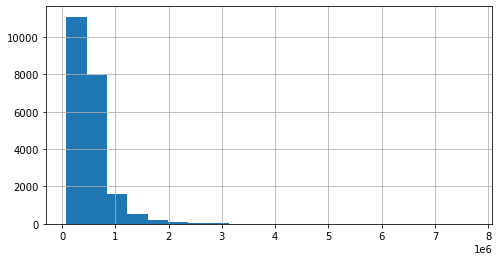

In [23]:
check_normality(kc, 'price', bins=20)

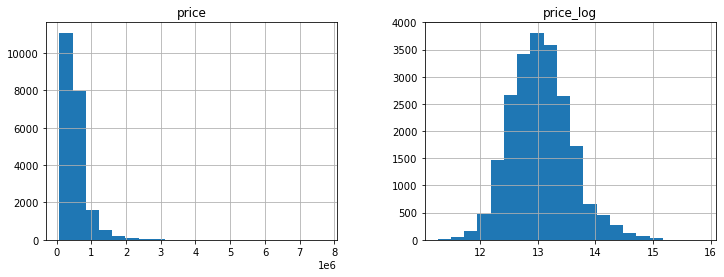

price_log skew: 0.43107952959103885
price_log kurtosis: 0.6910469577374965


In [24]:
# Creating price log column given skew
create_log(kc, 'price', col_pos=3, bins=20)

**Notes of Price Log**
- Price is highly skewed with 198 values more than 4 standard deviations from the mean
- Going ahead and creating price_log column and as shown above, it's relatively normal with little skew.
- Price log looks great, 0.4 skew and 0.7 kurtosis, should hold up much better in linear models.
- Price_log will be available for use in Model section

-0.2361553521948681
price_box 4 Std Dev: 4.134068369733234 | Home Counts above this size: 1 | Skew: -0.011919937023303982 | Kurtosis: 0.3062722180959363


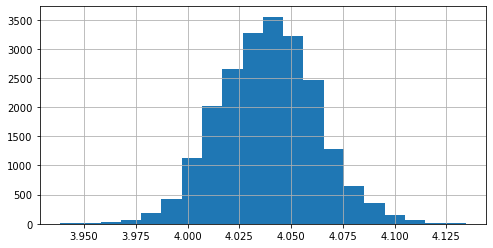

In [25]:
price_box = []
price_box, price_lambda = stats.boxcox(kc.price)
kc.insert(loc=4, column='price_box', value=pd.Series(price_box))
print(price_lambda)
check_normality(kc, 'price_box', bins=20)

In [26]:
# Check if nan issue on one record 21596 persists
# kc[kc.price_box.isnull()==True]
kc[21590:21600]

id       date      price  price_log  price_box  bedrooms  \
21591  2997800021 2015-02-19 475,000.00      13.07       4.03         3   
21592   263000018 2014-05-21 360,000.00      12.79       4.03         3   
21593  6600060120 2015-02-23 400,000.00      12.90       4.03         4   
21594  1523300141 2014-06-23 402,101.00      12.90       4.03         2   
21595   291310100 2015-01-16 400,000.00      12.90       4.02         3   
21596  1523300157 2014-10-15 325,000.00      12.69        nan         2   

       bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  \
21591       2.50         1310      1294    2.00        0.00  0.00          3   
21592       2.50         1530      1131    3.00        0.00  0.00          3   
21593       2.50         2310      5813    2.00        0.00  0.00          3   
21594       0.75         1020      1350    2.00        0.00  0.00          3   
21595       2.50         1600      2388    2.00        0.00  0.00          3   
21596       0.75         1020      1076    2.00        0.00  0.00          3   

       grade  sqft_above  sqft_basement  yr_built  yr_renovated zipcode   lat  \
21591      8        1180            130      2008             0   98116 47.58   
21592      8        1530              0      2009             0   98103 47.70   
21593      8        2310              0      2014             0   98146 47.51   
21594      7        1020              0      2009             0   98144 47.59   
21595      8        1600              0      2004             0   98027 47.53   
21596      7        1020              0      2008             0   98144 47.59   

         long  sqft_living15  sqft_lot15  
21591 -122.41           1330        1265  
21592 -122.35           1530        1509  
21593 -122.36           1830        7200  
21594 -122.30           1020        2007  
21595 -122.07           1410        1287  
21596 -122.30           1020        1357

In [70]:
# Dropping one bad rows that is throwing nans in Model 2. Can't figure out why.
kc.drop([21596], inplace=True)

In [27]:
len(kc)

21596

#### Lot Size Log

sqft_lot 4 Std Dev: 180754.02778204082 | Home Counts above this size: 291 | Skew: 13.072314761216806 | Kurtosis: 285.48321449984576


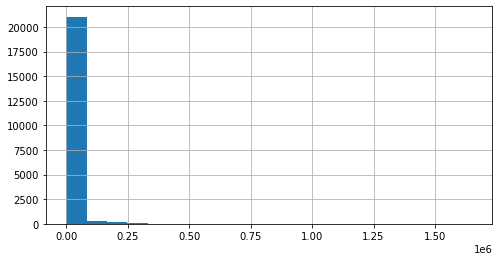

In [28]:
check_normality(kc, 'sqft_lot', bins=20)

**Notes on Lot Size**
- 291 outliers above 4 standard deviations "mega lots"
- Usually lot size should be a significant variable in price, going transform or adjust for these mega size lots

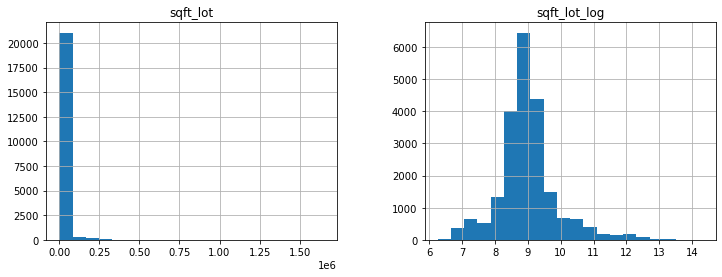

sqft_lot_log skew: 0.962441865571436
sqft_lot_log kurtosis: 3.3297326183287126


In [29]:
# Creating lot_size log column given skew
create_log(kc, 'sqft_lot', col_pos=9, bins=20)

**Notes on Lot Size Log**
- Outliers make lot_size highly positively skewed
- Log function brings to normal, almost perfect with Skew near 1 and Kurtosis near 3.

-0.19297462232104715
sqft_lot_box 4 Std Dev: 4.8656846419159745 | Home Counts above this size: 0 | Skew: -0.10698100645759137 | Kurtosis: 1.9132610561751


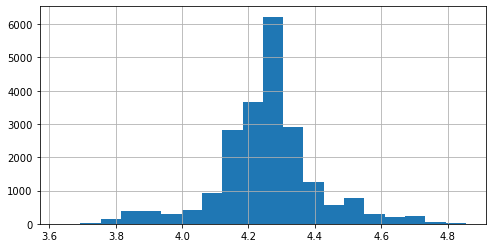

In [30]:
sqft_lot_box = []
sqft_lot_box, sqft_box_lambda = stats.boxcox(kc.sqft_lot)
kc.insert(loc=10, column='sqft_lot_box', value=pd.Series(sqft_lot_box))
print(sqft_box_lambda)
check_normality(kc, 'sqft_lot_box', bins=20)

#### Sqft Living Log

sqft_living 4 Std Dev: 5752.831318641844 | Home Counts above this size: 94 | Skew: 1.4731432590101492 | Kurtosis: 5.251772275175187


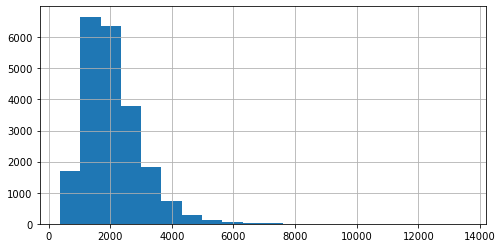

In [31]:
check_normality(kc, 'sqft_living', bins=20)

**Notes on Square Foot Living**
- 94 outliers above 4 standard deviations "mega homes"
- Let's create a log transform to see how normal we can get since sqft_living will be one of our top predictors
- Validated there are no 0 values in field before log transform

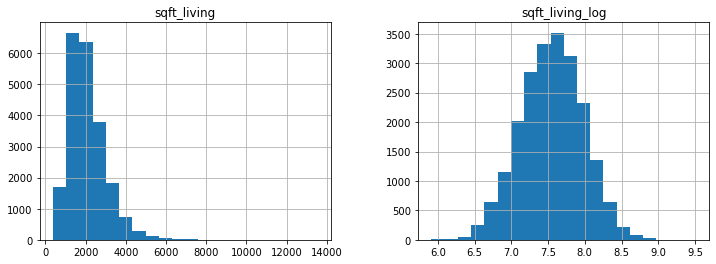

sqft_living_log skew: -0.02741167569494022
sqft_living_log kurtosis: -0.07913378171831864


In [32]:
# Creating lot_size log column given skew
create_log(kc, 'sqft_living', col_pos=8, bins=20)

0.02221621916765391
sqft_living_box 4 Std Dev: 10.229929408172227 | Home Counts above this size: 2 | Skew: -0.0003251050729460044 | Kurtosis: -0.07383931972154079


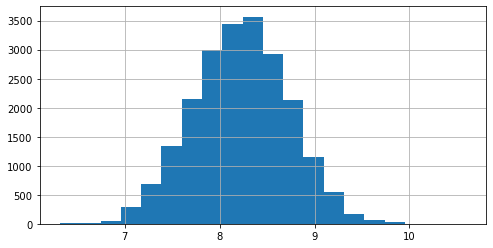

In [33]:
sqft_living_box = []
sqft_living_box, sqft_living_lambda = stats.boxcox(kc.sqft_living)
kc.insert(loc=9, column='sqft_living_box', value=pd.Series(sqft_living_box))
print(sqft_living_lambda)
check_normality(kc, 'sqft_living_box', bins=20)

#### Sqft  Above Log

sqft_above 4 Std Dev: 5099.684509596148 | Home Counts above this size: 74 | Skew: 1.4473915739212342 | Kurtosis: 3.405434947265481


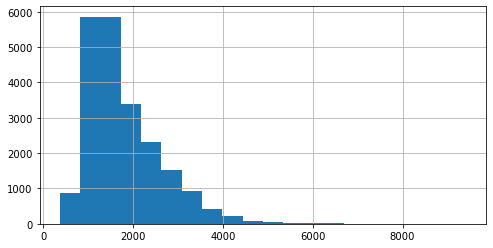

In [34]:
check_normality(kc, 'sqft_above', bins=20)

**Notes on Square Foot Living**
- 94 outliers above 4 standard deviations "mega homes"
- Let's create a log transform to see how normal we can get since sqft_living will be one of our top predictors

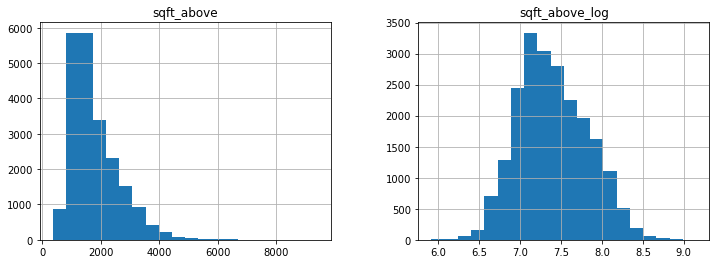

sqft_above_log skew: 0.25962050320447505
sqft_above_log kurtosis: -0.3338961015253301


In [35]:
create_log(kc, 'sqft_above', col_pos=19, bins=20)

#### Sqft Living15

sqft_living15 4 Std Dev: 4727.577796024879 | Home Counts above this size: 55 | Skew: 1.1068279971780404 | Kurtosis: 1.591675171866683


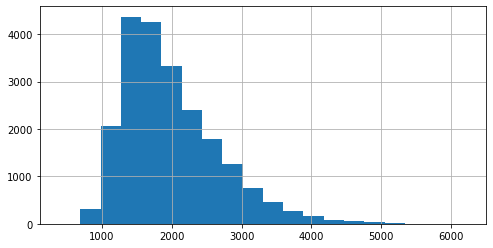

In [36]:
check_normality(kc, 'sqft_living15', bins=20)

**Notes on Sq Ft Living 15**
- Sqft_living15 slightly skewed positively, but not going to pursue log transform at this point.

#### Sqft Lot 15 Log

sqft_lot15 4 Std Dev: 121858.72991368518 | Home Counts above this size: 260 | Skew: 9.524159388368144 | Kurtosis: 151.38924172175214


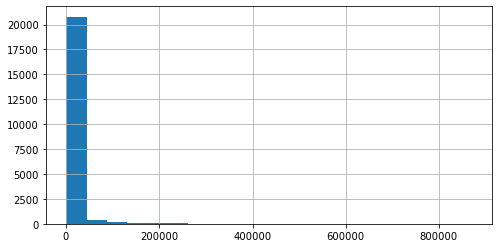

In [37]:
check_normality(kc, 'sqft_lot15', bins=20)

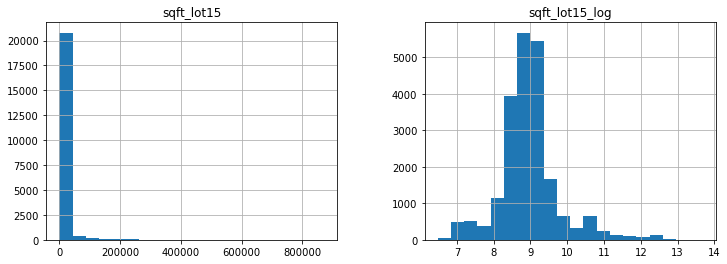

sqft_lot15_log skew: 0.9661306389463542
sqft_lot15_log kurtosis: 3.564141691595105


In [38]:
create_log(kc, 'sqft_lot15', col_pos=28, bins=20)

**Notes on Sqft Lot 15**
- Tons of outliers, highly skewed like lot size.
- Log transformation brings into normal shape with near 1 skew and 3.6 kurosis

#### Bedrooms Log

bedrooms 4 Std Dev: 6.988283034250895 | Home Counts above this size: 61 | Skew: 0.5513819025070226 | Kurtosis: 1.7974823436385439


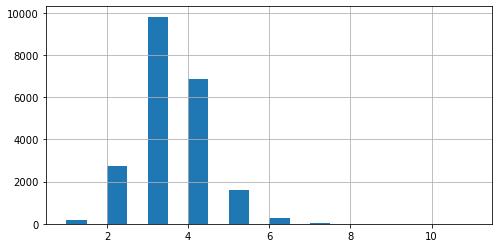

In [39]:
check_normality(kc, 'bedrooms', bins=20)

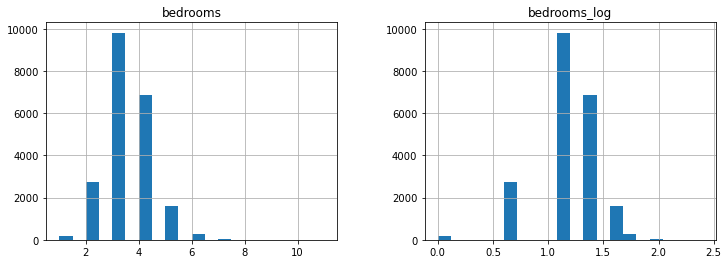

bedrooms_log skew: -0.7081340456551628
bedrooms_log kurtosis: 1.872540737687534


In [40]:
create_log(kc, 'bedrooms', col_pos=6, bins=20)

0.5853619981038436
bedrooms_box 4 Std Dev: 3.9310226424213295 | Home Counts above this size: 23 | Skew: 0.04696202835031031 | Kurtosis: 0.9475444757643201


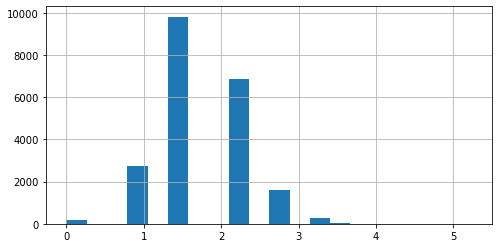

In [41]:
# transform training data & save lambda value 
bedrooms_box = []
bedrooms_box, bedrooms_lambda = stats.boxcox(kc.bedrooms)
kc.insert(loc=7, column='bedrooms_box', value=pd.Series(bedrooms_box))
print(bedrooms_lambda)
check_normality(kc, 'bedrooms_box', bins=20)

#### Bathrooms Log

bathrooms 4 Std Dev: 5.19183549788859 | Home Counts above this size: 43 | Skew: 0.5196443164494425 | Kurtosis: 1.2791586870954577


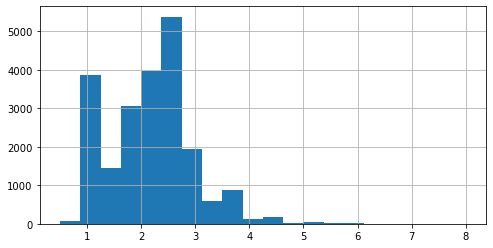

In [42]:
check_normality(kc, 'bathrooms', bins=20)

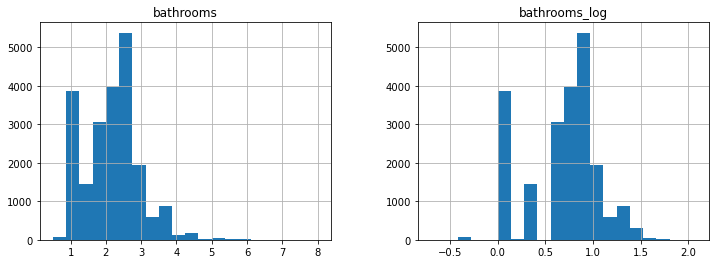

bathrooms_log skew: -0.4933014063951873
bathrooms_log kurtosis: -0.46387674535462864


In [43]:
create_log(kc, 'bathrooms', col_pos=9, bins=20)

0.5346126015678513
bathrooms_box 4 Std Dev: 3.0709382512250003 | Home Counts above this size: 10 | Skew: -0.02415740747364864 | Kurtosis: -0.1047594861960861


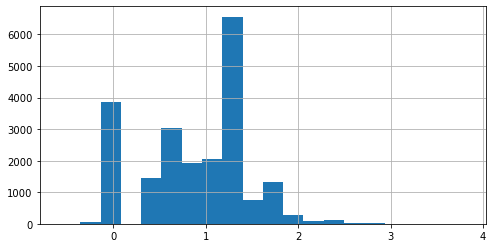

In [44]:
# transform training data & save lambda value 
bathrooms_box = []
bathrooms_box, bathrooms_lambda = stats.boxcox(kc.bathrooms)
kc.insert(loc=10, column='bathrooms_box', value=pd.Series(bathrooms_box))
print(bathrooms_lambda)
check_normality(kc, 'bathrooms_box', bins=20)

#### Renovation Indicator

In [45]:
# Create indicator column for homes showing renovation years (1 = Renovation)
kc.insert(loc=27, column='renovation_ind', value=np.where((kc.yr_renovated.isnull()) | (kc.yr_renovated==0), 0, 1))
kc.head() 

id       date      price  price_log  price_box  bedrooms  \
0  7129300520 2014-10-13 221,900.00      12.31       4.00         3   
1  6414100192 2014-12-09 538,000.00      13.20       4.05         3   
2  5631500400 2015-02-25 180,000.00      12.10       3.99         2   
3  2487200875 2014-12-09 604,000.00      13.31       4.05         4   
4  1954400510 2015-02-18 510,000.00      13.14       4.04         3   

   bedrooms_log  bedrooms_box  bathrooms  bathrooms_log  bathrooms_box  \
0          1.10          1.54       1.00           0.00           0.00   
1          1.10          1.54       2.25           0.81           1.02   
2          0.69          0.85       1.00           0.00           0.00   
3          1.39          2.14       3.00           1.10           1.49   
4          1.10          1.54       2.00           0.69           0.84   

   sqft_living  sqft_living_log  sqft_living_box  sqft_lot  sqft_lot_log  \
0         1180             7.07             7.66      5650          8.64   
1         2570             7.85             8.58      7242          8.89   
2          770             6.65             7.16     10000          9.21   
3         1960             7.58             8.26      5000          8.52   
4         1680             7.43             8.07      8080          9.00   

   sqft_lot_box  floors  waterfront  view  condition  grade  sqft_above  \
0          4.20    1.00        0.00  0.00          3      7        1180   
1          4.25    2.00        0.00  0.00          3      7        2170   
2          4.31    1.00        0.00  0.00          3      6         770   
3          4.18    1.00        0.00  0.00          5      7        1050   
4          4.27    1.00        0.00  0.00          3      8        1680   

   sqft_above_log  sqft_basement  yr_built  yr_renovated  renovation_ind  \
0            7.07              0      1955             0               0   
1            7.68            400      1951          1991               1   
2            6.65              0      1933             0               0   
3            6.96            910      1965             0               0   
4            7.43              0      1987             0               0   

  zipcode   lat    long  sqft_living15  sqft_lot15  sqft_lot15_log  
0   98178 47.51 -122.26           1340        5650            8.64  
1   98125 47.72 -122.32           1690        7639            8.94  
2   98028 47.74 -122.23           2720        8062            8.99  
3   98136 47.52 -122.39           1360        5000            8.52  
4   98074 47.62 -122.05           1800        7503            8.92

#### Basement Indicator

In [97]:
# Create indicator column for homes with basement based on non-zero sqft
kc.insert(loc=25, column='basement_ind', value=np.where(kc.sqft_basement==0, 0, 1))
kc.head() 

id       date            price   price_log  price_box  \
0 7,129,300,520.00000000 2014-10-13 221,900.00000000 12.30998211 4.00314587   
1 6,414,100,192.00000000 2014-12-09 538,000.00000000 13.19561384 4.04680802   
2 5,631,500,400.00000000 2015-02-25 180,000.00000000 12.10071213 3.99142502   
3 2,487,200,875.00000000 2014-12-09 604,000.00000000 13.31132948 4.05186762   
4 1,954,400,510.00000000 2015-02-18 510,000.00000000 13.14216600 4.04442395   

    bedrooms  bedrooms_log  bedrooms_box  sqft_per_bedroom  \
0 3.00000000    1.09861229    1.54151148      393.33333333   
1 3.00000000    1.09861229    1.54151148      856.66666667   
2 2.00000000    0.69314718    0.85488198      385.00000000   
3 4.00000000    1.38629436    2.13756008      490.00000000   
4 3.00000000    1.09861229    1.54151148      560.00000000   

   sqft_per_bedroom_log  bedroom_der  bathrooms  bathrooms_log  bathrooms_box  \
0            5.97465743   3.00000000 1.00000000     0.00000000     0.00000000   
1            6.75304889   3.00000000 2.25000000     0.81093022     1.01512581   
2            5.95324333   2.00000000 1.00000000     0.00000000     0.00000000   
3            6.19440539   4.00000000 3.00000000     1.09861229     1.49488011   
4            6.32793678   3.00000000 2.00000000     0.69314718     0.83902461   

     sqft_living  sqft_living_log  sqft_living_box        sqft_lot  \
0 1,180.00000000       7.07326972       7.65931218  5,650.00000000   
1 2,570.00000000       7.85166118       8.57807664  7,242.00000000   
2   770.00000000       6.64639051       7.16215595 10,000.00000000   
3 1,960.00000000       7.58069975       8.25644647  5,000.00000000   
4 1,680.00000000       7.42654907       8.07433240  8,080.00000000   

   sqft_lot_log  sqft_lot_box     floors  waterfront       view  condition  \
0    8.63941082    4.20377896 1.00000000  0.00000000 0.00000000 3.00000000   
1    8.88765269    4.24953666 2.00000000  0.00000000 0.00000000 3.00000000   
2    9.21034037    4.30583245 1.00000000  0.00000000 0.00000000 3.00000000   
3    8.51719319    4.18043282 1.00000000  0.00000000 0.00000000 5.00000000   
4    8.99714715    4.26903318 1.00000000  0.00000000 0.00000000 3.00000000   

  condition_grp  basement_ind      grade     sqft_above  sqft_above_log  \
0       average             0 7.00000000 1,180.00000000      7.07326972   
1       average             1 7.00000000 2,170.00000000      7.68248245   
2       average             0 6.00000000   770.00000000      6.64639051   
3     excellent             1 7.00000000 1,050.00000000      6.95654544   
4       average             0 8.00000000 1,680.00000000      7.42654907   

   sqft_basement       yr_built   yr_renovated  renovation_ind zipcode  \
0     0.00000000 1,955.00000000     0.00000000      0.00000000   98178   
1   400.00000000 1,951.00000000 1,991.00000000      1.00000000   98125   
2     0.00000000 1,933.00000000     0.00000000      0.00000000   98028   
3   910.00000000 1,965.00000000     0.00000000      0.00000000   98136   
4     0.00000000 1,987.00000000     0.00000000      0.00000000   98074   

          lat          long  sqft_living15                   home_lat_long  \
0 47.51120000 -122.25700000 1,340.00000000             (47.5112, -122.257)   
1 47.72100000 -122.31900000 1,690.00000000  (47.721000000000004, -122.319)   
2 47.73790000 -122.23300000 2,720.00000000  (47.7379, -122.23299999999999)   
3 47.52080000 -122.39300000 1,360.00000000  (47.5208, -122.39299999999999)   
4 47.61680000 -122.04500000 1,800.00000000             (47.6168, -122.045)   

   miles_fr_seattle_log     sqft_lot15  sqft_lot15_log  miles_fr_seattle  \
0            2.03046029 5,650.00000000      8.63941082        7.61759185   
1            2.05959866 7,639.00000000      8.94102198        7.84282157   
2            2.31800767 8,062.00000000      8.99491694       10.15542122   
3            1.88730642 5,000.00000000      8.51719319        6.60156288   
4            2.60485433 7,503.00000000      8.923058

#### Sqft Per Bedroom

In [46]:
kc.insert(loc=8, column='sqft_per_bedroom', value=kc['sqft_living']/kc['bedrooms'])
kc.head()

id       date      price  price_log  price_box  bedrooms  \
0  7129300520 2014-10-13 221,900.00      12.31       4.00         3   
1  6414100192 2014-12-09 538,000.00      13.20       4.05         3   
2  5631500400 2015-02-25 180,000.00      12.10       3.99         2   
3  2487200875 2014-12-09 604,000.00      13.31       4.05         4   
4  1954400510 2015-02-18 510,000.00      13.14       4.04         3   

   bedrooms_log  bedrooms_box  sqft_per_bedroom  bathrooms  bathrooms_log  \
0          1.10          1.54            393.33       1.00           0.00   
1          1.10          1.54            856.67       2.25           0.81   
2          0.69          0.85            385.00       1.00           0.00   
3          1.39          2.14            490.00       3.00           1.10   
4          1.10          1.54            560.00       2.00           0.69   

   bathrooms_box  sqft_living  sqft_living_log  sqft_living_box  sqft_lot  \
0           0.00         1180             7.07             7.66      5650   
1           1.02         2570             7.85             8.58      7242   
2           0.00          770             6.65             7.16     10000   
3           1.49         1960             7.58             8.26      5000   
4           0.84         1680             7.43             8.07      8080   

   sqft_lot_log  sqft_lot_box  floors  waterfront  view  condition  grade  \
0          8.64          4.20    1.00        0.00  0.00          3      7   
1          8.89          4.25    2.00        0.00  0.00          3      7   
2          9.21          4.31    1.00        0.00  0.00          3      6   
3          8.52          4.18    1.00        0.00  0.00          5      7   
4          9.00          4.27    1.00        0.00  0.00          3      8   

   sqft_above  sqft_above_log  sqft_basement  yr_built  yr_renovated  \
0        1180            7.07              0      1955             0   
1        2170            7.68            400      1951          1991   
2         770            6.65              0      1933             0   
3        1050            6.96            910      1965             0   
4        1680            7.43              0      1987             0   

   renovation_ind zipcode   lat    long  sqft_living15  sqft_lot15  \
0               0   98178 47.51 -122.26           1340        5650   
1               1   98125 47.72 -122.32           1690        7639   
2               0   98028 47.74 -122.23           2720        8062   
3               0   98136 47.52 -122.39           1360        5000   
4               0   98074 47.62 -122.05           1800        7503   

   sqft_lot15_log  
0            8.64  
1            8.94  
2            8.99  
3            8.52  
4            8.92

sqft_per_bedroom 4 Std Dev: 1481.651473156983 | Home Counts above this size: 92 | Skew: 1.5715424423371083 | Kurtosis: 5.793649351527834


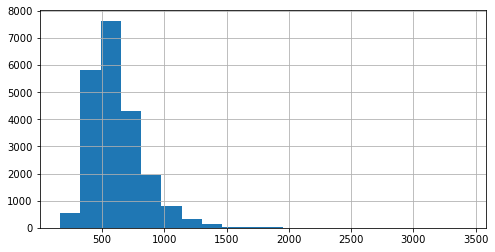

In [47]:
check_normality(kc, 'sqft_per_bedroom', bins=20)

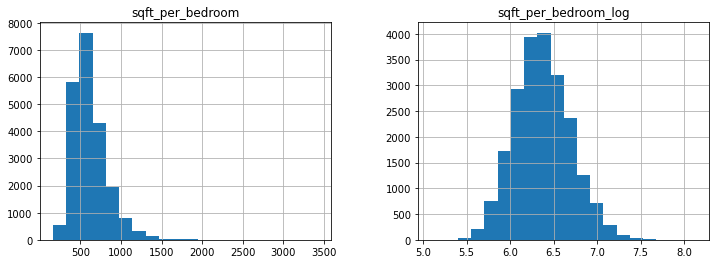

sqft_per_bedroom_log skew: 0.28789619313930154
sqft_per_bedroom_log kurtosis: 0.1447890918941246


In [48]:
create_log(kc, 'sqft_per_bedroom', col_pos=9, bins=20)

#### Bedrooms Derived

In [49]:
kc.insert(loc=10, column='bedroom_der', value=kc.bedrooms.map(lambda x: x if x<=6 else 6))

#### Condition Group

In [50]:
condition_map = {1: 'poor', 2: 'poor', 3: 'average', 4: 'average', 5: 'excellent'}
kc.insert(loc=24, column='condition_grp', value=kc.condition.map(condition_map))
kc.head()

id       date      price  price_log  price_box  bedrooms  \
0  7129300520 2014-10-13 221,900.00      12.31       4.00         3   
1  6414100192 2014-12-09 538,000.00      13.20       4.05         3   
2  5631500400 2015-02-25 180,000.00      12.10       3.99         2   
3  2487200875 2014-12-09 604,000.00      13.31       4.05         4   
4  1954400510 2015-02-18 510,000.00      13.14       4.04         3   

   bedrooms_log  bedrooms_box  sqft_per_bedroom  sqft_per_bedroom_log  \
0          1.10          1.54            393.33                  5.97   
1          1.10          1.54            856.67                  6.75   
2          0.69          0.85            385.00                  5.95   
3          1.39          2.14            490.00                  6.19   
4          1.10          1.54            560.00                  6.33   

   bedroom_der  bathrooms  bathrooms_log  bathrooms_box  sqft_living  \
0            3       1.00           0.00           0.00         1180   
1            3       2.25           0.81           1.02         2570   
2            2       1.00           0.00           0.00          770   
3            4       3.00           1.10           1.49         1960   
4            3       2.00           0.69           0.84         1680   

   sqft_living_log  sqft_living_box  sqft_lot  sqft_lot_log  sqft_lot_box  \
0             7.07             7.66      5650          8.64          4.20   
1             7.85             8.58      7242          8.89          4.25   
2             6.65             7.16     10000          9.21          4.31   
3             7.58             8.26      5000          8.52          4.18   
4             7.43             8.07      8080          9.00          4.27   

   floors  waterfront  view  condition condition_grp  grade  sqft_above  \
0    1.00        0.00  0.00          3       average      7        1180   
1    2.00        0.00  0.00          3       average      7        2170   
2    1.00        0.00  0.00          3       average      6         770   
3    1.00        0.00  0.00          5     excellent      7        1050   
4    1.00        0.00  0.00          3       average      8        1680   

   sqft_above_log  sqft_basement  yr_built  yr_renovated  renovation_ind  \
0            7.07              0      1955             0               0   
1            7.68            400      1951          1991               1   
2            6.65              0      1933             0               0   
3            6.96            910      1965             0               0   
4            7.43              0      1987             0               0   

  zipcode   lat    long  sqft_living15  sqft_lot15  sqft_lot15_log  
0   98178 47.51 -122.26           1340        5650            8.64  
1   98125 47.72 -122.32           1690        7639            8.94  
2   98028 47.74 -122.23           2720        8062            8.99  
3   98136 47.52 -122.39           1360        5000            8.52  
4   98074 47.62 -122.05           1800        7503            8.92

#### Miles From Seattle

In [51]:
# create tuple for each home of latitude and longitudes to feed mileage calculation
seattle_coord = tuple([47.608013, -122.335167])
kc.insert(loc=36, column='home_lat_long',value = tuple(zip(kc.lat, kc.long)))

In [52]:
# create feature of miles from city center of Seattle
seattle_calc = []
for home in kc['home_lat_long']:
    seattle_calc.append(haversine(home, seattle_coord, unit='mi'))
    
kc['miles_fr_seattle'] = pd.Series(seattle_calc)
kc.miles_fr_seattle.fillna(kc.miles_fr_seattle.median(), inplace=True)
kc.head()

# kc[kc['miles_fr_seattle'].isna()==True].head()

id       date      price  price_log  price_box  bedrooms  \
0  7129300520 2014-10-13 221,900.00      12.31       4.00         3   
1  6414100192 2014-12-09 538,000.00      13.20       4.05         3   
2  5631500400 2015-02-25 180,000.00      12.10       3.99         2   
3  2487200875 2014-12-09 604,000.00      13.31       4.05         4   
4  1954400510 2015-02-18 510,000.00      13.14       4.04         3   

   bedrooms_log  bedrooms_box  sqft_per_bedroom  sqft_per_bedroom_log  \
0          1.10          1.54            393.33                  5.97   
1          1.10          1.54            856.67                  6.75   
2          0.69          0.85            385.00                  5.95   
3          1.39          2.14            490.00                  6.19   
4          1.10          1.54            560.00                  6.33   

   bedroom_der  bathrooms  bathrooms_log  bathrooms_box  sqft_living  \
0            3       1.00           0.00           0.00         1180   
1            3       2.25           0.81           1.02         2570   
2            2       1.00           0.00           0.00          770   
3            4       3.00           1.10           1.49         1960   
4            3       2.00           0.69           0.84         1680   

   sqft_living_log  sqft_living_box  sqft_lot  sqft_lot_log  sqft_lot_box  \
0             7.07             7.66      5650          8.64          4.20   
1             7.85             8.58      7242          8.89          4.25   
2             6.65             7.16     10000          9.21          4.31   
3             7.58             8.26      5000          8.52          4.18   
4             7.43             8.07      8080          9.00          4.27   

   floors  waterfront  view  condition condition_grp  grade  sqft_above  \
0    1.00        0.00  0.00          3       average      7        1180   
1    2.00        0.00  0.00          3       average      7        2170   
2    1.00        0.00  0.00          3       average      6         770   
3    1.00        0.00  0.00          5     excellent      7        1050   
4    1.00        0.00  0.00          3       average      8        1680   

   sqft_above_log  sqft_basement  yr_built  yr_renovated  renovation_ind  \
0            7.07              0      1955             0               0   
1            7.68            400      1951          1991               1   
2            6.65              0      1933             0               0   
3            6.96            910      1965             0               0   
4            7.43              0      1987             0               0   

  zipcode   lat    long  sqft_living15                   home_lat_long  \
0   98178 47.51 -122.26           1340             (47.5112, -122.257)   
1   98125 47.72 -122.32           1690  (47.721000000000004, -122.319)   
2   98028 47.74 -122.23           2720  (47.7379, -122.23299999999999)   
3   98136 47.52 -122.39           1360  (47.5208, -122.39299999999999)   
4   98074 47.62 -122.05           1800             (47.6168, -122.045)   

   sqft_lot15  sqft_lot15_log  miles_fr_seattle  
0        5650            8.64              7.62  
1        7639            8.94              7.84  
2        8062            8.99             10.16  
3        5000            8.52              6.60  
4        7503            8.92             13.53

miles_fr_seattle 4 Std Dev: 38.207922157708985 | Home Counts above this size: 18 | Skew: 0.7669121405508273 | Kurtosis: 0.36602428452820357


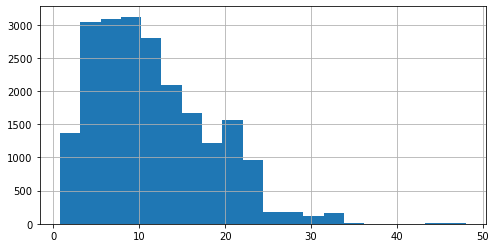

In [53]:
check_normality(kc, 'miles_fr_seattle')

In [54]:
kc[kc['miles_fr_seattle'].isna()==True].head()

Empty DataFrame
Columns: [id, date, price, price_log, price_box, bedrooms, bedrooms_log, bedrooms_box, sqft_per_bedroom, sqft_per_bedroom_log, bedroom_der, bathrooms, bathrooms_log, bathrooms_box, sqft_living, sqft_living_log, sqft_living_box, sqft_lot, sqft_lot_log, sqft_lot_box, floors, waterfront, view, condition, condition_grp, grade, sqft_above, sqft_above_log, sqft_basement, yr_built, yr_renovated, renovation_ind, zipcode, lat, long, sqft_living15, home_lat_long, sqft_lot15, sqft_lot15_log, miles_fr_seattle]
Index: []

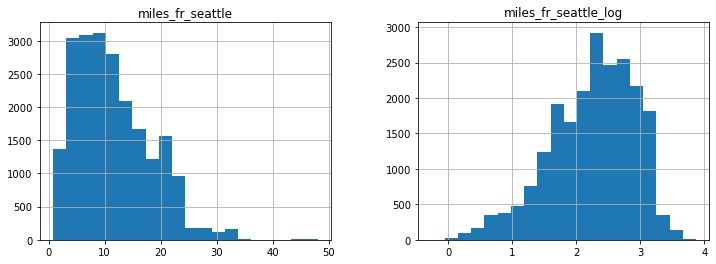

miles_fr_seattle_log skew: -0.5909581116428807
miles_fr_seattle_log kurtosis: -0.022811683040730113


In [55]:
# transform training data & save lambda value 
create_log(kc, 'miles_fr_seattle', col_pos=37, bins=20)

miles_fr_seattle_sqrt 4 Std Dev: 7.212433819932752 | Home Counts above this size: 0 | Skew: 0.12991689958589042 | Kurtosis: -0.5808706476636059


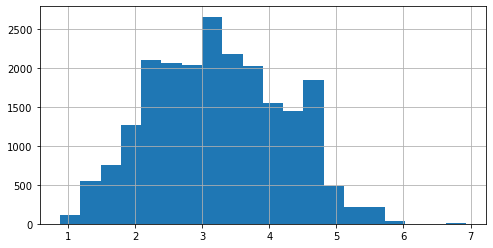

In [56]:
kc['miles_fr_seattle_sqrt']=np.sqrt(kc['miles_fr_seattle'])
check_normality(kc, 'miles_fr_seattle_sqrt')

#### Zip Price Sqft Decile

In [57]:
kc['price_sf'] = kc['price']/kc['sqft_living']
zip_psf = kc.groupby('zipcode')['price_sf'].median().reset_index()

<AxesSubplot:>

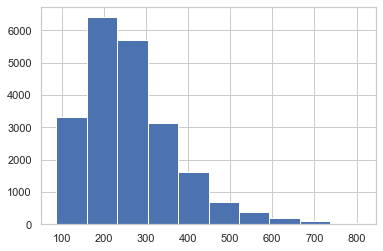

In [155]:
kc['price_sf'].hist()

<AxesSubplot:>

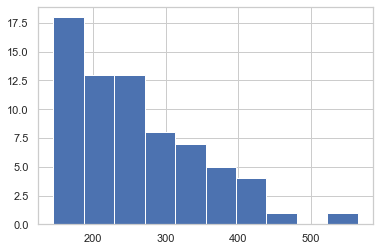

In [156]:
zip_psf['price_sf'].hist()

<AxesSubplot:>

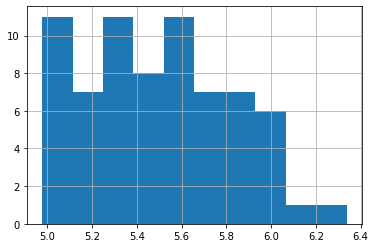

In [59]:
np.log(zip_psf['price_sf']).hist()

In [60]:
fitted_data, fitted_lambda = stats.boxcox(zip_psf['price_sf'])
print(f'fitted lambda is {fitted_lambda}')

fitted lambda is -0.41015480777301483


In [61]:
box = pd.DataFrame(fitted_data, columns = ['zip_price_sf_box'])
zip_psf_box = pd.concat([zip_psf, box], axis=1)
pd.options.display.float_format = '{:,.8f}'.format
zip_psf_box.head()

# scipy.special.inv_boxcox(y, lambda)

zipcode     price_sf  zip_price_sf_box
0   98001 147.14134463        2.12336857
1   98002 147.17741935        2.12340021
2   98003 154.81924571        2.12986667
3   98004 456.94444444        2.24036295
4   98005 316.34043088        2.20817059

zip_price_sf_box 4 Std Dev: 2.3181398805616467 | Home Counts above this size: 0 | Skew: 0.04165867960961311 | Kurtosis: -0.8938377485526492


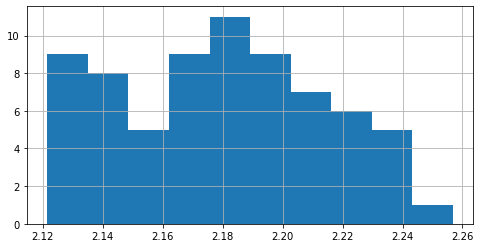

In [62]:
check_normality(zip_psf_box, 'zip_price_sf_box', bins=10)

In [63]:
# Get the bin edges with retbin
results, bins_edges = pd.qcut(zip_psf_box['zip_price_sf_box'], q=10, retbins=True)

def create_intervals(array):
    ''' Simple function to print the width of each bin from the bin edges in the passed list.'''
    interval_dict = {}
    zip_psf_deciles = []
    for index, edge in enumerate(array):
        if index == 0:
            continue
        interval_dict = {'decile': index, 'upper_range': edge}
        zip_psf_deciles.append(interval_dict)
    return zip_psf_deciles

zip_psf_deciles = create_intervals(bins_edges)
zip_psf_deciles

[{'decile': 1, 'upper_range': 2.131502681750592},
 {'decile': 2, 'upper_range': 2.1434853039526396},
 {'decile': 3, 'upper_range': 2.1608433532433304},
 {'decile': 4, 'upper_range': 2.168390229052141},
 {'decile': 5, 'upper_range': 2.1817738704687497},
 {'decile': 6, 'upper_range': 2.1885994360144547},
 {'decile': 7, 'upper_range': 2.199363148678238},
 {'decile': 8, 'upper_range': 2.2138002397137817},
 {'decile': 9, 'upper_range': 2.224337147729981},
 {'decile': 10, 'upper_range': 2.256872144006299}]

In [64]:
# function to return key for any value
def map_psf_decile(val):
    for d in zip_psf_deciles:
        if val <= d['upper_range']:
            return d['decile']
        elif (d['decile']==10) & (val > d['upper_range']):
            return d['decile']
    return "value out of range"

In [65]:
kc[kc['price_sf'].isna()==True]
# kc.iloc[15856:15857]

Empty DataFrame
Columns: [id, date, price, price_log, price_box, bedrooms, bedrooms_log, bedrooms_box, sqft_per_bedroom, sqft_per_bedroom_log, bedroom_der, bathrooms, bathrooms_log, bathrooms_box, sqft_living, sqft_living_log, sqft_living_box, sqft_lot, sqft_lot_log, sqft_lot_box, floors, waterfront, view, condition, condition_grp, grade, sqft_above, sqft_above_log, sqft_basement, yr_built, yr_renovated, renovation_ind, zipcode, lat, long, sqft_living15, home_lat_long, miles_fr_seattle_log, sqft_lot15, sqft_lot15_log, miles_fr_seattle, miles_fr_seattle_sqrt, price_sf]
Index: []

In [66]:
fit_price_sf = stats.boxcox(kc['price_sf'], fitted_lambda)
box_kc = pd.DataFrame(fit_price_sf, columns = ['price_sf_box'])

In [67]:
len(fit_price_sf), len(box_kc), len(kc)
# record index 15856, dropped in outliers section keeps reappearing when running this code:
# kc = pd.concat([kc, box_kc], axis=1); somehow the concatenation is bring back this index with all nans. 

(21596, 21596, 21596)

In [ ]:
kc.drop([15856], inplace=True)
# Dropping one bad rows that is throwing nans in Model 2. Can't figure out why.
# kc.drop([21596], inplace=True)

In [72]:
kc = pd.concat([kc, box_kc], axis=1)
print(len(kc))
kc.drop([15856], inplace=True)
print(len(kc))
kc.drop([21595], inplace=True)
print(len(kc))
kc['price_sf_box_decile'] = kc['price_sf_box'].apply(lambda x: map_psf_decile(x)).astype(int)

21596
21595
21594


In [73]:
kc.tail()

id       date              price   price_log  \
21590 7,936,000,429.00000000 2015-03-26 1,010,000.00000000 13.82546089   
21591 2,997,800,021.00000000 2015-02-19   475,000.00000000 13.07107008   
21592   263,000,018.00000000 2014-05-21   360,000.00000000 12.79385931   
21593 6,600,060,120.00000000 2015-02-23   400,000.00000000 12.89921983   
21594 1,523,300,141.00000000 2014-06-23   402,101.00000000 12.90445858   

       price_box   bedrooms  bedrooms_log  bedrooms_box  sqft_per_bedroom  \
21590 4.04120568 4.00000000    1.38629436    1.54151148      877.50000000   
21591 4.02812827 3.00000000    1.09861229    1.54151148      436.66666667   
21592 4.03319976 3.00000000    1.09861229    2.13756008      510.00000000   
21593 4.03344865 4.00000000    1.38629436    0.85488198      577.50000000   
21594 4.03319976 2.00000000    0.69314718    1.54151148      510.00000000   

       sqft_per_bedroom_log  bedroom_der  bathrooms  bathrooms_log  \
21590            6.77707696   4.00000000 3.50000000     1.25276297   
21591            6.07917013   3.00000000 2.50000000     0.91629073   
21592            6.23441073   3.00000000 2.50000000     0.91629073   
21593            6.35870844   4.00000000 2.50000000     0.91629073   
21594            6.23441073   2.00000000 0.75000000    -0.28768207   

       bathrooms_box    sqft_living  sqft_living_log  sqft_living_box  \
21590     1.18233024 3,510.00000000       8.16337132       7.78175094   
21591     1.18233024 1,310.00000000       7.17778242       7.96414405   
21592     1.18233024 1,530.00000000       7.33302301       8.45124244   
21593    -0.26665138 2,310.00000000       7.74500280       7.48908158   
21594     1.18233024 1,020.00000000       6.92755791       8.01682138   

            sqft_lot  sqft_lot_log  sqft_lot_box     floors  waterfront  \
21590 7,200.00000000    8.88183631    3.88193243 2.00000000  0.00000000   
21591 1,294.00000000    7.16549348    3.84771157 2.00000000  0.00000000   
21592 1,131.00000000    7.03085748    4.20913332 3.00000000  0.00000000   
21593 5,813.00000000    8.66785207    3.89251821 2.00000000  0.00000000   
21594 1,350.00000000    7.20785987    4.02691439 2.00000000  0.00000000   

            view  condition condition_grp      grade     sqft_above  \
21590 0.00000000 3.00000000       average 9.00000000 2,600.00000000   
21591 0.00000000 3.00000000       average 8.00000000 1,180.00000000   
21592 0.00000000 3.00000000       average 8.00000000 1,530.00000000   
21593 0.00000000 3.00000000       average 8.00000000 2,310.00000000   
21594 0.00000000 3.00000000       average 7.00000000 1,020.00000000   

       sqft_above_log  sqft_basement       yr_built  yr_renovated  \
21590      7.86326672   910.00000000 2,009.00000000    0.00000000   
21591      7.07326972   130.00000000 2,008.00000000    0.00000000   
21592      7.33302301     0.00000000 2,009.00000000    0.00000000   
21593      7.74500280     0.00000000 2,014.00000000    0.00000000   
21594      6.92755791     0.00000000 2,009.00000000    0.00000000   

       renovation_ind zipcode         lat          long  sqft_living15  \
21590      0.00000000   98136 47.55370000 -122.39800000 2,050.00000000   
21591      0.00000000   98116 47.57730000 -122.40900000 1,330.00000000   
21592      0.00000000   98103 47.69930000 -122.34600000 1,530.00000000   
21593      0.00000000   98146 47.51070000 -122.36200000 1,830.00000000   
21594      0.00000000   98144 47.59440000 -122.29900000 1,020.00000000   

                        home_lat_long  miles_fr_seattle_log     sqft_lot15  \
21590             (47.5537, -122.398)            1.39678304 6,200.00000000   
21591  (47.5773, -122.40899999999999)            1.84489741 1,265.00000000   
21592             (47.6993, -122.346)            1.92265595 1,509.00000000   
21593  (47.5107, -122.36200000000001)            0.65737438 7,200.00000000   
21594  (47.5944, -122.29899999999999)            2.59576844 2,007.00000000   

       sqft_lot15_log  miles_fr_seattle  miles_fr_s

In [71]:
kc.drop(columns=['price_sf_box'], axis=1, inplace=True)

In [ ]:
kc.head()

In [75]:
kc.groupby('price_sf_box_decile')['price_sf'].median()

price_sf_box_decile
1    143.54066986
2    167.10201651
3    188.29268293
4    208.10810811
5    229.11740159
6    250.00000000
7    272.30046948
8    306.17977528
9    350.82236842
10   417.35537190
Name: price_sf, dtype: float64

price_sf_box 4 Std Dev: 2.3455410904336498 | Home Counts above this size: 0 | Skew: -0.2584368391627884 | Kurtosis: -0.2931177702408565


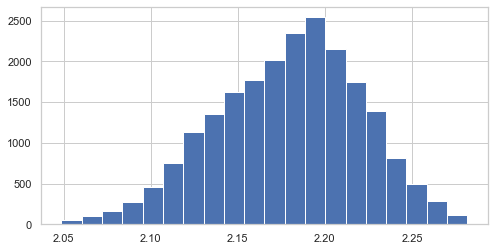

In [150]:
check_normality(kc, 'price_sf_box')

price_sf 4 Std Dev: 616.2264312072768 | Home Counts above this size: 0 | Skew: 0.9731375539795851 | Kurtosis: 0.83652013622229


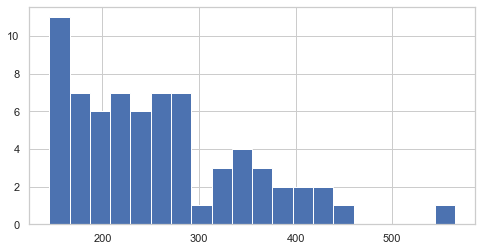

In [152]:
check_normality(zip_psf_box, 'price_sf')

zip_price_sf_box 4 Std Dev: 2.3181398805616467 | Home Counts above this size: 0 | Skew: 0.04165867960961311 | Kurtosis: -0.8938377485526492


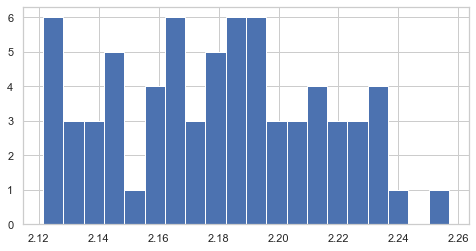

In [154]:
check_normality(zip_psf_box, 'zip_price_sf_box')

price_sf_box_decile 4 Std Dev: 17.75054943626565 | Home Counts above this size: 0 | Skew: -0.0709955874888015 | Kurtosis: -1.2971175252711498


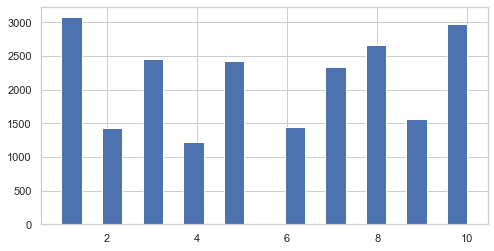

In [151]:
check_normality(kc, 'price_sf_box_decile')

#### Zip Price Sqft Decile 2

price_sf 4 Std Dev: 704.1491444069815 | Home Counts above this size: 76 | Skew: 1.2471126458056099 | Kurtosis: 2.0996635602275115


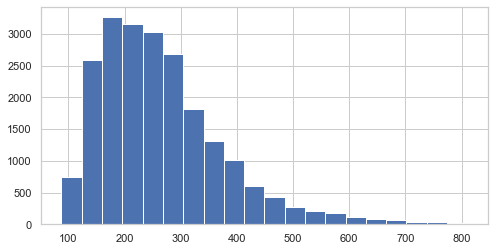

In [161]:
check_normality(kc, 'price_sf')

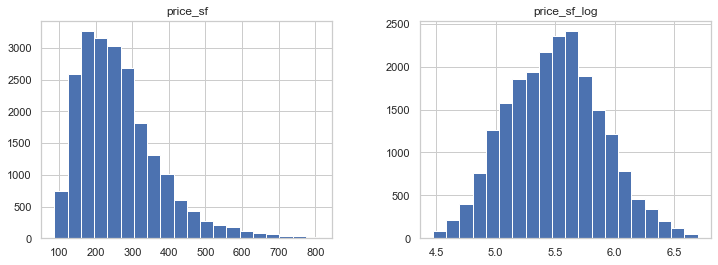

price_sf_log skew: 0.14061202629083705
price_sf_log kurtosis: -0.29531970851459644


In [162]:
create_log(kc, 'price_sf')

price_sf_log 4 Std Dev: 6.824248852344345 | Home Counts above this size: 0 | Skew: 0.27954413591390487 | Kurtosis: -0.6856582466004322


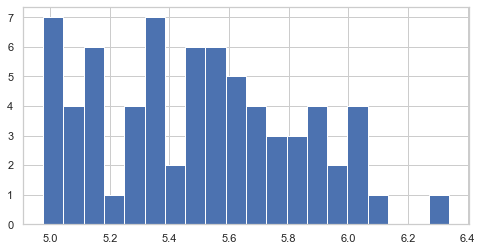

In [164]:
zip_medians = kc.groupby('zipcode')['price_sf_log'].median().reset_index()
check_normality(zip_medians, 'price_sf_log')

### Time Series Analysis

#### Sales By Month

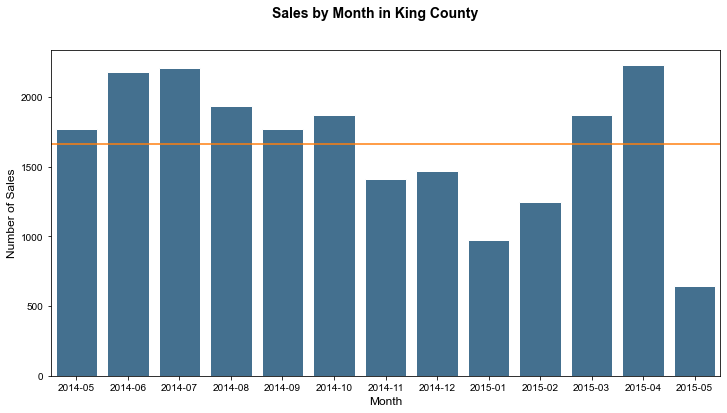

In [76]:
# Plot number of sales by month for King County home sales data
kc['sales_cnt']=1 # dummy variable to sum sales
kc['year_month'] = kc.date.dt.to_period('m') # transform date into month
df_grp = kc.groupby(['year_month'])['sales_cnt'].sum().reset_index()

# Create barplot with average line
f, ax = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('Sales by Month in King County', fontsize=14, fontweight ='bold')
sns.set_style("dark")
ax = sns.barplot(data=df_grp, x='year_month', y='sales_cnt', color='tab:blue', saturation=.5)
ax.axhline(df_grp.sales_cnt.mean(), color='tab:orange')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Sales', fontsize=12)
plt.show()

**Notes on Sales Trend**
- Total sales transations of 21,597 spread across 13 months with 1,661 average/month in sample
- May 2015 looks to be a partial month, may excluded it to have a complete 1 year of data (2014-05 through 2015-04)
- Sales time series exhibits expected seasonality in Spring/Summer with slower Winter months

#### Sales By Year Built

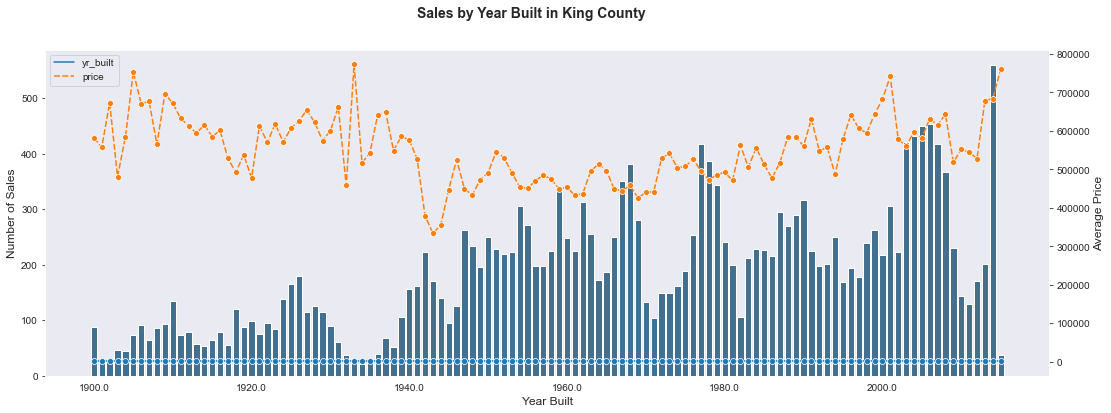

In [77]:
# Plot number of sales by month for King County home sales data
df_grp = kc.groupby(['yr_built'])['sales_cnt'].sum().reset_index()
df_grp2 = kc.groupby(['yr_built'])['price'].mean().reset_index()

# Create barplot with average line
f, ax = plt.subplots(figsize=(18, 6)) 
f.suptitle('Sales by Year Built in King County', fontsize=14, fontweight ='bold')
sns.set_style("dark")
ax = sns.barplot(data=df_grp, x='yr_built', y='sales_cnt', color='tab:blue', saturation=.5, ax=ax)
ax.set_xlabel('Year Built', fontsize=12)
ax.set_ylabel('Number of Sales', fontsize=12)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax2 = ax.twinx()
ax2 = sns.lineplot(data=df_grp2, marker='o', ax=ax2)
ax2.set_ylabel('Average Price', fontsize=12)
plt.show()

#### Avg Living Space and BR

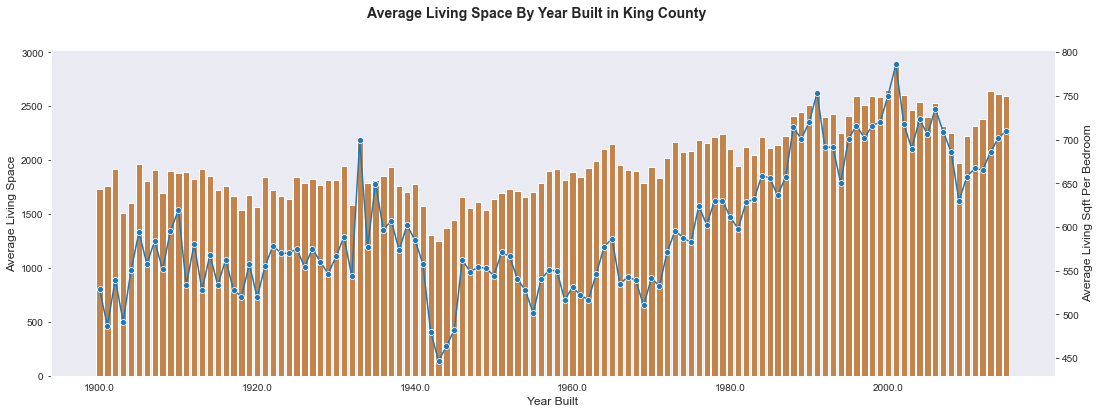

In [78]:
# Plot number of sales by month for King County home sales data
df_grp = kc.groupby(['yr_built'])['sqft_living'].mean().reset_index()
df_grp2 = kc.groupby(['yr_built'])['bedrooms'].mean().reset_index()
df_grp3 = df_grp.merge(df_grp2)
df_grp3['sqft_per_bedroom']=df_grp3['sqft_living']/df_grp3['bedrooms']

# Create barplot with average line
f, ax = plt.subplots(figsize=(18, 6)) 
f.suptitle('Average Living Space By Year Built in King County', fontsize=14, fontweight ='bold')
sns.set_style("dark")
ax = sns.barplot(data=df_grp, x='yr_built', y='sqft_living', color='tab:orange', saturation=.5, ax=ax)
ax.set_xlabel('Year Built', fontsize=12)
ax.set_ylabel('Average Living Space', fontsize=12)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax2 = ax.twinx()
ax2 = sns.lineplot(data=df_grp3['sqft_per_bedroom'], marker='o', ax=ax2)
ax2.set_ylabel('Average Living Sqft Per Bedroom', fontsize=12)
plt.show()

**Notes on Living Space Year Built**
- Average Living Space: 1,764 (<1970) vs. 
- Average Bedrooms: 3.20 vs.
- Living Sqft Per Bedroom: 552 vs.

In [79]:
df_grp3['yr_built_der'] = df_grp3.yr_built.map(lambda x: 'pre-1970' if x < 1970 else 'post-1970')
df_grp3.groupby('yr_built_der').mean()

yr_built    sqft_living   bedrooms  sqft_per_bedroom
yr_built_der                                                           
post-1970    1,992.50000000 2,325.60254857 3.48572352      666.77793801
pre-1970     1,934.50000000 1,764.51674968 3.19600958      552.48304298

In [80]:
print(f'{len(kc[kc.bedrooms>6])} homes, or {round(len(kc[kc.bedrooms>6])/len(kc),3)}% of total, have greater than 6 bedrooms ')

61 homes, or 0.003% of total, have greater than 6 bedrooms 


### Category Profiles

#### Plot Functions

In [81]:
# Define function to generate Top N values, counts and % total for a column
def topn_count(df, column, topn):
    c = df[column].value_counts(dropna=False)
    p = df[column].value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%'
    cp = (100*df.groupby(column).size().cumsum()/df.groupby(column).size().sum()).round(1).astype(str) + '%'
    print(f'Top 10 Counts By {column.title()}')
    return pd.concat([c, p ,cp], axis=1, keys=['Counts', '%', 'Cum %']).iloc[:topn]

In [ ]:
#  topn_count(kc, 'bedrooms', 10)

In [82]:
# Define function to generate 3 plots for X and Y columns in a dataframe: Histogram, Price Box Plot and Top N % Distribution
def distplots(df, xcol, ycol, topn):
    # Set a figure with 3 subplots and figure-level settings
    f, (ax,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(18, 6))
    sns.set_theme(style='ticks', palette='deep')
    sns.set_style('whitegrid')
    f.suptitle('Column Value Distributions', fontsize=14, fontweight ='bold')
    f.tight_layout(pad=3)
    
    # Subplot 1 - Histogram by desired xcol showing probability %
    ax = plt.subplot2grid((1, 7), (0, 0), colspan=2)
    ax = sns.histplot(data=df, x=xcol, color='skyblue', stat='probability', discrete = True, ax=ax)
    ax.set_title('Histogram')

    # Subplot 2 - Scatter plot xcol vs. ycol
    ax2 = plt.subplot2grid((1, 7), (0, 2), colspan=2)
    ax2 = sns.scatterplot(df[xcol], df[ycol])
    ax2.set_title(f'{ycol.title()} vs {xcol.title()} Scatterplot')
#     ax2.set_xlabel(column)
#     ax2.set_ylabel('Sale Price in $100,000')
    
    # Subplot 3 - Boxplot by desired xcol against ycol (e.g. price) to see distributions grouped by xcol
    ax3 = plt.subplot2grid((1, 7), (0, 4), colspan=2)
    ax3 = sns.boxplot(data=df, x=xcol, y=ycol, showfliers=False, ax=ax3) # Excludes outliers for presentability 
    ax3.set_title('Boxplot')

    # Calculate medians and number of observations per group for use in positioning labels on plot
    medians = df.groupby([xcol])[ycol].median().values
    nobs = df[xcol].value_counts(sort=False).sort_index().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add number of observations to the boxplot for indication of each box's relative likelihood
    pos = range(len(nobs))
    for tick, label in zip(pos, ax2.get_xticklabels()):
        ax3.text(pos[tick], medians[tick] + 0.2, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='bold')
    
    # Subplot 4 - Add dataframe top N value counts and % of group as a table in 3rd plot
    top = topn_count(df, xcol, topn)
    ax4 = plt.subplot2grid((1, 7), (0, 6))
    ax4.table(cellText=top.values,rowLabels=top.index, colLabels=top.columns, cellLoc = 'center', rowLoc = 'center', loc='center')
    ax4.axis("off")
    ax4.set_title('Top Values')
    plt.show()

In [ ]:
# data.hist(figsize=(18,15), bins='auto');

#### Bedrooms

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Bedrooms


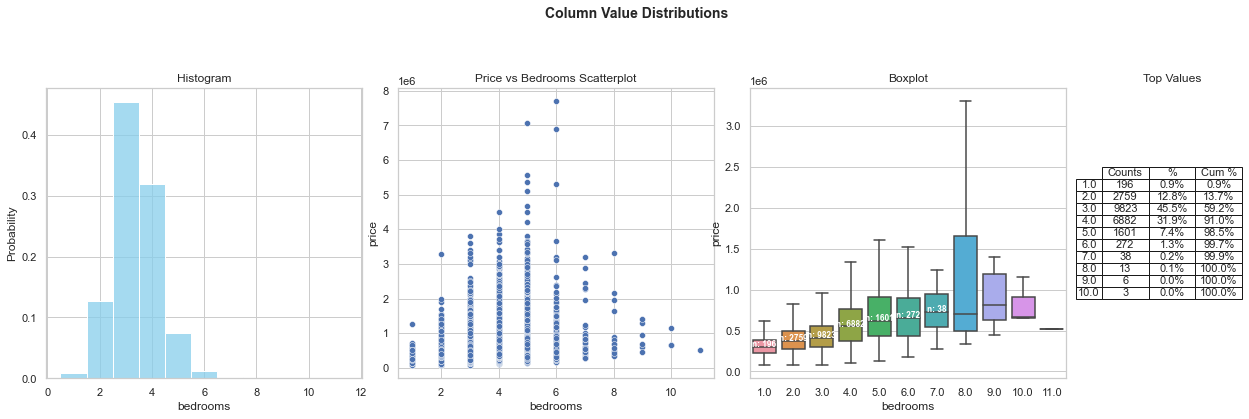

In [83]:
distplots(kc, 'bedrooms', 'price', 10)

**Notes on Bedrooms**
- One outlier at 33 BR excluded for graph presentability
- Mode is 3 BR and 78% are 3/4 BR. Only 1.5% higher than 5 BR and only 1% at 1 BR.
- Limiting to 1-6 BR looks relatively normal, might not need log transformation. This would mean dropping 0.3% of the data from modeling.
- Median price increases from 1-7 BRs, assume strong correlation. The IQR upper whisker increases more than lower whisker for higher bedrooms.

#### Bathrooms

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Bathrooms


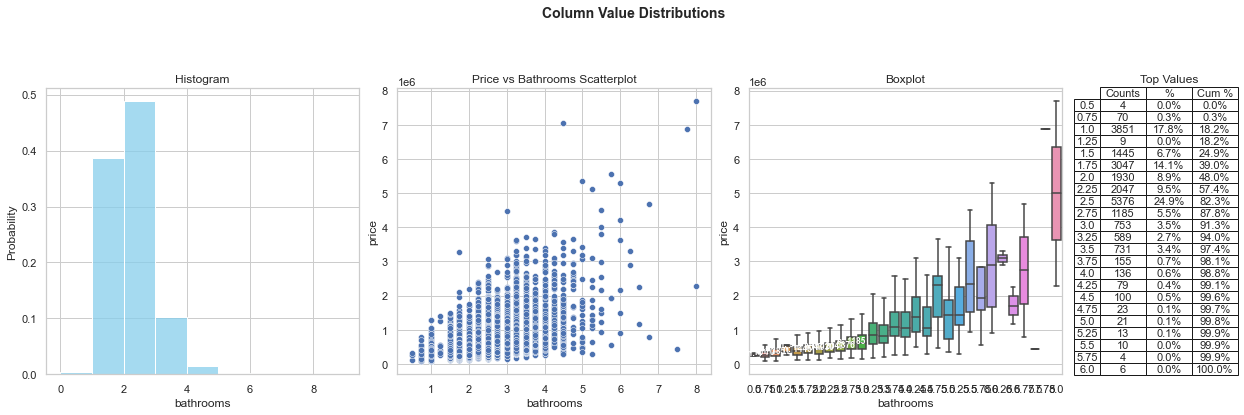

In [84]:
distplots(kc, 'bathrooms', 'price', 23)

**Notes on Bathrooms**
- Over 50% of homes have quarter or half bathrooms listed (.25, .5 or .75); Are half-baths worth 50% of a bath count in regression?
- Roughly 49% home have 2-3 baths, another 39% have 1-2 baths; 98% have 3 baths or under.
- Outliers: 75 homes (0.3%) have less than 1 bathroom. 12 homes have 6 or more. If bathrooms in model, might drop both outliers (1-6 baths).
- Distribution looks skewed right, might need log transformation.
- Median price increases with bathrooms, linear if not exponetially.

#### Floors

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Floors


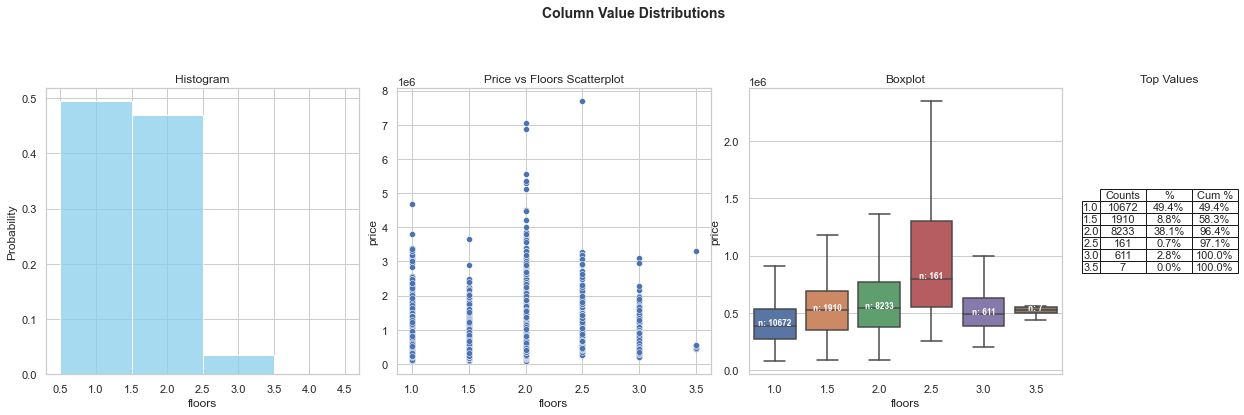

In [85]:
distplots(kc, 'floors', 'price', 10)

**Notes on Floors**
- Approximately 10% of homes have split-levels; Are half-floors worth 50% of a floor in regression?
- Roughly 49% home have single floor, another 38% have 2; Only 3% have 3 floors or higher (small samples and prices don't scale).
- Outliers: None
- Distribution not normal, would use category OHE variables.
- Median price and upper whisker band increases linearly with floors until 3+. Split level 1.5 similar to 2 floors in pricing.

#### Condition

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Condition


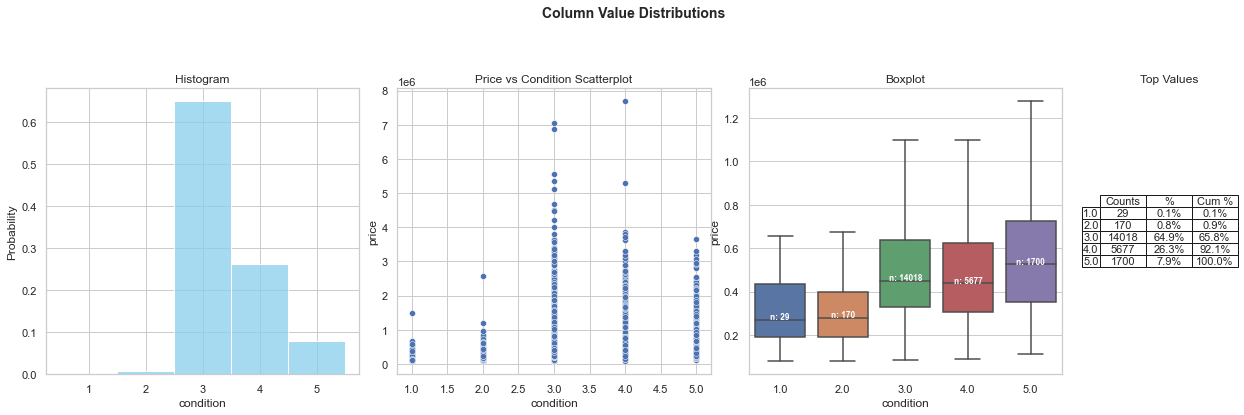

In [86]:
distplots(kc, 'condition', 'price', 5)

**Notes on Condition**
- From data dictionary: Score of 1/2 indicate major repairs required. Score 3 is average, with 4/5 be above average and exceptional.
- Roughly 2/3rd of homes are average (3), 1/4 are above average (4) and top 8% score excellent (5).
- Only 1% have 1/2 scores, probably due to market requirements to have a functional home to list for sale.
- Outliers: None denoted
- Distribution skewed left, candidate for category feature using OHE.
- Median price and IQR bands exhibit increasing step functions: 1/2 cluster-->3/4 cluster-->5

#### Grade

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Grade


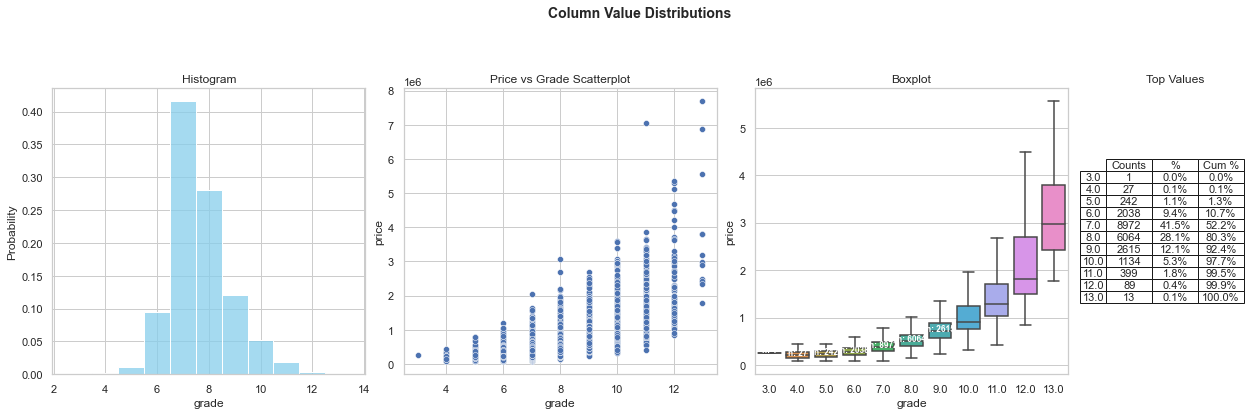

In [87]:
distplots(kc, 'grade', 'price', 13)

**Notes on Grade**
- From data dictionary: Range from 1-13 as an indication of quality level of building. 1-3 unfit, 13 mansion, 7 average.
- Roughly 41% of homes are average (7), another 37% at 6 or 8. Top 20% are 9+.
- Outliers: None denoted
- Distribution appears farily normal, candidate for continuous variable without log transformation.
- Median price and IQR bands exhibit exponetialality, pivoting at 9-13 markedly upwards.

#### Waterfront

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Waterfront


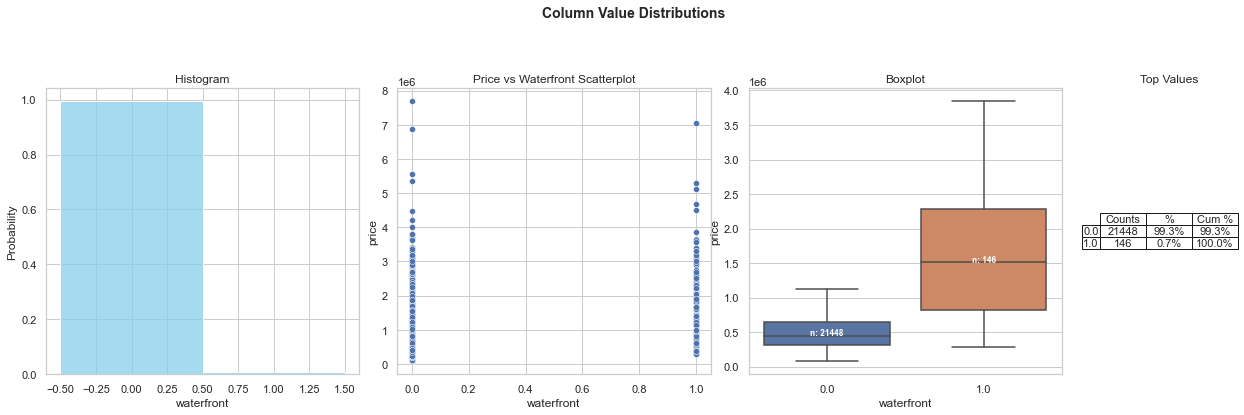

In [88]:
distplots(kc, 'waterfront', 'price', 10)

**Notes on Waterfront**
- Small sample of 146 but nearly triple the prices with high skew higher

#### Renovation Ind

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Renovation_Ind


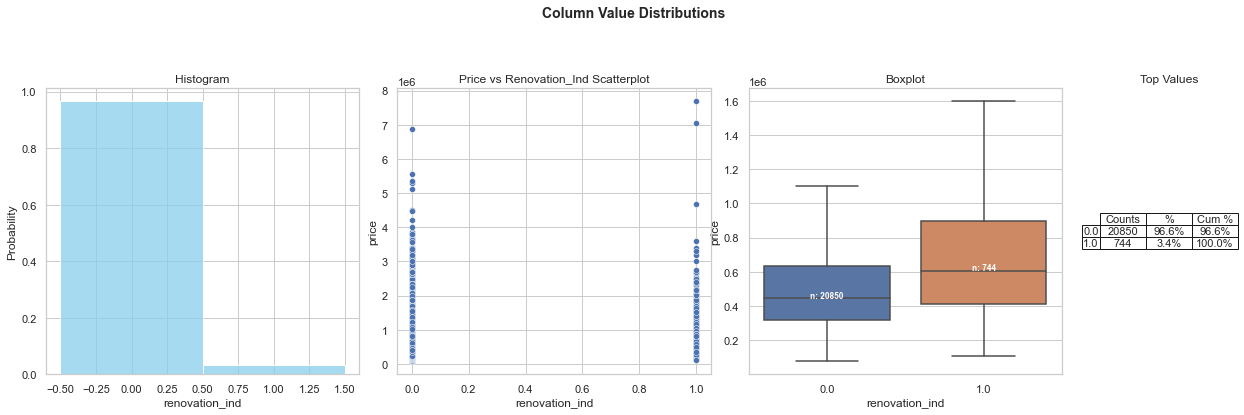

In [89]:
distplots(kc, 'renovation_ind', 'price', 10)

**Notes on Renovation Indicator**
- Small sample of 744 but median price is ~25% higher

#### View

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By View


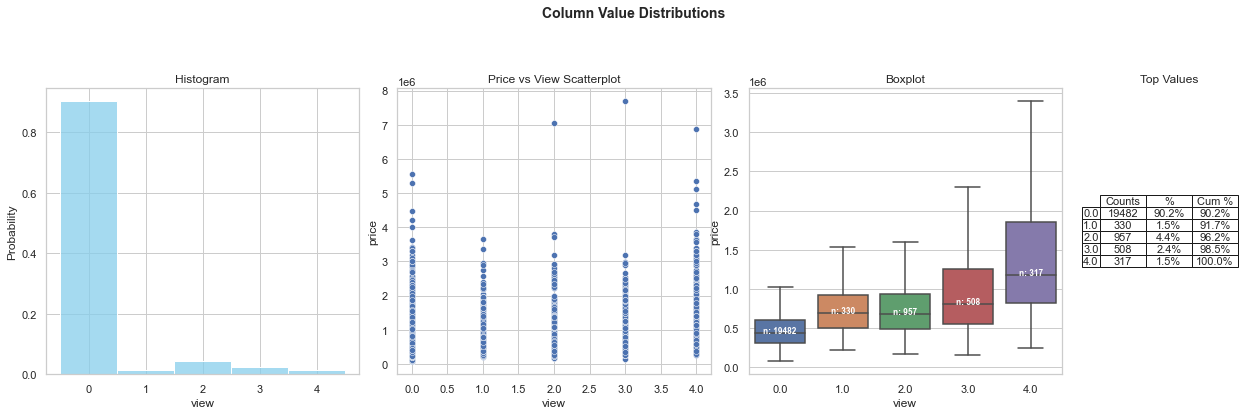

In [90]:
distplots(kc, 'view', 'price', 10)
plt.show()

**Notes on View**
- Only about 10% have a view value but media prices definitely get a lift, especially views 3/4

#### Zip

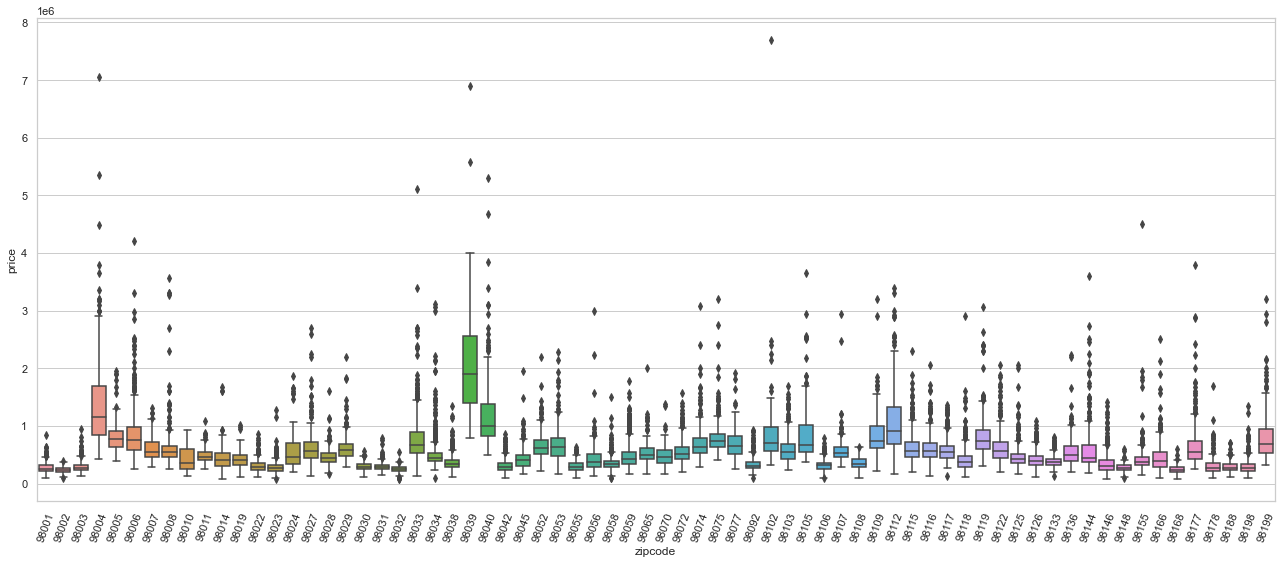

In [91]:
# Boxplot showing distributions of sales price by zipcode
plt.figure(figsize=(18,8))
sns.boxplot(data=kc, x='zipcode', y='price')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

**Notes on Zip**
- 70 distinct zip codes
- Zipcode definitely influence prices and price distributions
- Medians above \\$1M: 3 zips, Upper Whiskers above \\$1M: 8
- Outliers above \\$4M: 6 zips 

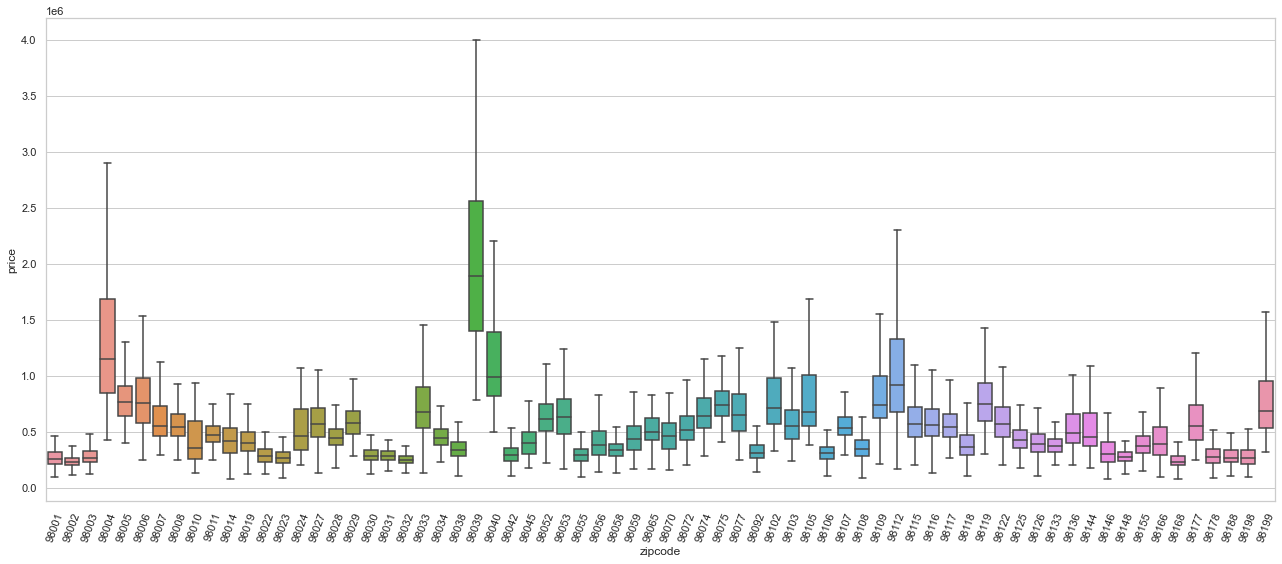

In [92]:
# Boxplot showing distributions of sales price by zipcode (no outliers shown)
plt.figure(figsize=(18,8))
sns.boxplot(data=kc, x='zipcode', y='price', showfliers=False)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

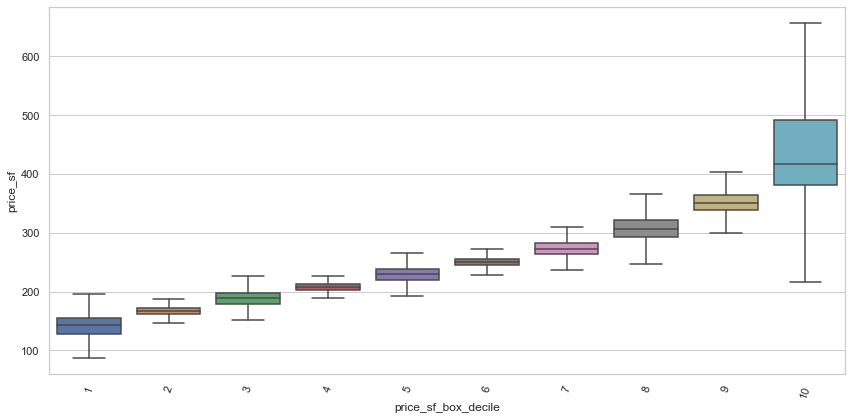

In [94]:
# Boxplot showing distributions of sales price by zipcode (no outliers shown)
plt.figure(figsize=(12,6))
sns.boxplot(data=kc, x='price_sf_box_decile', y='price_sf', showfliers=False)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### Continuous Profiles

In [95]:
# Columns on which to generate histograms to distribution exploration
pair_col1 = ['price','price_log','floors','bedrooms','bathrooms','waterfront','view','condition','grade','basement_ind','yr_built','renovation_ind']
pair_col2 = ['price','price_log','sqft_living','sqft_living_log','sqft_lot','sqft_lot_log','sqft_above','sqft_basement','sqft_living15','sqft_lot15','sqft_lot15_log']
pair_col3 = ['price','price_log','miles_fr_seattle','miles_fr_seattle_log','miles_fr_seattle_sqrt']

# function for scatterplot and diagonal histogram matrix for list of columns
def pairplot(df, column_list):
    g = sns.pairplot(df[column_list], palette='Set2', kind='scatter', diag_kind='kde', height=1)

#### Pairgrid 1

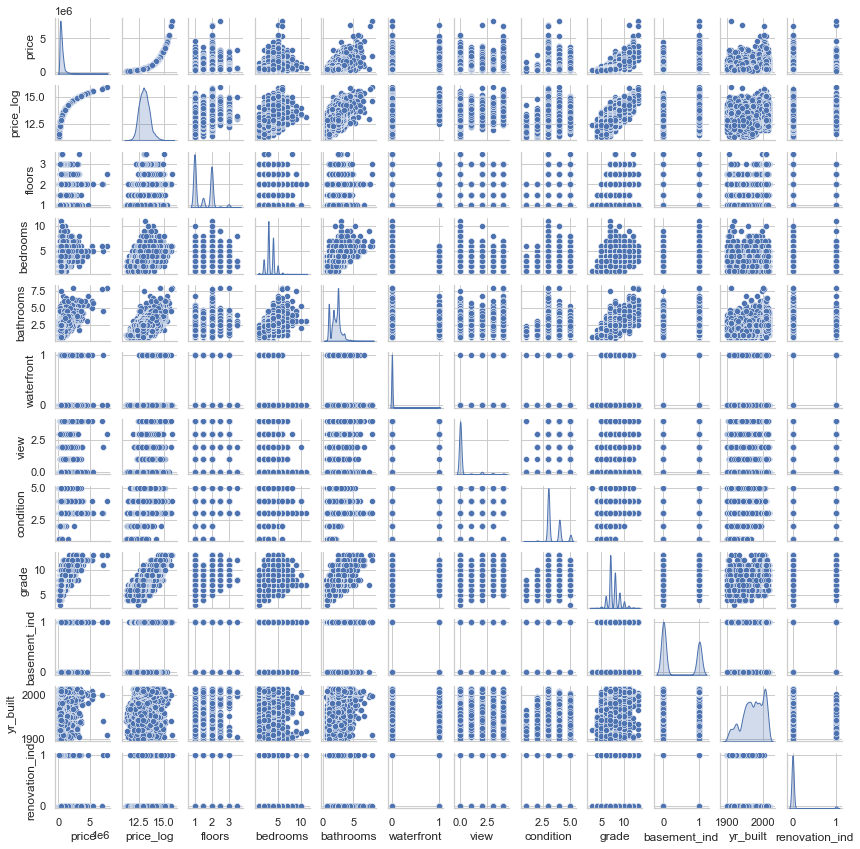

In [98]:
# plot the pairgrid for column set #1
pairplot(kc, pair_col1)

**Notes of Pairgrid 1**
- sqft_living and sqft_above have linear relations to price, pairplot between them definitely colinear
- sqft_lot doesn't seem to matter much to price, but let's check for extreme outliers to see if they impact

#### Pairgrid 2

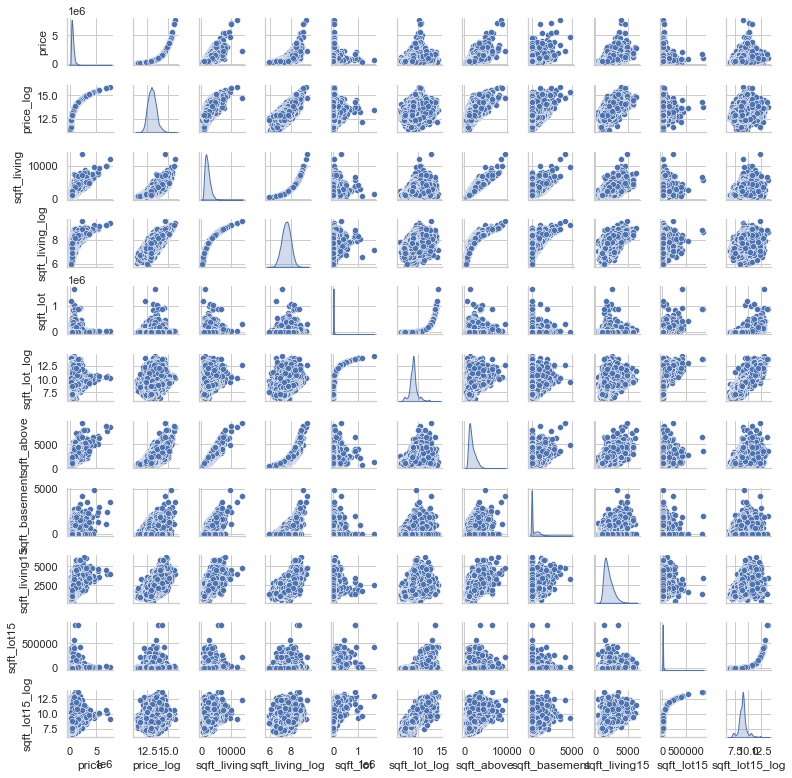

In [99]:
# plot the pairgrid for column set #2
pairplot(kc, pair_col2)

**Notes of Pairgrid 2**
- sqft_living15 (nearest 15 neighbors) has linear relations to price, but also to sqft_living (with more spread). Check collinearity
- sqft_lot15 doesn't seem to matter much to price

#### Pairgrid 3

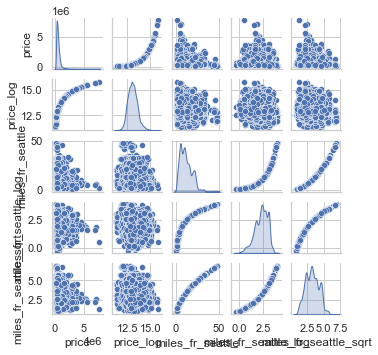

In [100]:
# plot the pairgrid for column set #2
pairplot(kc, pair_col3)

**Notes of Pairgrid 2**
- sqft_living15 (nearest 15 neighbors) has linear relations to price, but also to sqft_living (with more spread). Check collinearity
- sqft_lot15 doesn't seem to matter much to price

# Model Preparation

### Correlations

In [101]:
corr = kc.corr()
corr

id       price   price_log   price_box  \
id                     1.00000000 -0.01681929 -0.00378281  0.00250736   
price                 -0.01681929  1.00000000  0.89174398  0.63074929   
price_log             -0.00378281  0.89174398  1.00000000  0.74777553   
price_box              0.00250736  0.63074929  0.74777553  1.00000000   
bedrooms               0.00222497  0.31593374  0.35084285  0.25094174   
bedrooms_log           0.00457457  0.29917936  0.34312603  0.24780649   
bedrooms_box           0.00577637  0.22475914  0.25459786  0.34948863   
sqft_per_bedroom      -0.01206893  0.58022774  0.58381276  0.42173728   
sqft_per_bedroom_log  -0.00660795  0.54211898  0.58639442  0.43134255   
bedroom_der            0.00248072  0.31706441  0.35324344  0.25283772   
bathrooms              0.00509308  0.52592330  0.55127157  0.40873254   
bathrooms_log          0.01416198  0.45614424  0.52030704  0.39651432   
bathrooms_box          0.00999225  0.37265134  0.40864780  0.53630744   
sqft_living           -0.01235276  0.70192237  0.69520055  0.49453618   
sqft_living_log       -0.00197828  0.61183914  0.67481371  0.49332205   
sqft_living_box        0.00354262  0.45285038  0.50084162  0.66962073   
sqft_lot              -0.13196891  0.08986607  0.10001896  0.08058697   
sqft_lot_log          -0.15005166  0.16150872  0.13820726  0.07878394   
sqft_lot_box          -0.10657577  0.09117044  0.06951157  0.11443371   
floors                 0.01868940  0.25687585  0.31072274  0.25092349   
waterfront            -0.00361234  0.26430719  0.17072235  0.11792965   
view                   0.01172661  0.39349450  0.34465728  0.24282337   
condition             -0.02379765  0.03600353  0.03882814  0.02788857   
basement_ind           0.00344641  0.17822625  0.20904427  0.16213719   
grade                  0.00816215  0.66796750  0.70374893  0.51177079   
sqft_above            -0.01089396  0.60538225  0.60160941  0.42318008   
sqft_above_log        -0.00168295  0.54269422  0.58605111  0.42371754   
sqft_basement         -0.00441324  0.32108383  0.31308739  0.23037938   
yr_built               0.02173189  0.05402275  0.08066883  0.06764415   
yr_renovated          -0.01064177  0.11785096  0.10686640  0.08149339   
renovation_ind        -0.01065126  0.11753882  0.10652737  0.08122993   
lat                   -0.00176643  0.30669483  0.44883553  0.35620664   
long                   0.02068667  0.02204996  0.05088392  0.03295949   
sqft_living15         -0.00286215  0.58525672  0.61936248  0.45236880   
miles_fr_seattle_log  -0.01156446 -0.22110735 -0.26738861 -0.34370096   
sqft_lot15            -0.13863139  0.08283178  0.09227325  0.07030843   
sqft_lot15_log        -0.14790077  0.14785957  0.12366240  0.06656252   
miles_fr_seattle       0.00024073 -0.21725139 -0.27090158 -0.35577079   
miles_fr_seattle_sqrt -0.00499973 -0.22335001 -0.27408615 -0.35612945   
price_sf              -0.00518759  0.55608125  0.58337587  0.44023229   
price_sf_box          -0.00340544  0.38453353  0.46157153  0.61230840   
price_sf_box_decile    0.00115985  0.36548815  0.44763412  0.59384443   
sales_cnt                     nan         nan         nan         nan   

                         bedrooms  bedrooms_log  bedrooms_box  \
id                     0.00222497    0.00457457    0.00577637   
price                  0.31593374    0.29917936    0.22475914   
price_log              0.35084285    0.34312603    0.25459786   
price_box              0.25094174    0.24780649    0.34948863   
bedrooms               1.00000000    0.97160204    0.73521625   
bedrooms_log           0.97160204    1.00000000    0.73178861   
bedrooms_box           0.73521625    0.73178861    1.00000000   
sqft_per_bedroom      -0.02071532   -0.03495603   -0.02793415   
sqft_per_bedroom_log  -0.01307098   -0.02269615   -0.02252429   
bedroom_der            0.99396117    0.97580332    0.73389698   
bathrooms              0.52782623    0.52529558    0.39749195   
bathrooms_log          0.52050018    0

In [102]:
corr['price'].sort_values(ascending=False)

price                    1.00000000
price_log                0.89174398
sqft_living              0.70192237
grade                    0.66796750
price_box                0.63074929
sqft_living_log          0.61183914
sqft_above               0.60538225
sqft_living15            0.58525672
sqft_per_bedroom         0.58022774
price_sf                 0.55608125
sqft_above_log           0.54269422
sqft_per_bedroom_log     0.54211898
bathrooms                0.52592330
bathrooms_log            0.45614424
sqft_living_box          0.45285038
view                     0.39349450
price_sf_box             0.38453353
bathrooms_box            0.37265134
price_sf_box_decile      0.36548815
sqft_basement            0.32108383
bedroom_der              0.31706441
bedrooms                 0.31593374
lat                      0.30669483
bedrooms_log             0.29917936
waterfront               0.26430719
floors                   0.25687585
bedrooms_box             0.22475914
basement_ind             0.1

In [103]:
corr['price_log'].sort_values(ascending=False)

price_log                1.00000000
price                    0.89174398
price_box                0.74777553
grade                    0.70374893
sqft_living              0.69520055
sqft_living_log          0.67481371
sqft_living15            0.61936248
sqft_above               0.60160941
sqft_per_bedroom_log     0.58639442
sqft_above_log           0.58605111
sqft_per_bedroom         0.58381276
price_sf                 0.58337587
bathrooms                0.55127157
bathrooms_log            0.52030704
sqft_living_box          0.50084162
price_sf_box             0.46157153
lat                      0.44883553
price_sf_box_decile      0.44763412
bathrooms_box            0.40864780
bedroom_der              0.35324344
bedrooms                 0.35084285
view                     0.34465728
bedrooms_log             0.34312603
sqft_basement            0.31308739
floors                   0.31072274
bedrooms_box             0.25459786
basement_ind             0.20904427
waterfront               0.1

**Notes on Price Correlation**
- Strong correlations (0.6-0.8): sqft_living, grade, sqft_above
- Moderate correlations (0.4-0.6): sqft_living15, bathrooms, view

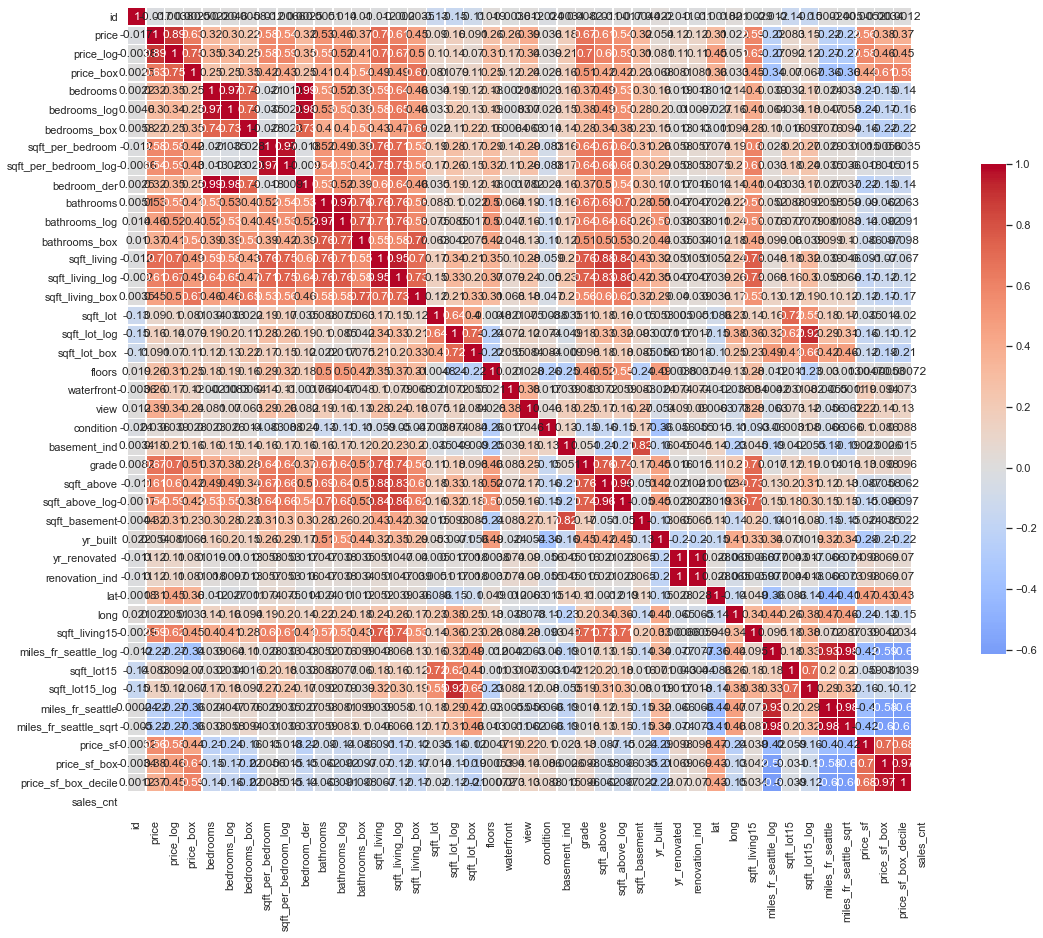

In [104]:
f, ax = plt.subplots(figsize=(18,15))
sns.heatmap(corr, center=0, linewidths=0.4, cmap='coolwarm', square=True, annot=True, cbar_kws={'shrink': 0.6})
plt.show()

### Multi-Colinearity

In [105]:
# Check for collinearity among potential predicator values by pairs
df=corr.stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['correlation']
# drop duplicates
df.drop_duplicates(inplace=True)
df[abs(df.correlation) > .65]

correlation
pairs                                                     
(id, id)                                        1.00000000
(renovation_ind, yr_renovated)                  0.99996841
(bedrooms, bedroom_der)                         0.99396117
(miles_fr_seattle, miles_fr_seattle_sqrt)       0.98468176
(miles_fr_seattle_log, miles_fr_seattle_sqrt)   0.98041149
(bedroom_der, bedrooms_log)                     0.97580332
(bedrooms, bedrooms_log)                        0.97160204
(bathrooms, bathrooms_log)                      0.97056176
(sqft_per_bedroom_log, sqft_per_bedroom)        0.96976938
(price_sf_box, price_sf_box_decile)             0.96714484
(sqft_above_log, sqft_above)                    0.96254504
(sqft_living, sqft_living_log)                  0.95460543
(miles_fr_seattle, miles_fr_seattle_log)        0.93256592
(sqft_lot15_log, sqft_lot_log)                  0.91865291
(price_log, price)                              0.89174398
(sqft_above, sqft_living)                       0.87644445
(sqft_above_log, sqft_living_log)               0.86498113
(sqft_living, sqft_above_log)                   0.84313040
(sqft_above, sqft_living_log)                   0.83237763
(sqft_basement, basement_ind)                   0.82088462
(bathrooms_log, bathrooms_box)                  0.77142700
(bathrooms_box, sqft_living_box)                0.76714803
(grade, sqft_living)                            0.76278854
(bathrooms, bathrooms_box)                      0.76213525
(sqft_living_log, bathrooms)                    0.76212297
(bathrooms_log, sqft_living_log)                0.76076068
(sqft_living, sqft_living15)                    0.75637934
(grade, sqft_above)                             0.75607087
(bathrooms, sqft_living)                        0.75575973
(sqft_living, sqft_per_bedroom)                 0.75546139
(price_log, price_box)                          0.74777553
(sqft_per_bedroom_log, sqft_living)             0.74600625
(sqft_living_log, sqft_per_bedroom_log)         0.74565771
(grade, sqft_living_log)                        0.74305012
(grade, sqft_above_log)                         0.74286613
(sqft_living_log, sqft_living15)                0.73719061
(bedrooms_box, bedrooms)                        0.73521625
(bedroom_der, bedrooms_box)                     0.73389698
(sqft_living_log, sqft_living_box)              0.73275822
(bedrooms_box, bedrooms_log)                    0.73178861
(sqft_living15, sqft_above)                     0.73174775
(sqft_lot15, sqft_lot)                          0.71820007
(sqft_lot_box, sqft_lot_log)                    0.71798996
(sqft_above_log, sqft_living15)                 0.71497823
(sqft_per_bedroom, sqft_living_log)             0.71448749
(sqft_living15, grade)                          0.71388854
(sqft_living, bathrooms_log)                    0.70816963
(grade, price_log)                              0.70374893
(price_sf, price_sf_box)                        0.70301535
(sqft_living, price)                            0.70192237
(sqft_lot15, sqft_lot15_log)                    0.70159827
(sqft_living, sqft_living_box)                  0.69718875
(sqft_above_log, bathrooms)                     0.69582273
(sqft_living, price_log)                        0.69520055
(bathrooms, sqft_above)                         0.68666203
(bathrooms_log, sqft_above_log)                 0.68389023
(price_sf, price_sf_box_decile)                 0.67557299
(price_log, sqft_living_log)                    0.67481371
(sqft_above, sqft_per_bedroom)                  0.67115390
(sqft_living_box, price_box)                    0.66962073
(price, grade)                                  0.66796750
(grade, bathrooms)                              0.66583960
(sqft_above, sqft_per_bedroom_log)              0.66319187
(sqft_lot15_log, sqft_lot_box)                  0.65935929
(sqft_above_log, sqft_per_bedroom_log)          0.65692285

**Notes on multi-colinearity**
- Ignore logs of columns compared to source column.
- Probably don't need sqft_living and sqft_above (0.88) as highly duplicatative.
- sqft_living and grade at 0.76 leave in for now (grade should be independent of sqft)
- sqft_living and bathrooms at 0.76 leave in for now (common knowledge pricing is set by # bathrooms somewhat independent of sqft?)
- Bathrooms and grade at 0.67, leave for now perhaps look at interaction term.

### One-hot encoding

In [106]:
# Convert category variables data type
categoricals= ['condition_grp','zipcode']
kc[categoricals] = kc[categoricals].astype('category')

In [107]:
# one hot encode categoricals
kc_ohe = pd.get_dummies(kc[categoricals], drop_first=True)
kc_ohe.head()

condition_grp_excellent  condition_grp_poor  zipcode_98002  zipcode_98003  \
0                        0                   0              0              0   
1                        0                   0              0              0   
2                        0                   0              0              0   
3                        1                   0              0              0   
4                        0                   0              0              0   

   zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  zipcode_98022  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98023  zipcode_98024  zipcode_98027  zipcode_98028  zipcode_98029  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              1              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98030  zipcode_98031  zipcode_98032  zipcode_98033  zipcode_98034  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98038  zipcode_98039  zipcode_98040  zipcode_98042  zipcode_98045  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98052  zipcode_98053  zipcode_98055  zipcode_98056  zipcode_98058  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98059  zipcode_98065  zipcode_98070  zipcode_98072  zipcode_98074  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              1   

   zipcode_98075  zipcode_98077  zipcode_98092  zipcode_98102  zipcode_98103  \
0              0              0              0              0              

In [108]:
# Concatenate OHE columns with original dataframe, dropping OHE original features
kc_comb = pd.concat([kc, kc_ohe], axis=1)
kc_comb.drop(['id','date','lat','long','home_lat_long'], axis=1, inplace=True)
kc_comb.head()

price   price_log  price_box   bedrooms  bedrooms_log  \
0 221,900.00000000 12.30998211 4.00314587 3.00000000    1.09861229   
1 538,000.00000000 13.19561384 4.04680802 3.00000000    1.09861229   
2 180,000.00000000 12.10071213 3.99142502 2.00000000    0.69314718   
3 604,000.00000000 13.31132948 4.05186762 4.00000000    1.38629436   
4 510,000.00000000 13.14216600 4.04442395 3.00000000    1.09861229   

   bedrooms_box  sqft_per_bedroom  sqft_per_bedroom_log  bedroom_der  \
0    1.54151148      393.33333333            5.97465743   3.00000000   
1    1.54151148      856.66666667            6.75304889   3.00000000   
2    0.85488198      385.00000000            5.95324333   2.00000000   
3    2.13756008      490.00000000            6.19440539   4.00000000   
4    1.54151148      560.00000000            6.32793678   3.00000000   

   bathrooms  bathrooms_log  bathrooms_box    sqft_living  sqft_living_log  \
0 1.00000000     0.00000000     0.00000000 1,180.00000000       7.07326972   
1 2.25000000     0.81093022     1.01512581 2,570.00000000       7.85166118   
2 1.00000000     0.00000000     0.00000000   770.00000000       6.64639051   
3 3.00000000     1.09861229     1.49488011 1,960.00000000       7.58069975   
4 2.00000000     0.69314718     0.83902461 1,680.00000000       7.42654907   

   sqft_living_box        sqft_lot  sqft_lot_log  sqft_lot_box     floors  \
0       7.65931218  5,650.00000000    8.63941082    4.20377896 1.00000000   
1       8.57807664  7,242.00000000    8.88765269    4.24953666 2.00000000   
2       7.16215595 10,000.00000000    9.21034037    4.30583245 1.00000000   
3       8.25644647  5,000.00000000    8.51719319    4.18043282 1.00000000   
4       8.07433240  8,080.00000000    8.99714715    4.26903318 1.00000000   

   waterfront       view  condition condition_grp  basement_ind      grade  \
0  0.00000000 0.00000000 3.00000000       average             0 7.00000000   
1  0.00000000 0.00000000 3.00000000       average             1 7.00000000   
2  0.00000000 0.00000000 3.00000000       average             0 6.00000000   
3  0.00000000 0.00000000 5.00000000     excellent             1 7.00000000   
4  0.00000000 0.00000000 3.00000000       average             0 8.00000000   

      sqft_above  sqft_above_log  sqft_basement       yr_built   yr_renovated  \
0 1,180.00000000      7.07326972     0.00000000 1,955.00000000     0.00000000   
1 2,170.00000000      7.68248245   400.00000000 1,951.00000000 1,991.00000000   
2   770.00000000      6.64639051     0.00000000 1,933.00000000     0.00000000   
3 1,050.00000000      6.95654544   910.00000000 1,965.00000000     0.00000000   
4 1,680.00000000      7.42654907     0.00000000 1,987.00000000     0.00000000   

   renovation_ind zipcode  sqft_living15  miles_fr_seattle_log     sqft_lot15  \
0      0.00000000   98178 1,340.00000000            2.03046029 5,650.00000000   
1      1.00000000   98125 1,690.00000000            2.05959866 7,639.00000000   
2      0.00000000   98028 2,720.00000000            2.31800767 8,062.00000000   
3      0.00000000   98136 1,360.00000000            1.88730642 5,000.00000000   
4      0.00000000   98074 1,800.00000000            2.60485433 7,503.00000000   

   sqft_lot15_log  miles_fr_seattle  miles_fr_seattle_sqrt     price_sf  \
0      8.63941082        7.61759185             2.75999852 188.05084746   
1      8.94102198        7.84282157             2.80050381 209.33852140   
2      8.99491694       10.15542122             3.18675716 233.76623377   
3      8.51719319        6.60156288             2.56935067 308.16326531   
4      8.92305822       13.52925438             3.67821348 303.57142857   

   price_sf_box  price_sf_box_decile  sales_cnt year_month  \
0    2.15349572                    3          1    2014-10   
1    2.16574291                    4          1    2014-12   
2    2.17779734                    5          1    2015-02   
3    2.20568742                    8          1    2014-12   
4    2.20425188        

### Train-Test Split

In [109]:
# Divide dataset into X predictors and y target
X = kc_comb.drop(['price','price_log','price_box'], axis=1)
y = kc_comb[['price','price_log','price_box']]

In [110]:
# Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [111]:
# Validate rows in splits look as expected
print(len(X_train), len(X_test), len(y_train), len(y_test))

17275 4319 17275 4319


In [112]:
X_train[X_train.isna().any(axis=1)]
X_test[X_test.isna().any(axis=1)]

Empty DataFrame
Columns: [bedrooms, bedrooms_log, bedrooms_box, sqft_per_bedroom, sqft_per_bedroom_log, bedroom_der, bathrooms, bathrooms_log, bathrooms_box, sqft_living, sqft_living_log, sqft_living_box, sqft_lot, sqft_lot_log, sqft_lot_box, floors, waterfront, view, condition, condition_grp, basement_ind, grade, sqft_above, sqft_above_log, sqft_basement, yr_built, yr_renovated, renovation_ind, zipcode, sqft_living15, miles_fr_seattle_log, sqft_lot15, sqft_lot15_log, miles_fr_seattle, miles_fr_seattle_sqrt, price_sf, price_sf_box, price_sf_box_decile, sales_cnt, year_month, condition_grp_excellent, condition_grp_poor, zipcode_98002, zipcode_98003, zipcode_98004, zipcode_98005, zipcode_98006, zipcode_98007, zipcode_98008, zipcode_98010, zipcode_98011, zipcode_98014, zipcode_98019, zipcode_98022, zipcode_98023, zipcode_98024, zipcode_98027, zipcode_98028, zipcode_98029, zipcode_98030, zipcode_98031, zipcode_98032, zipcode_98033, zipcode_98034, zipcode_98038, zipcode_98039, zipcode_98040, zipcode_98042, zipcode_98045, zipcode_98052, zipcode_98053, zipcode_98055, zipcode_98056, zipcode_98058, zipcode_98059, zipcode_98065, zipcode_98070, zipcode_98072, zipcode_98074, zipcode_98075, zipcode_98077, zipcode_98092, zipcode_98102, zipcode_98103, zipcode_98105, zipcode_98106, zipcode_98107, zipcode_98108, zipcode_98109, zipcode_98112, zipcode_98115, zipcode_98116, zipcode_98117, zipcode_98118, zipcode_98119, zipcode_98122, zipcode_98125, zipcode_98126, zipcode_98133, zipcode_98136, ...]
Index: []

In [113]:
# Use to choose features for this model
print(X_train.columns.tolist())

['bedrooms', 'bedrooms_log', 'bedrooms_box', 'sqft_per_bedroom', 'sqft_per_bedroom_log', 'bedroom_der', 'bathrooms', 'bathrooms_log', 'bathrooms_box', 'sqft_living', 'sqft_living_log', 'sqft_living_box', 'sqft_lot', 'sqft_lot_log', 'sqft_lot_box', 'floors', 'waterfront', 'view', 'condition', 'condition_grp', 'basement_ind', 'grade', 'sqft_above', 'sqft_above_log', 'sqft_basement', 'yr_built', 'yr_renovated', 'renovation_ind', 'zipcode', 'sqft_living15', 'miles_fr_seattle_log', 'sqft_lot15', 'sqft_lot15_log', 'miles_fr_seattle', 'miles_fr_seattle_sqrt', 'price_sf', 'price_sf_box', 'price_sf_box_decile', 'sales_cnt', 'year_month', 'condition_grp_excellent', 'condition_grp_poor', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode

## Functions

### calc_sm_ols

In [114]:
# Function takes X and y dataframes and generates statsmodel OLS results
def calc_sm_ols(model_nbr, X, y):
    '''Takes in X predictors and y target dataframes, generates statsmodel OLS model, predictions and summary stats'''
    X_int = sm.add_constant(X)
    model = sm.OLS(y, X_int).fit()
    print(model.summary())
    
    # generate model predictions and calculate errors 
    y_pred = model.predict(X_int)
    if y.name == 'price' :
        rmse = round(ev.rmse(y, y_pred))
        mae = round(ev.meanabs(y, y_pred))
    elif y.name == 'price_log' :
        rmse = round(ev.rmse(np.exp(y), np.exp(y_pred)))
        mae = round(ev.meanabs(np.exp(y), np.exp(y_pred)))
    else :
        print(f'Cannot calculate RMSE and MAE from y variable {y}')
                     
    print(f'\nModel {model_nbr} Summary Statistics')
    print(f'Root Mean Squared Error (RMSE): {rmse}.')
    print(f'Mean Absolute Error (MAE): {mae}.')
    return model

### qqplot

In [115]:
# function to generate QQ-plots an OLS model
def qqplot(model_nbr, model):
    '''Receives OLS model as parameter and generates QQ-plots for normality of residuals'''
    # generate QQ-plot
    residuals = model.resid
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title(f'\nModel {model_nbr} QQ-plot' )
    plt.show()

### plot_residuals

In [116]:
# function to generate residuals for each independent variable in an OLS model
def plot_residuals(model_nbr, model):
    '''Receives OLS model as parameter and generates residual plots for each predictor (X) to test for normality of residuals'''
    # loop through variables to show residuals for each
    x_vars = model.params.keys().tolist()
    x_vars.remove('const')

    for x in x_vars:
        f = plt.figure(figsize=(15,8))
        f = sm.graphics.plot_regress_exog(model, x, fig=f)   
        plt.show()
       # review in future iteration Checking Heteroscadasticity (Goldfeld-Quandt test)

### normalize

In [117]:
# normalize a feature (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

#denormalize (add mean and multiple by std)
def denormalize(feature, log_df):
    return log_df['price_log'].std()*feature + log_df['price_log'].mean()

## Model 1:  Naive Start

### Strategy

**Model 1 Approach**
- This model is a baseline model that we'll build on in future iterations with more complexity and features
- Model 1 will start without use of log columns and solve for price using top correlated columns
- Columns to try include all high (sqft_living, grade, sqft_above) and medium correlations (sqft_living15, bathrooms, view)
- Model 1 will not incorporate much colinearity concerns to start

In [118]:
# Model 1 Setup and call statsmodel function
features_m1 = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'grade']
X_train_m1 = X_train[features_m1]
y_train_m1 = y_train['price']
X_train_m1.head()

sqft_living     sqft_above  sqft_living15  bathrooms       view  \
16958 2,650.00000000 2,240.00000000 2,650.00000000 1.75000000 1.00000000   
6243  1,440.00000000 1,440.00000000 1,300.00000000 2.00000000 0.00000000   
8985  1,420.00000000   920.00000000 1,400.00000000 1.50000000 0.00000000   
9418  1,350.00000000 1,350.00000000 1,510.00000000 1.50000000 0.00000000   
14843 1,810.00000000 1,310.00000000 2,240.00000000 2.50000000 0.00000000   

           grade  
16958 8.00000000  
6243  7.00000000  
8985  7.00000000  
9418  7.00000000  
14843 8.00000000

### Run OLS

In [120]:
model_1 = calc_sm_ols(model_nbr=1, X=X_train_m1, y=y_train_m1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     3902.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:33:02   Log-Likelihood:            -2.3836e+05
No. Observations:               17275   AIC:                         4.767e+05
Df Residuals:                   17268   BIC:                         4.768e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.901e+05   1.47e+04    -40.048

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

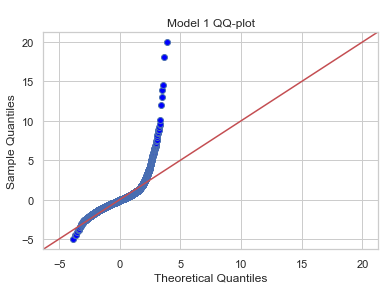

In [121]:
qqplot(model_nbr=1, model=model_1)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

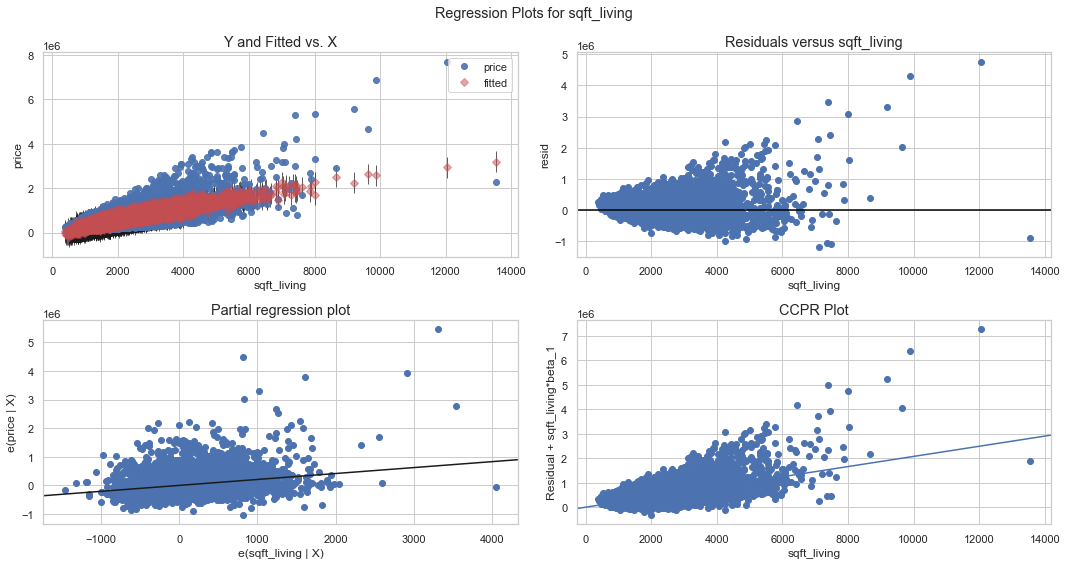

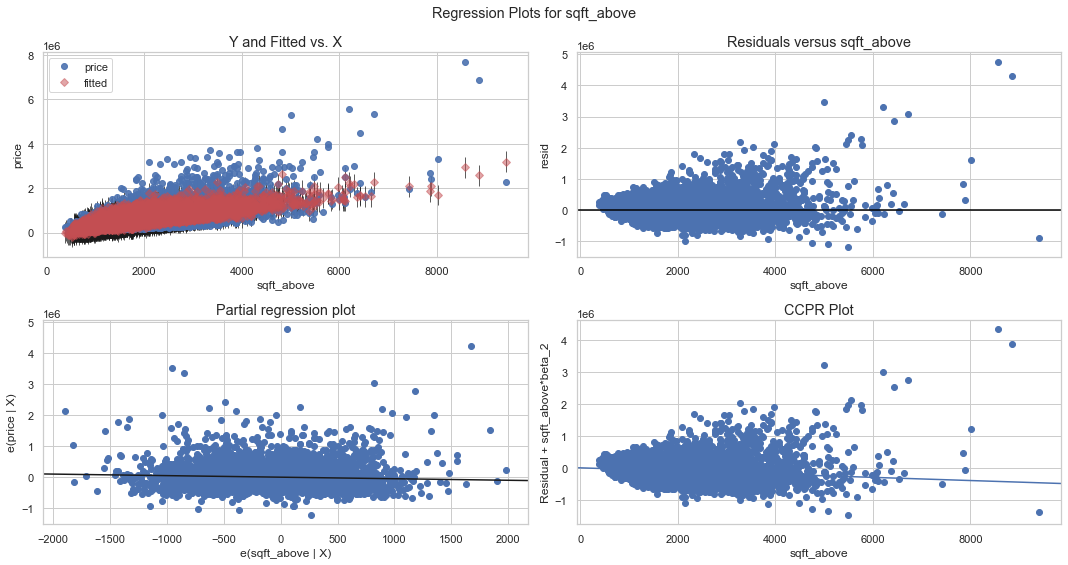

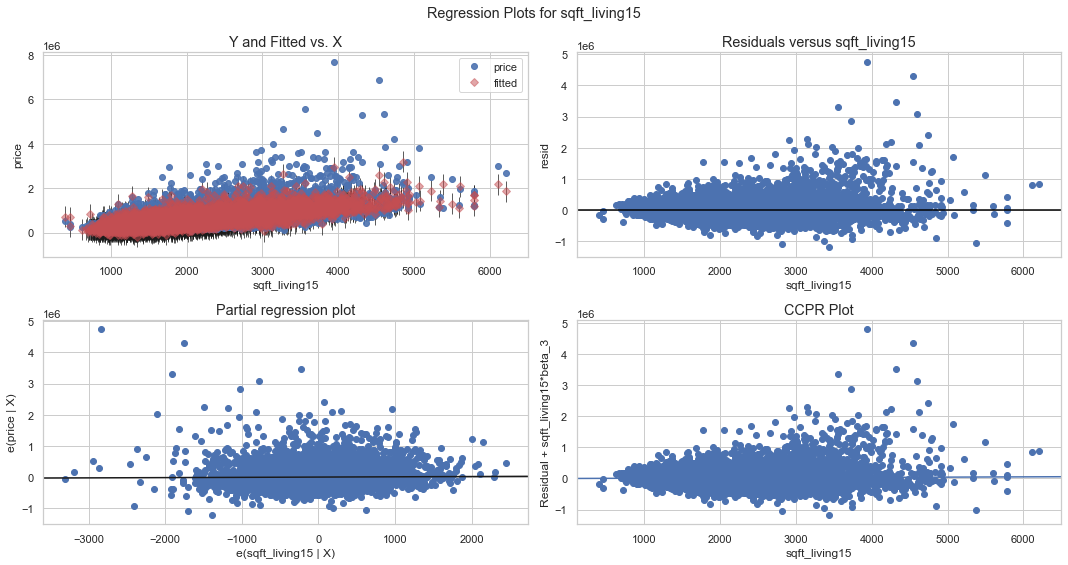

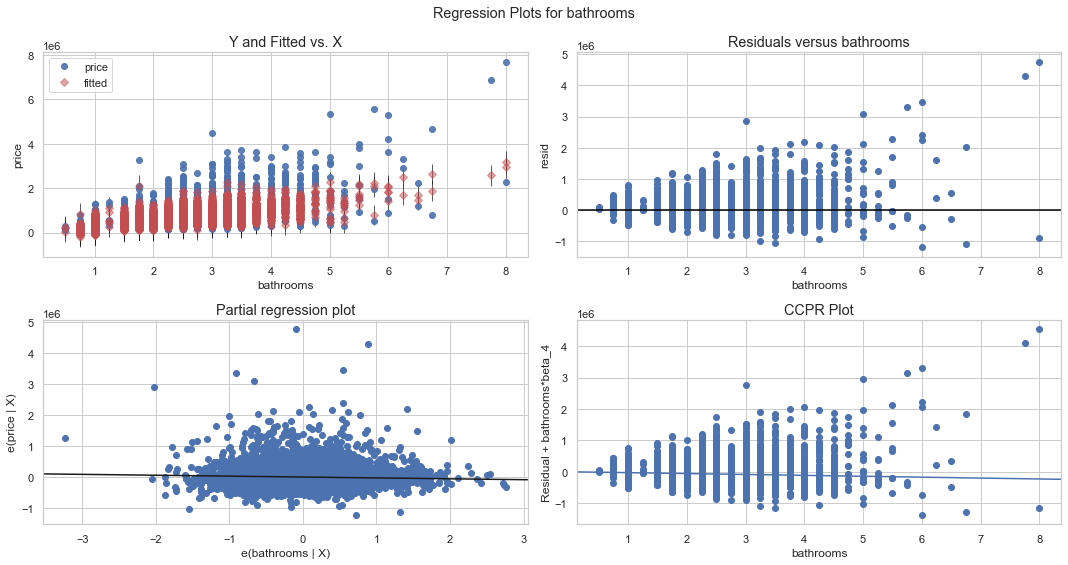

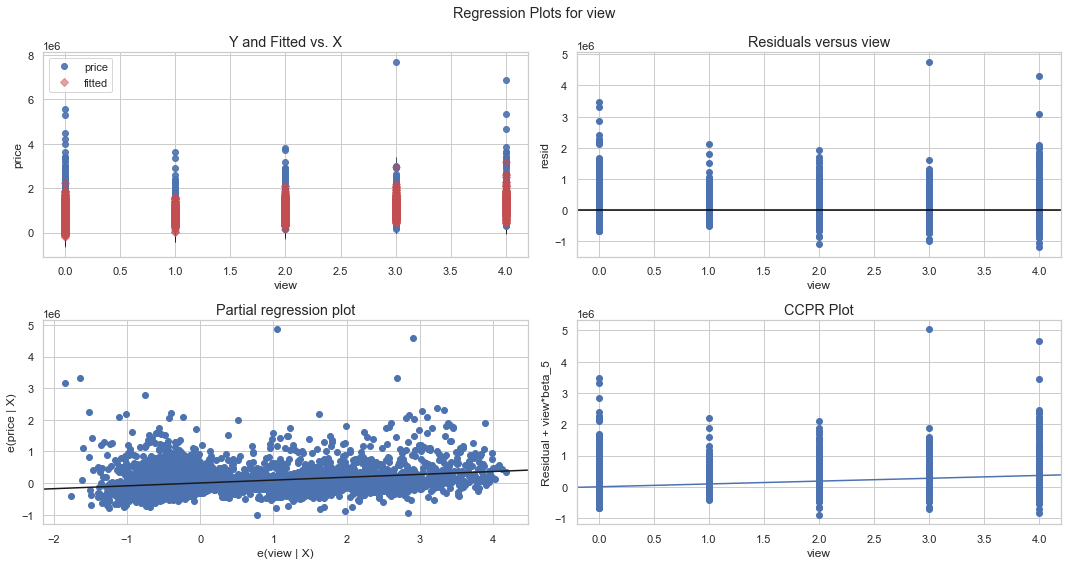

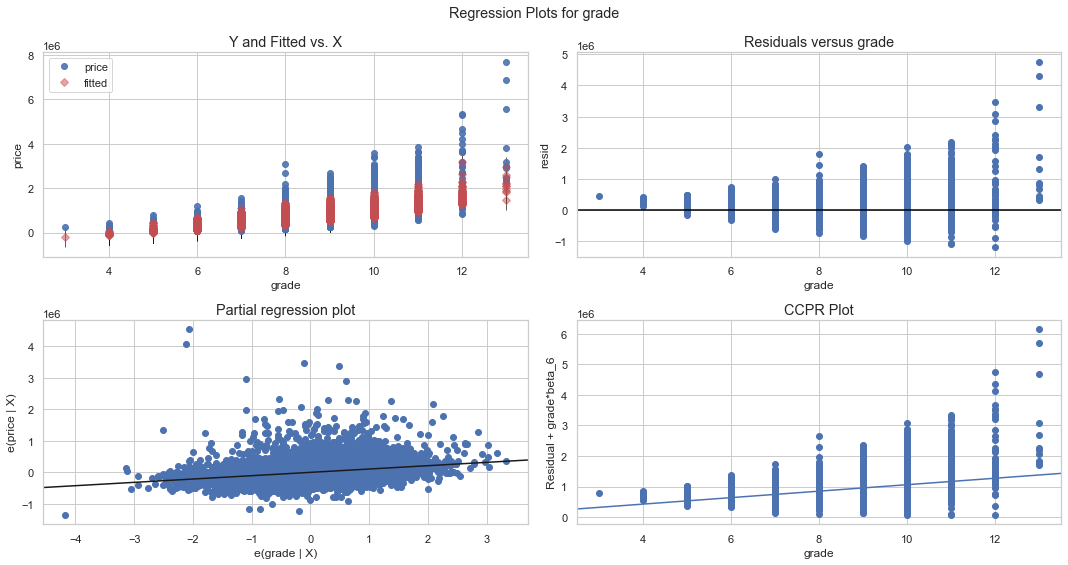

In [122]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=1, model=model_1)

### K-folds

### Model 1 Evaluation

## Model 2: Price Log + 3

### Strategy

**Model 2 Approach**
- This model is a baseline model that we'll build on in future iterations with more complexity and features
- Model 1 will start without use of log columns and solve for price using top correlated columns
- Columns to try include all high (sqft_living, grade, sqft_above) and medium correlations (sqft_living15, bathrooms, view)
- Removed bathrooms due to negative coefficient even though residuals didn't look too bad.

In [123]:
# Model 2 Setup and call statsmodel function
features_m2 = ['sqft_living_log', 'grade', 'view']
X_train_m2 = X_train[features_m2]
y_train_m2 = y_train['price_log']

### Run OLS

In [124]:
model_2 = calc_sm_ols(model_nbr=2, X=X_train_m2, y=y_train_m2)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     7654.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:33:30   Log-Likelihood:                -6071.8
No. Observations:               17275   AIC:                         1.215e+04
Df Residuals:                   17271   BIC:                         1.218e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.5681      0.054    1

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

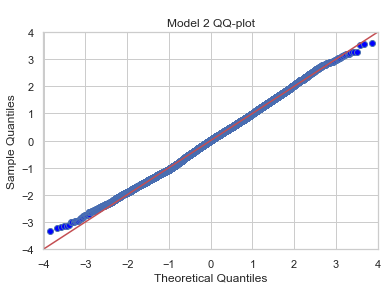

In [125]:
qqplot(model_nbr=2, model=model_2)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

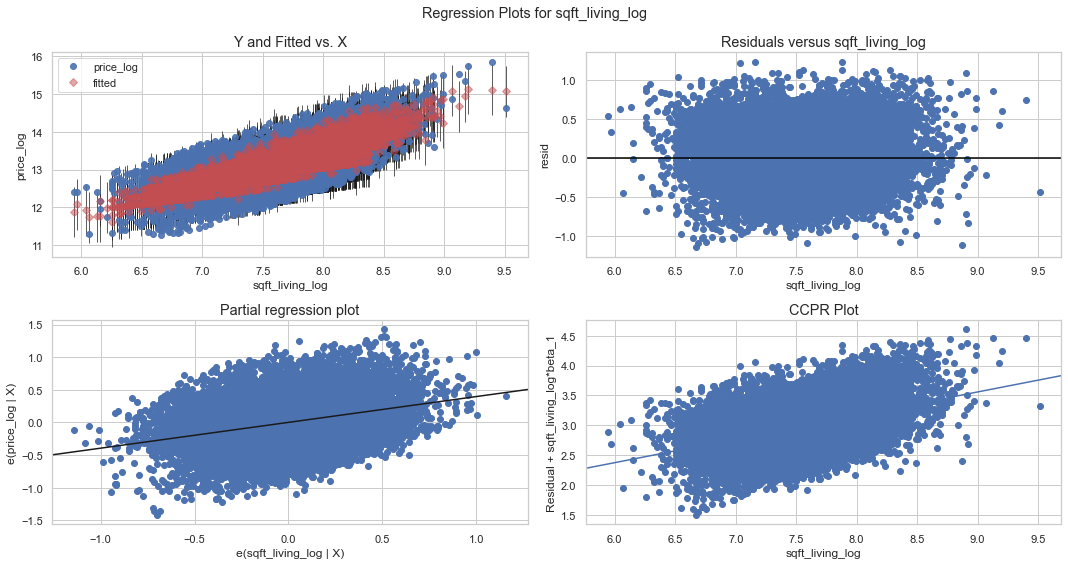

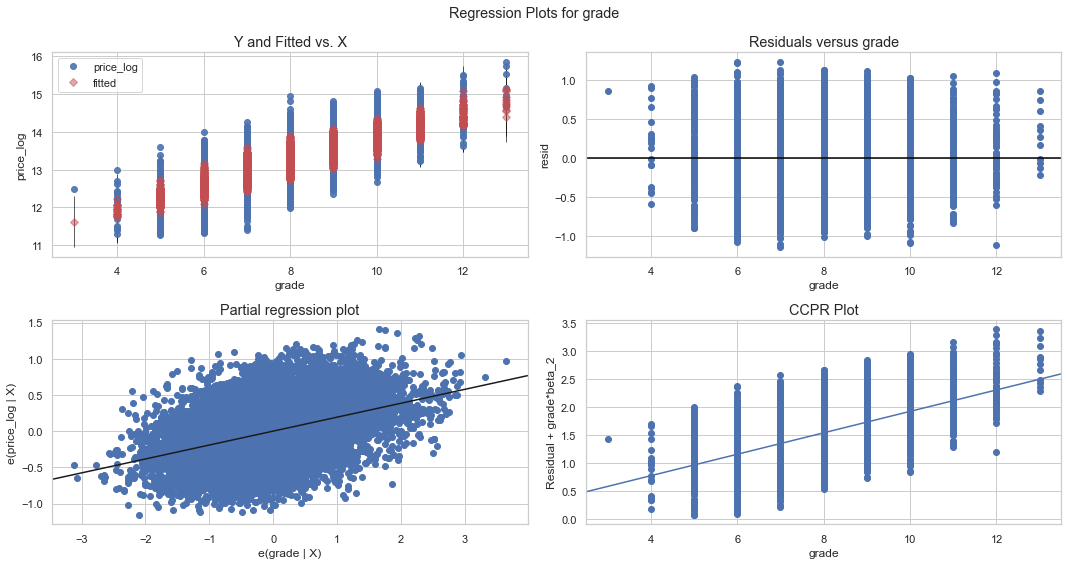

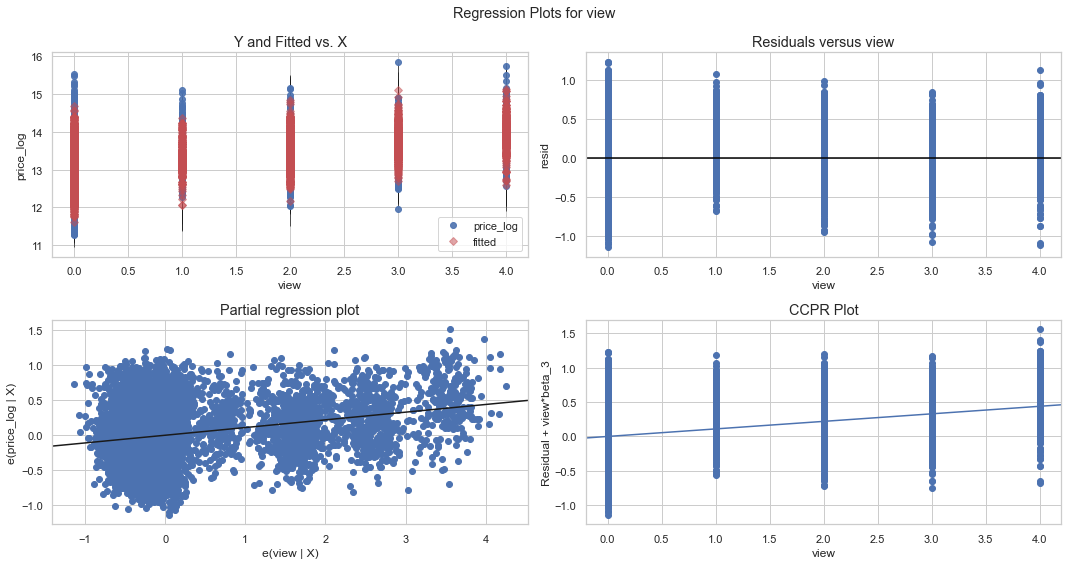

In [126]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=2, model=model_2)

### K-folds

### Model 2 Evaluation

## Model 3: SqFt Above

### Strategy

**Model 3 Approach**
- Trying to make sqft_above work, one of the highest correlation
- First try sqft_above, improves model very slightly r2 +0.001 and MAE +\\$383 but warning on multicollinearity; residuals cone-shaped
- Next try sqft_above_log, improves mode slightly r2 +0.004, MAE +||$1229 but negative coefficent and warning on multicol.
- Next try sqft_above_log with interaction term with sqft_living_box: causes both terms to flip negative coefficient
- Concluding not going to inlucde sqft_above in model at this point.

In [127]:
# Model 3 Setup and call statsmodel function
features_m3 = ['sqft_living_log', 'grade', 'view', 'sqft_above_log']
X_train_m3 = X_train[features_m3]
X_train_m3['sqft_living_above_int'] = X_train_m3['sqft_living_log']*X_train_m3['sqft_above_log']
y_train_m3 = y_train['price_log']
X_train_m3.head()

<ipython-input-127-4680b517fce0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_m3['sqft_living_above_int'] = X_train_m3['sqft_living_log']*X_train_m3['sqft_above_log']


sqft_living_log      grade       view  sqft_above_log  \
16958       7.88231492 8.00000000 1.00000000      7.71423114   
6243        7.27239839 7.00000000 0.00000000      7.27239839   
8985        7.25841215 7.00000000 0.00000000      6.82437367   
9418        7.20785987 7.00000000 0.00000000      7.20785987   
14843       7.50108212 8.00000000 0.00000000      7.17778242   

       sqft_living_above_int  
16958            60.80599924  
6243             52.88777838  
8985             49.53411677  
9418             51.95324393  
14843            53.84113537

### Run OLS

In [128]:
model_3 = calc_sm_ols(model_nbr=3, X=X_train_m3, y=y_train_m3)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     4793.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:34:03   Log-Likelihood:                -5858.5
No. Observations:               17275   AIC:                         1.173e+04
Df Residuals:                   17269   BIC:                         1.178e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    19.02

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

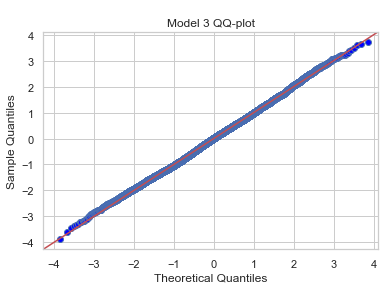

In [129]:
qqplot(model_nbr=3, model=model_3)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

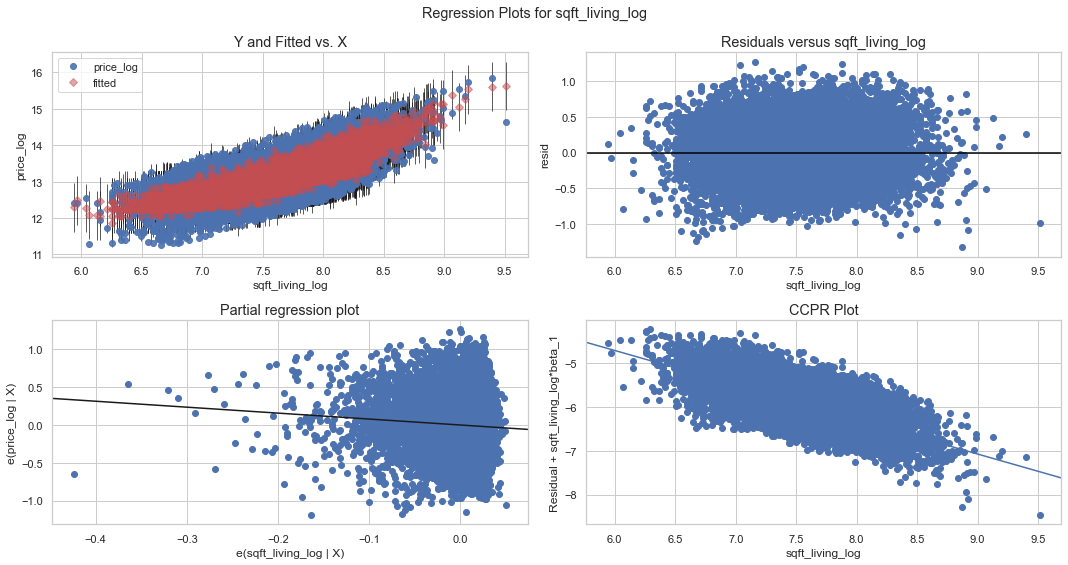

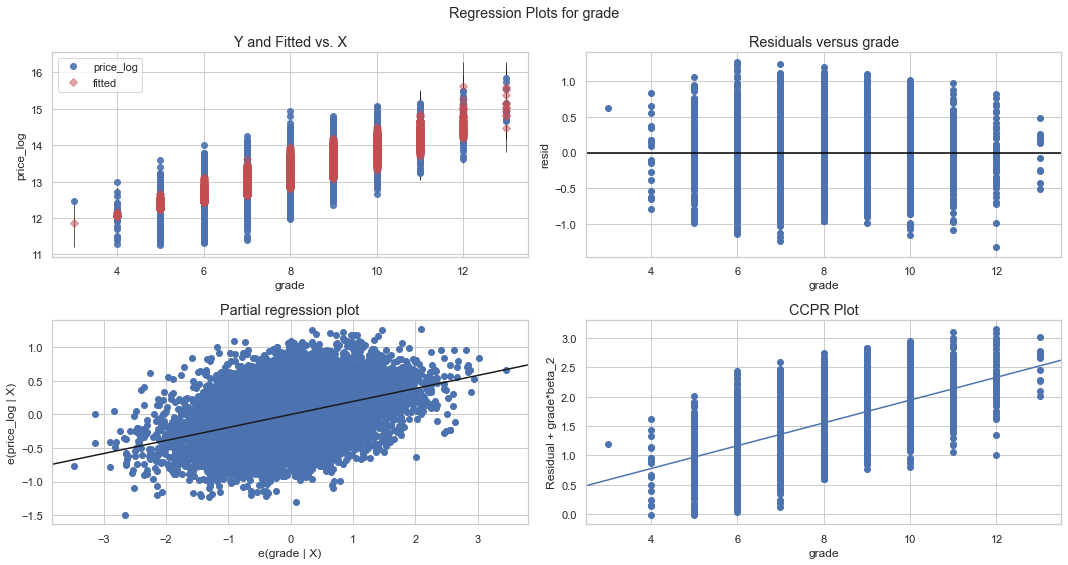

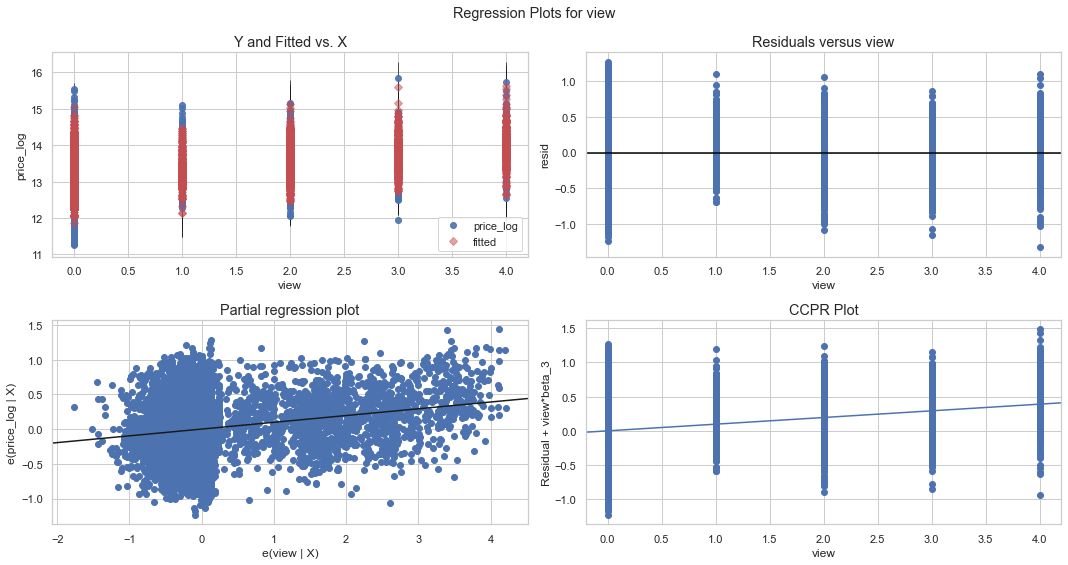

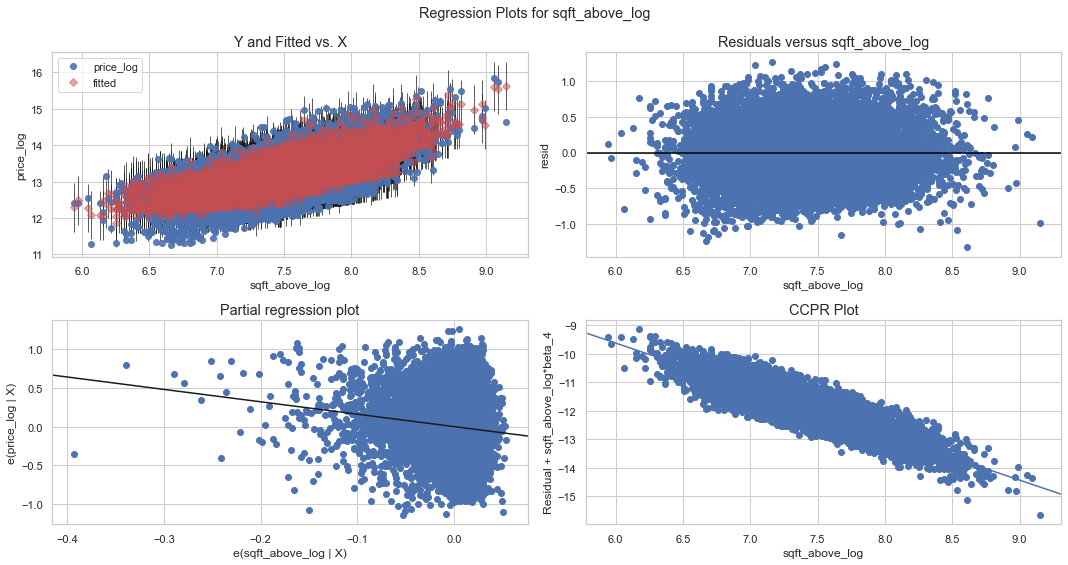

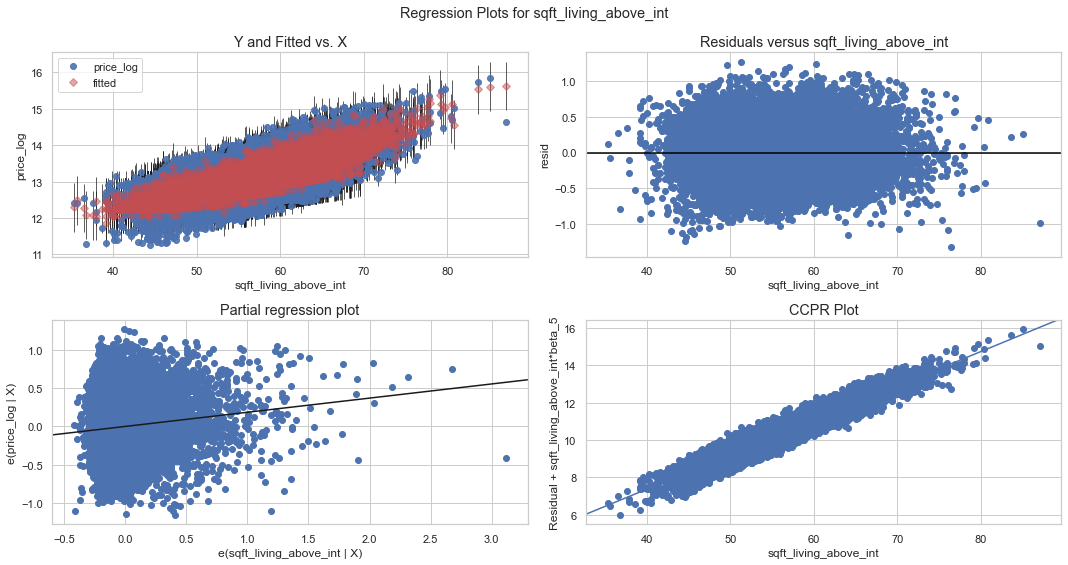

In [130]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=3, model=model_3)

### K-folds

### Model 3 Evaluation

## Model 4: New Baseline

### Strategy

**Model 4 Approach**
- Start with Model 2 baseline
- Trying to incorporate bedrooms based on intuition of housing pricing in market:
    - bedrooms: Gave negative coefficient and slighly raise MAE. Residuals show heteroskedascity at higher range of bedrooms.
    - bedrooms_log: Still negative coefficient. r2 improved 0.3% and \\$500 MAE improvement. Residuals still show heteroskedascity.
    - bedrooms_box-plot: lambda 0.58 (versus log lambda 0). Same, still negative coefficient and r2/MAE slightly worse than bedrooms_log.
    - bedrooms_der: Capping bedrooms at 6 removed heterosk. But didn't improve model in r2/MAE.
    - sqft_per_bedroom_log: Improved
- Trying gain to add bedrooms after dropping in Model2.
    - adding bathrooms results in negative coefficent and does not improve model
    - adding bathroom_log also results in negative coefficient and no improvement.
    - Dropping bathroom feature
- Renovation_ind: Adding this included adjusted r2 by 0.005, MAE +1366, RMSA+2757 and lowered JB by 8 to 36. Residuals ok.
- Waterfront, Basement both increased as well
- Condition also bumped r2 0.01 and MAE another $3K. Tried grouping condition for just excellent or poor but lost precision so scrapped.
- Sqft_Living15 barely most r2/MAE but caused a condition number warning about multi-colliarity. Dropping since 0.76 correlation to sqft_living.
- Sqft_Lot_Box less skewed than log and performed 150 MAE better. residuals look good. Coefficents are negative which I interpret as larger lot sizes probably outside suburbs where prices are lower.
    
    

In [131]:
# Model 4 Setup and call statsmodel function
features_m4 = ['sqft_living_log','grade','view','sqft_per_bedroom_log','renovation_ind','waterfront','basement_ind','condition'] 
X_train_m4 = X_train[features_m4]
y_train_m4 = y_train['price_log']
X_train_m4.head()

sqft_living_log      grade       view  sqft_per_bedroom_log  \
16958       7.88231492 8.00000000 1.00000000            6.78370263   
6243        7.27239839 7.00000000 0.00000000            5.88610403   
8985        7.25841215 7.00000000 0.00000000            6.15979986   
9418        7.20785987 7.00000000 0.00000000            6.10924758   
14843       7.50108212 8.00000000 0.00000000            6.40246984   

       renovation_ind  waterfront  basement_ind  condition  
16958      0.00000000  0.00000000             1 3.00000000  
6243       0.00000000  0.00000000             0 4.00000000  
8985       0.00000000  0.00000000             0 3.00000000  
9418       0.00000000  0.00000000             0 3.00000000  
14843      0.00000000  0.00000000             1 3.00000000

### Run OLS

In [132]:
model_4 = calc_sm_ols(model_nbr=4, X=X_train_m4, y=y_train_m4)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     3257.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:34:31   Log-Likelihood:                -5430.7
No. Observations:               17275   AIC:                         1.088e+04
Df Residuals:                   17266   BIC:                         1.095e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.1585 

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

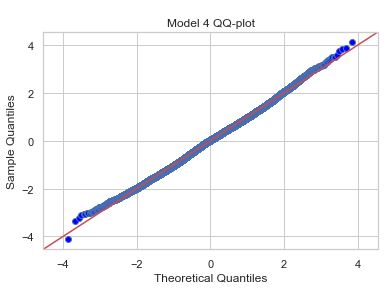

In [133]:
qqplot(model_nbr=4, model=model_4)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

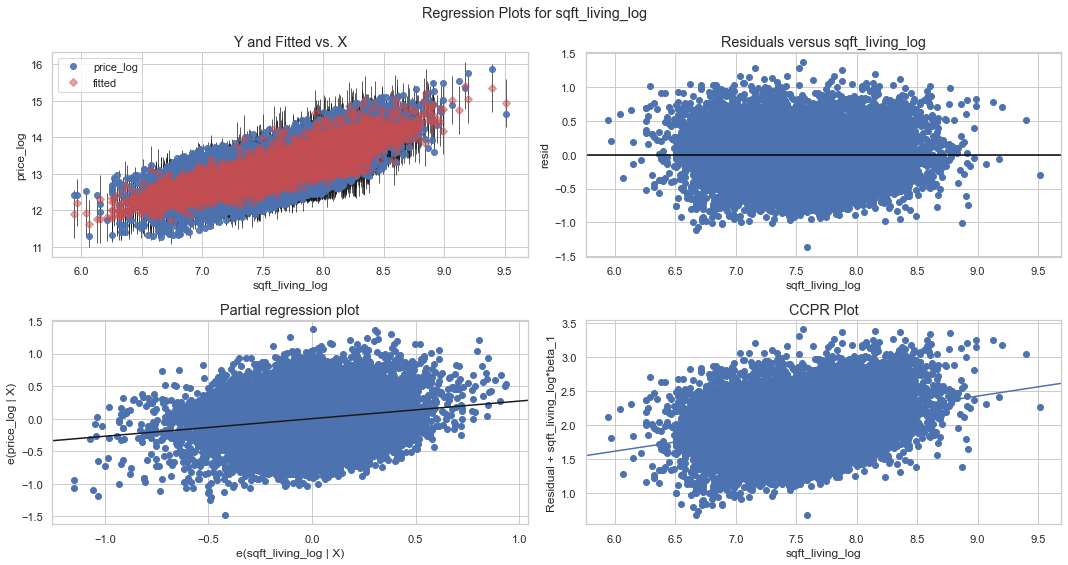

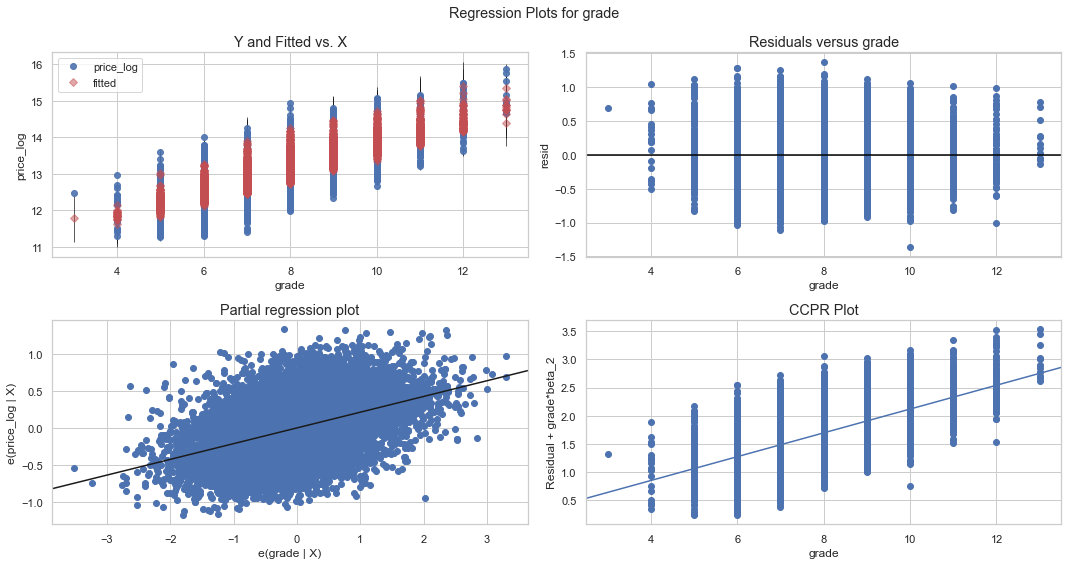

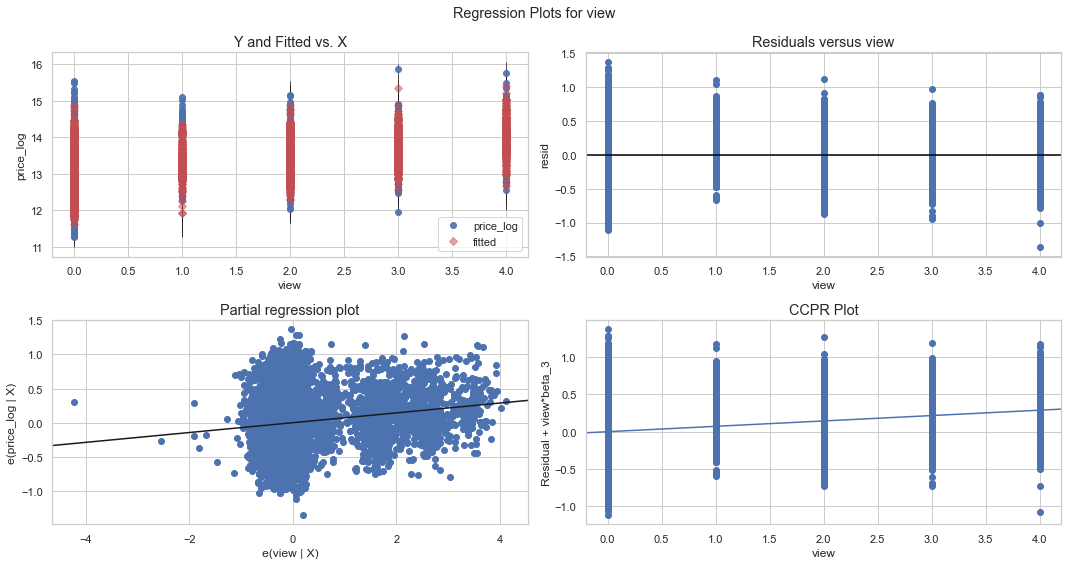

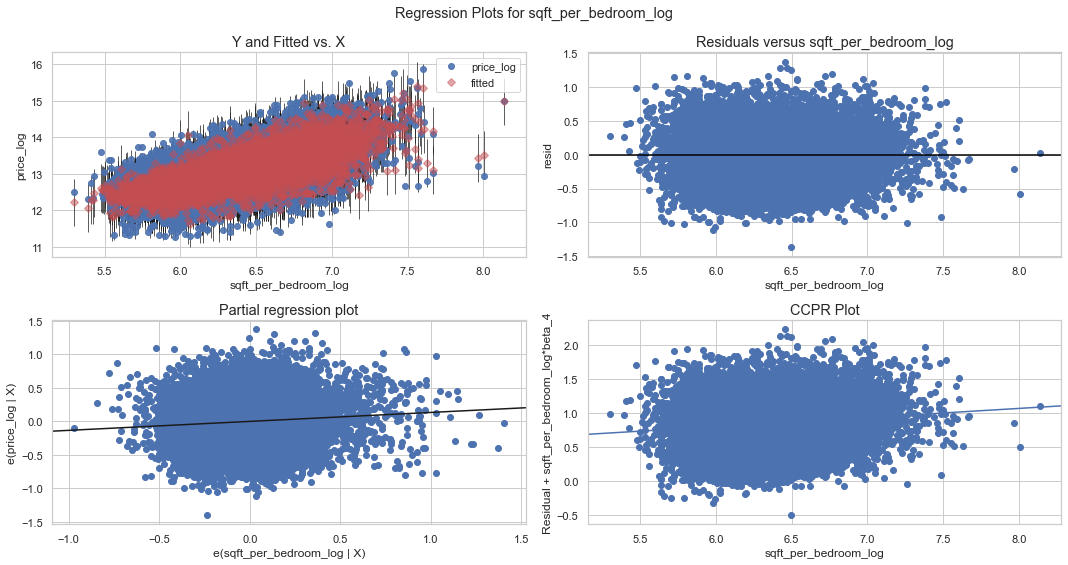

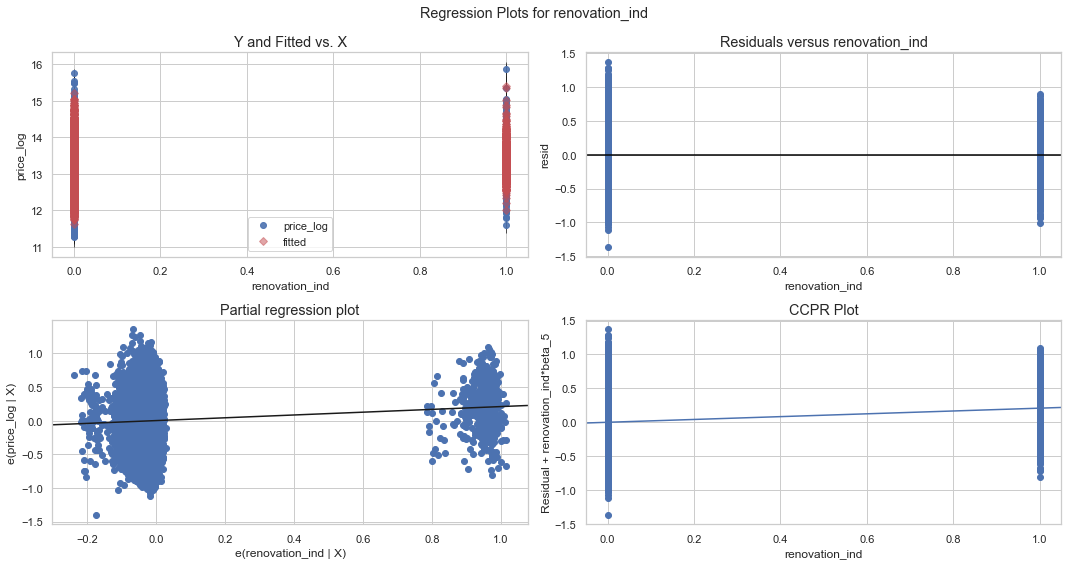

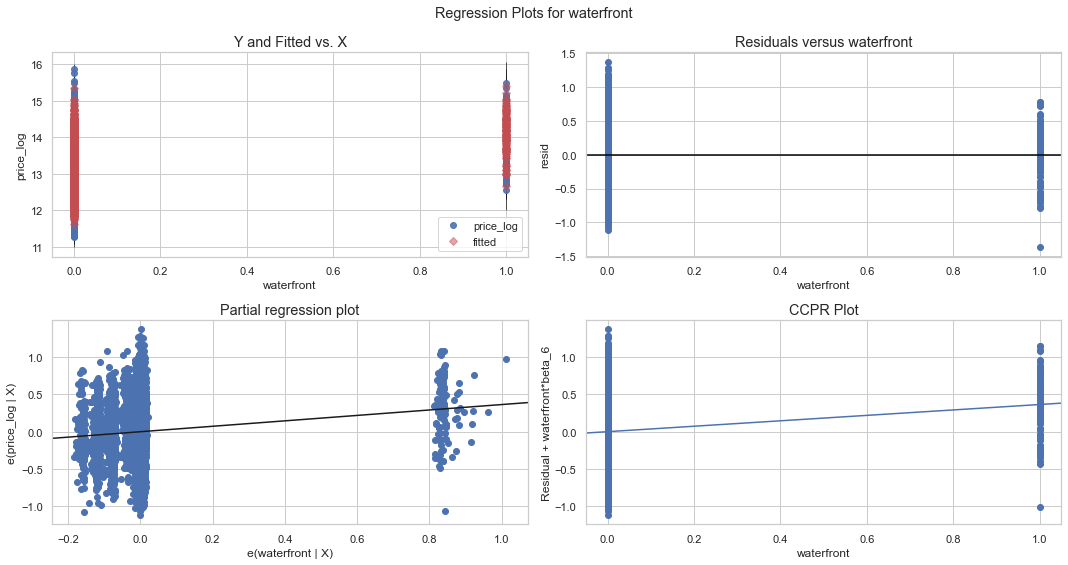

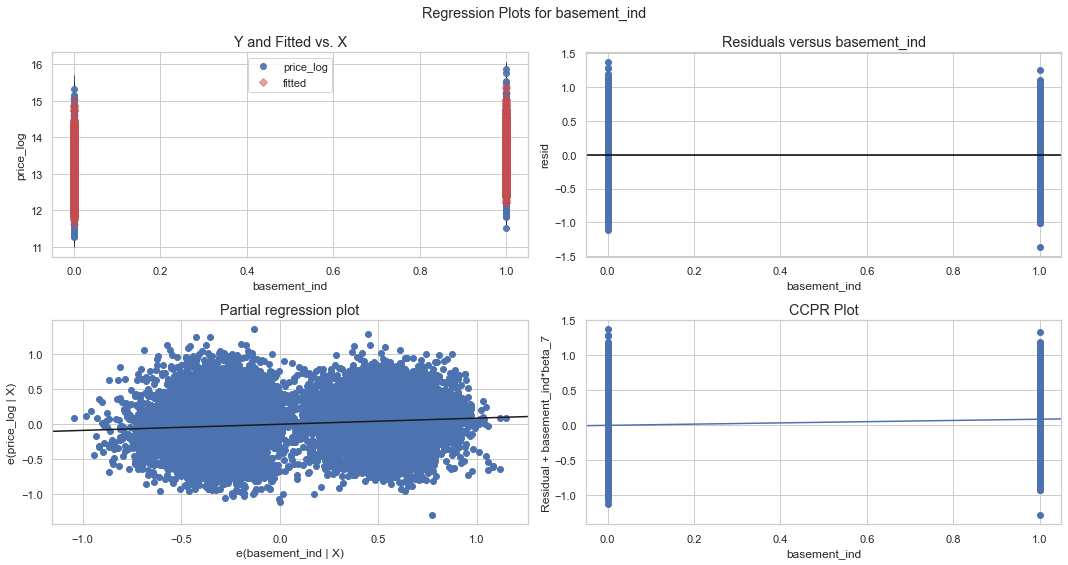

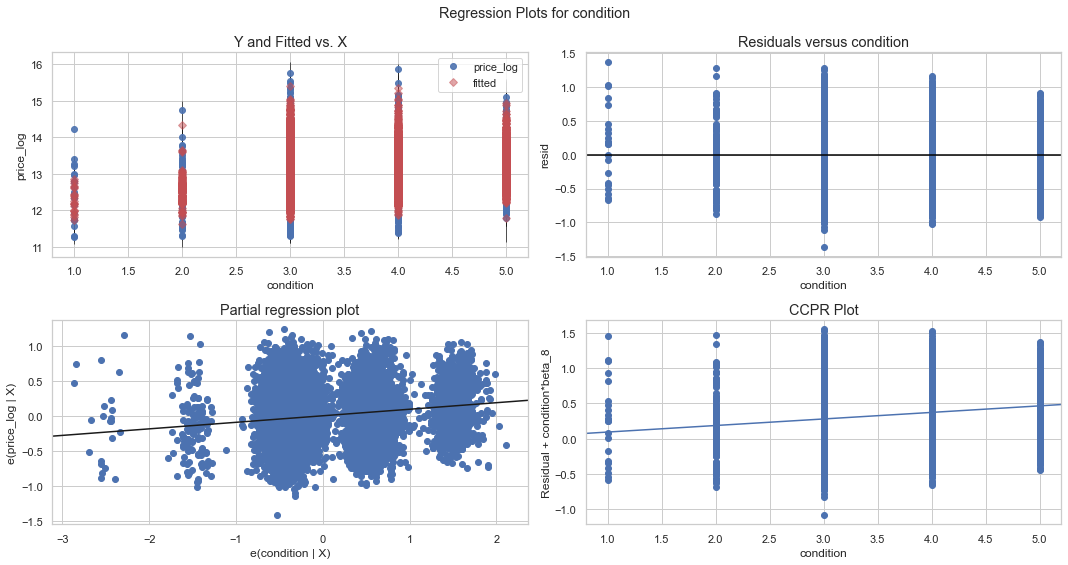

In [134]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=4, model=model_4)

### K-folds

### Model 4 Evaluation

## Model 5: + Seattle Miles

### Strategy

**Model 5 Approach**
- Start with Model 5 baseline
- Miles from Seattle sqrt: 
    - Raised r2 by strong +0.07. MAE dropped by \\$12459. No issues with skew or residuals. Has negative correlation with price as expected.
    - Adding this caused lot size sign to flip w p-value of .76 so removing for now.
    
    

In [135]:
# Model 4 Setup and call statsmodel function
features_m5 = ['sqft_living_log','grade','view','sqft_per_bedroom_log','renovation_ind','waterfront','basement_ind','condition','miles_fr_seattle_sqrt']
X_train_m5 = X_train[features_m5]
y_train_m5 = y_train['price_log']
X_train_m5.head()

sqft_living_log      grade       view  sqft_per_bedroom_log  \
16958       7.88231492 8.00000000 1.00000000            6.78370263   
6243        7.27239839 7.00000000 0.00000000            5.88610403   
8985        7.25841215 7.00000000 0.00000000            6.15979986   
9418        7.20785987 7.00000000 0.00000000            6.10924758   
14843       7.50108212 8.00000000 0.00000000            6.40246984   

       renovation_ind  waterfront  basement_ind  condition  \
16958      0.00000000  0.00000000             1 3.00000000   
6243       0.00000000  0.00000000             0 4.00000000   
8985       0.00000000  0.00000000             0 3.00000000   
9418       0.00000000  0.00000000             0 3.00000000   
14843      0.00000000  0.00000000             1 3.00000000   

       miles_fr_seattle_sqrt  
16958             4.26496744  
6243              1.83478680  
8985              3.61219657  
9418              3.47546129  
14843             3.87517133

### Run OLS

In [136]:
model_5 = calc_sm_ols(model_nbr=5, X=X_train_m5, y=y_train_m5)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     3993.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:34:54   Log-Likelihood:                -3655.2
No. Observations:               17275   AIC:                             7330.
Df Residuals:                   17265   BIC:                             7408.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.22

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

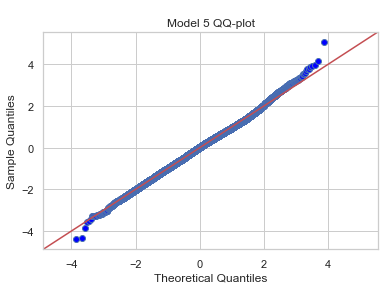

In [137]:
qqplot(model_nbr=5, model=model_5)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

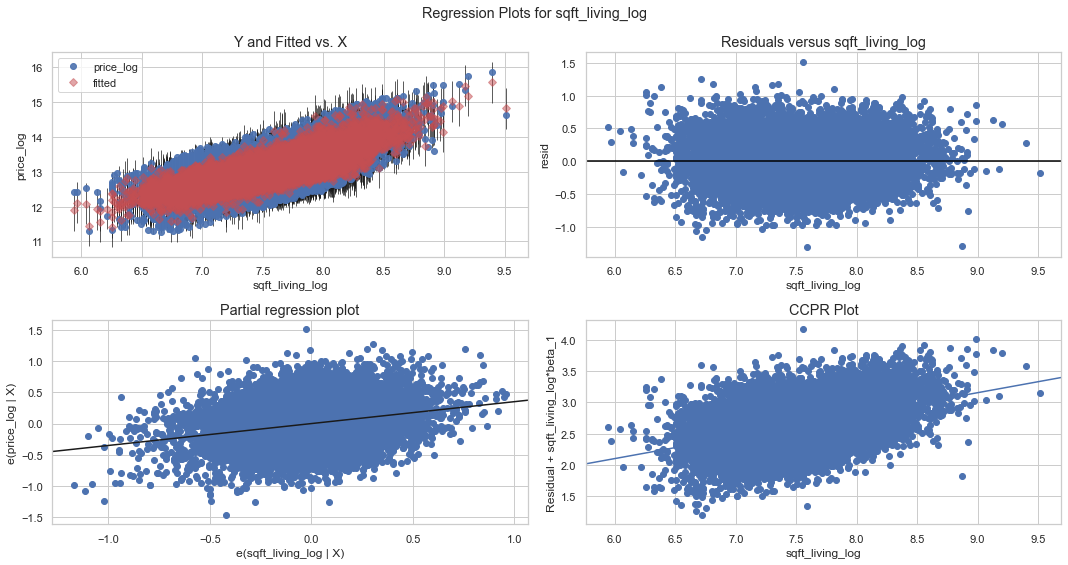

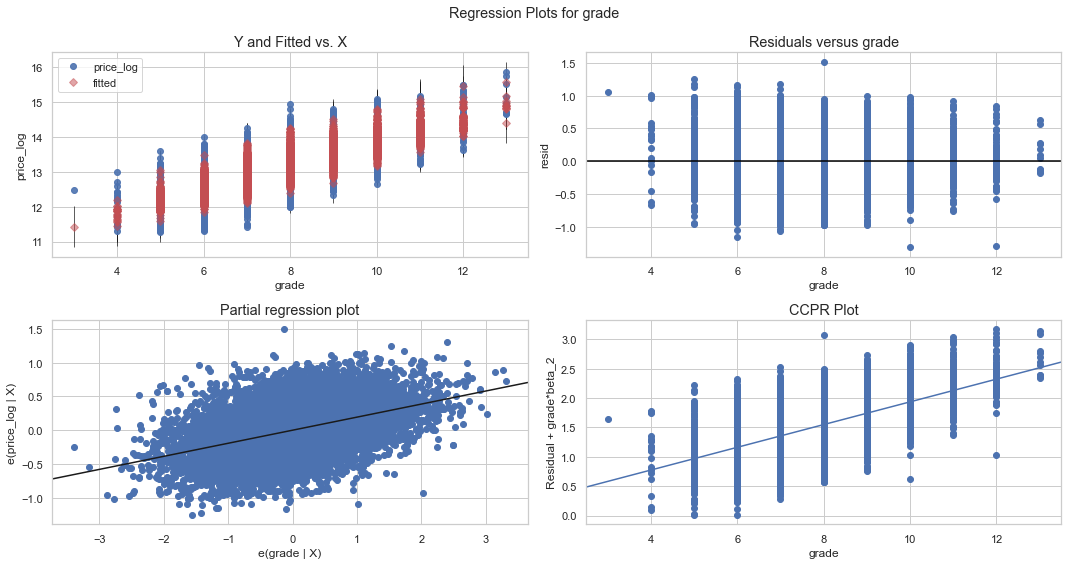

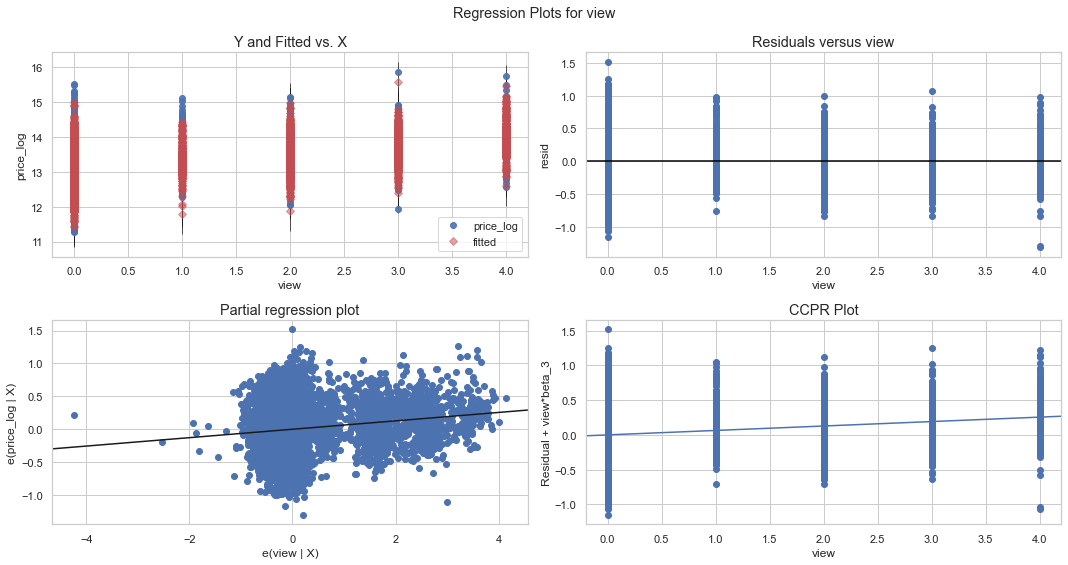

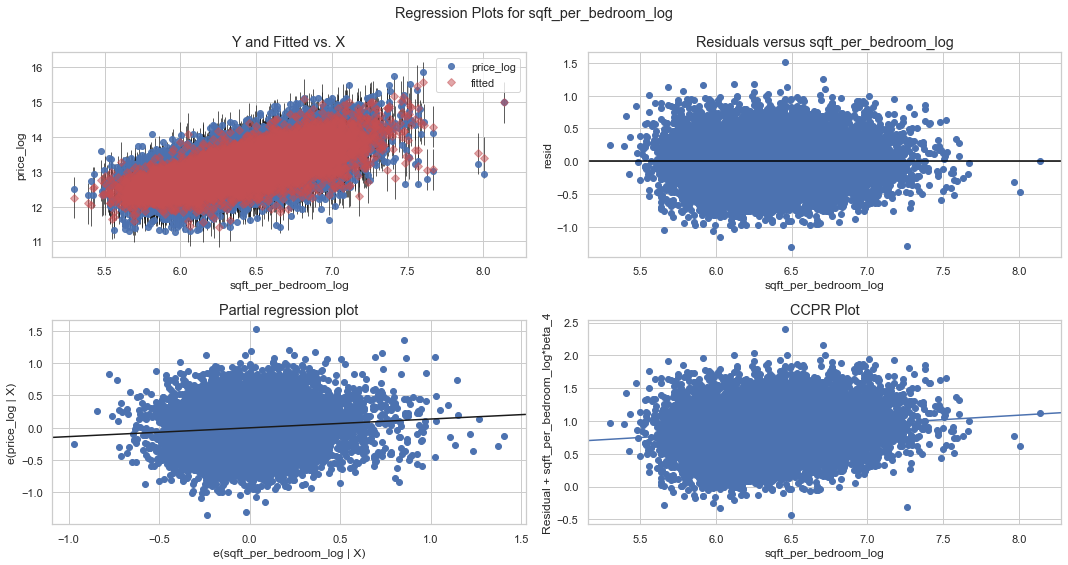

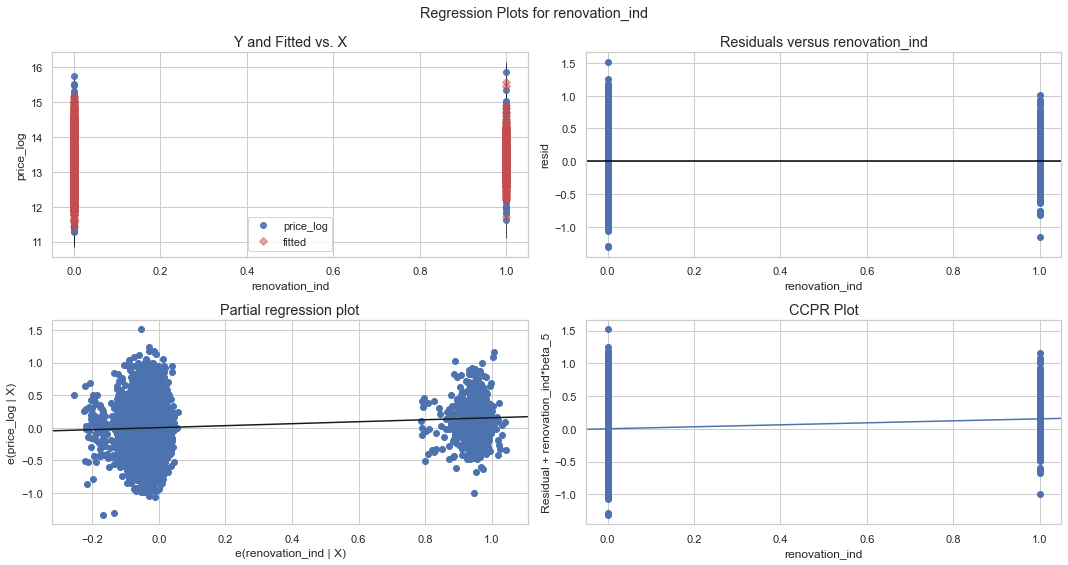

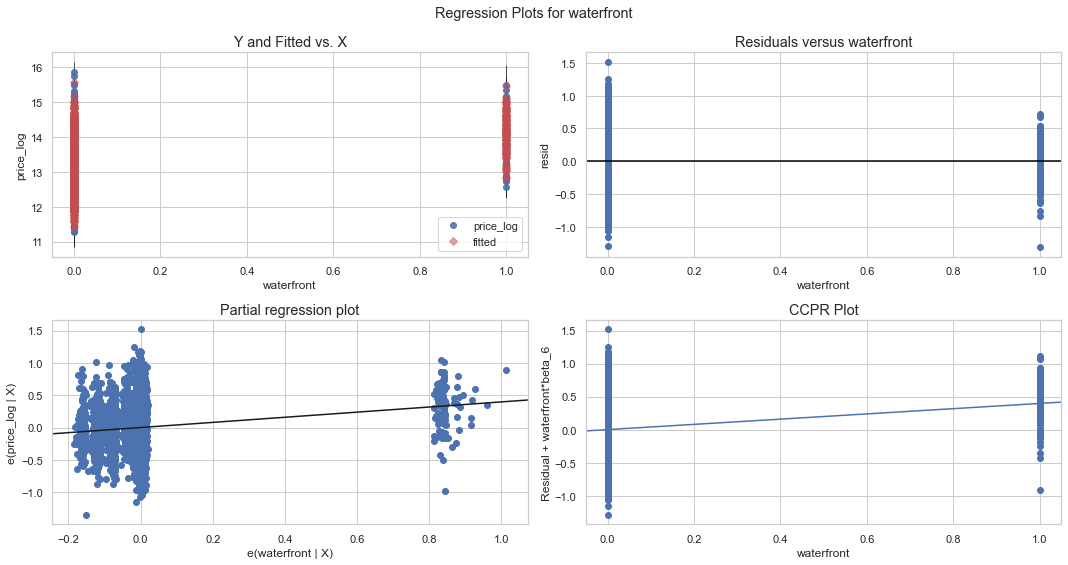

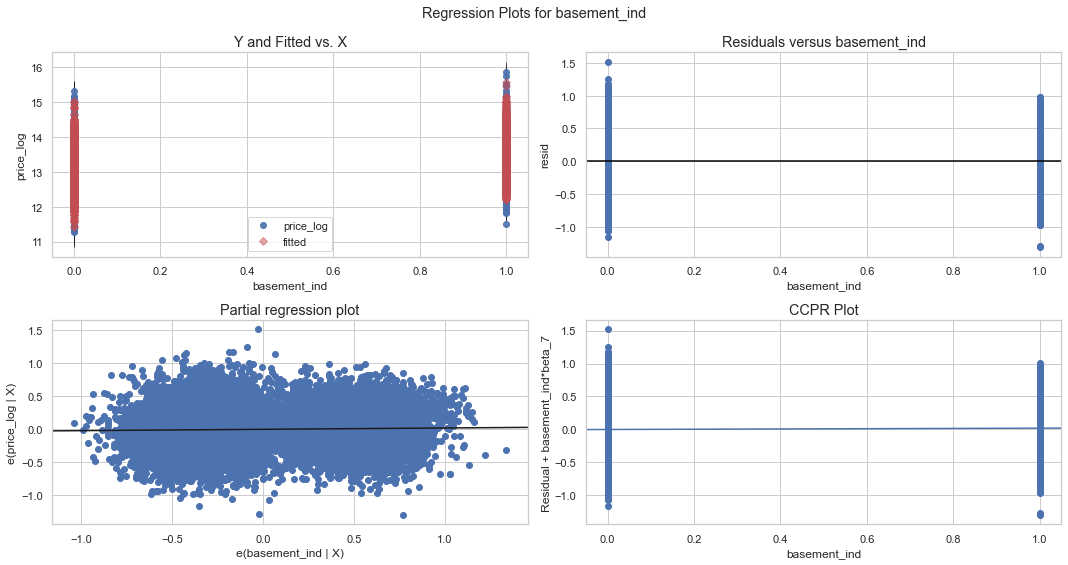

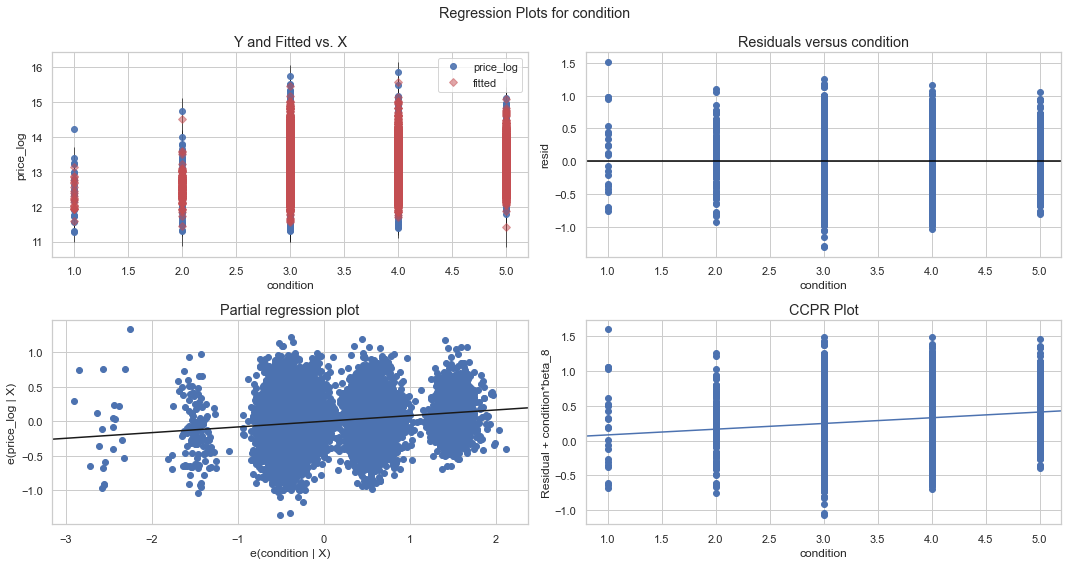

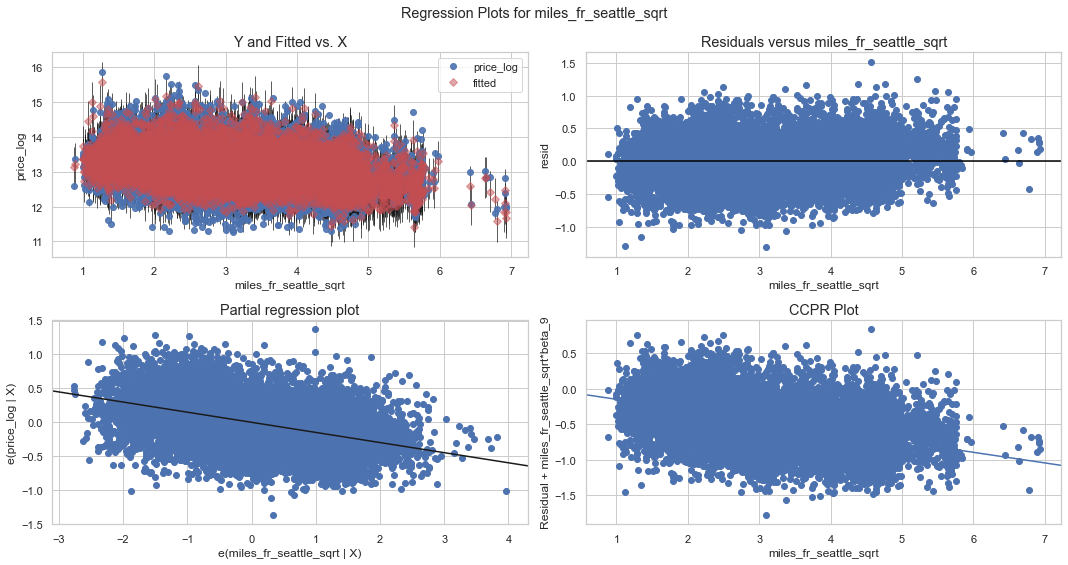

In [138]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=5, model=model_5)

### K-folds

### Model 5 Evaluation

## Model 6  + Zip Codes

### Strategy

**Model 6 Approach**
- Start with Model 5 baseline
- Miles from Seattle sqrt: 
    - Raised r2 by strong +0.07. MAE dropped by \\$12459. No issues with skew or residuals. Has negative correlation with price as expected.
    - Adding this caused lot size sign to flip w p-value of .76 so removing for now.
    
    

In [139]:
# Model 4 Setup and call statsmodel function
features_m6 = ['sqft_living_log','grade','view','sqft_per_bedroom_log','renovation_ind','waterfront','basement_ind','condition','miles_fr_seattle_sqrt',
               'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 
               'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 
               'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 
               'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 
               'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 
               'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 
               'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 
               'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 
               'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']
X_train_m6 = X_train[features_m6]
y_train_m6 = y_train['price_log']
X_train_m6.head()

sqft_living_log      grade       view  sqft_per_bedroom_log  \
16958       7.88231492 8.00000000 1.00000000            6.78370263   
6243        7.27239839 7.00000000 0.00000000            5.88610403   
8985        7.25841215 7.00000000 0.00000000            6.15979986   
9418        7.20785987 7.00000000 0.00000000            6.10924758   
14843       7.50108212 8.00000000 0.00000000            6.40246984   

       renovation_ind  waterfront  basement_ind  condition  \
16958      0.00000000  0.00000000             1 3.00000000   
6243       0.00000000  0.00000000             0 4.00000000   
8985       0.00000000  0.00000000             0 3.00000000   
9418       0.00000000  0.00000000             0 3.00000000   
14843      0.00000000  0.00000000             1 3.00000000   

       miles_fr_seattle_sqrt  zipcode_98002  zipcode_98003  zipcode_98004  \
16958             4.26496744              0              0              0   
6243              1.83478680              0              0              0   
8985              3.61219657              0              0              0   
9418              3.47546129              0              0              0   
14843             3.87517133              0              0              0   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
16958              0              0              0              0   
6243               0              0              0              0   
8985               0              0              0              0   
9418               0              0              0              0   
14843              0              0              0              0   

       zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  \
16958              0              0              0              0   
6243               0              0              0              0   
8985               0              0              0              0   
9418               0              0              0              0   
14843              0              0              0              0   

       zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  \
16958              0              0              0              0   
6243               0              0              0              0   
8985               0              0              0              0   
9418               0              0              0              0   
14843              0              0              0              0   

       zipcode_98028  zipcode_98029  zipcode_98030  zipcode_98031  \
16958              0              0              0              0   
6243               0              0              0              0   
8985               0              0              0              0   
9418               0              0              0              0   
14843              0              0              0              0   

       zipcode_98032  zipcode_98033  zipcode_98034  zipcode_98038  \
16958              0              0              0              0   
6243               0              0              0              0   
8985               0              0              0              0   
9418               0              0              0              0   
14843              0              0              0              0   

       zipcode_98039  zipcode_98040  zipcode_98042  zipcode_98045  \
16958              0              0              0              0   
6243               0              0              0              0   
8985               0              0              0              0   
9418               0              0              0              0   
14843              0              0              0              0   

       zipcode_98052  zipcode_98053  zipcode_98055  zipcode_98056  \
16958              0              0              0              0   
6243               0              0              0              0   
8985               0              0              0   

### Run OLS

In [140]:
model_6 = calc_sm_ols(model_nbr=6, X=X_train_m6, y=y_train_m6)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1487.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:35:15   Log-Likelihood:                 4304.6
No. Observations:               17275   AIC:                            -8451.
Df Residuals:                   17196   BIC:                            -7838.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.65

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

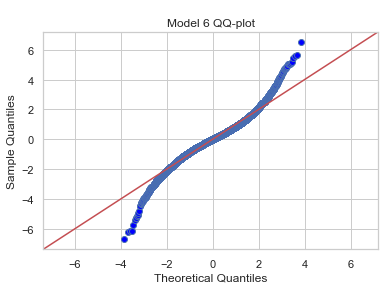

In [141]:
qqplot(model_nbr=6, model=model_6)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

In [ ]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=6, model=model_6)

### K-folds

### Model 6 Evaluation

## Model 7  + Normalize

### Strategy

**Model 7 Approach**
- Start with Model 5 baseline
- Add price per square foot decile engineered from zipcode medians
    
    

In [142]:
# Model 4 Setup and call statsmodel function
features_m7 = ['sqft_living_log','grade','view','sqft_per_bedroom_log','renovation_ind','waterfront','basement_ind','condition','miles_fr_seattle_sqrt']
X_train_m7 = X_train[features_m7].apply(normalize)
y_train_m7 = y_train['price_log']
X_train_m7.head()

sqft_living_log       grade        view  sqft_per_bedroom_log  \
16958       0.78220010  0.29321436  1.01228068            1.27149571   
6243       -0.65968172 -0.56313020 -0.30204843           -1.51017069   
8985       -0.69274609 -0.56313020 -0.30204843           -0.66198477   
9418       -0.81225492 -0.56313020 -0.30204843           -0.81864675   
14843      -0.11905870  0.29321436 -0.30204843            0.09005173   

       renovation_ind  waterfront  basement_ind   condition  \
16958     -0.18853445 -0.08257470    1.26723352 -0.63032880   
6243      -0.18853445 -0.08257470   -0.78907486  0.90678725   
8985      -0.18853445 -0.08257470   -0.78907486 -0.63032880   
9418      -0.18853445 -0.08257470   -0.78907486 -0.63032880   
14843     -0.18853445 -0.08257470    1.26723352 -0.63032880   

       miles_fr_seattle_sqrt  
16958             1.02920030  
6243             -1.42469335  
8985              0.37005987  
9418              0.23199037  
14843             0.63560067

### Run OLS

In [143]:
model_7 = calc_sm_ols(model_nbr=7, X=X_train_m7, y=y_train_m7)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     3993.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:35:35   Log-Likelihood:                -3655.2
No. Observations:               17275   AIC:                             7330.
Df Residuals:                   17265   BIC:                             7408.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    13.05

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

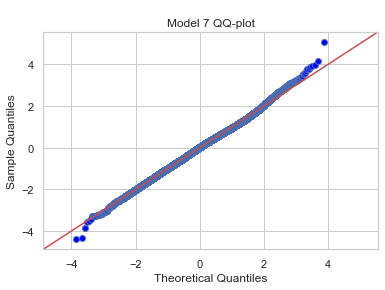

In [144]:
qqplot(model_nbr=7, model=model_7)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

In [ ]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=7, model=model_7)

### K-folds

### Model 7 Evaluation

## Model 8 + PSF Decile

### Strategy

**Model 8 Approach**
- Start with Model 5 baseline
- Add Price Per Sqft Decile:
    - Round 1: Initial feature had r2 0.96 and MAE at \\$41K, but residuals had pattern with deciles 1/10 skewed and deciles 2-8 declining from positive to negative.
    - Round 2:
    

In [145]:
# Model 8 Setup and call statsmodel function
features_m8 = ['sqft_living_log','grade','view','sqft_per_bedroom_log','renovation_ind','waterfront','basement_ind','condition','miles_fr_seattle_sqrt','price_sf_box_decile']
X_train_m8 = X_train[features_m8]
y_train_m8 = y_train['price_log']
X_train_m8.head()

sqft_living_log      grade       view  sqft_per_bedroom_log  \
16958       7.88231492 8.00000000 1.00000000            6.78370263   
6243        7.27239839 7.00000000 0.00000000            5.88610403   
8985        7.25841215 7.00000000 0.00000000            6.15979986   
9418        7.20785987 7.00000000 0.00000000            6.10924758   
14843       7.50108212 8.00000000 0.00000000            6.40246984   

       renovation_ind  waterfront  basement_ind  condition  \
16958      0.00000000  0.00000000             1 3.00000000   
6243       0.00000000  0.00000000             0 4.00000000   
8985       0.00000000  0.00000000             0 3.00000000   
9418       0.00000000  0.00000000             0 3.00000000   
14843      0.00000000  0.00000000             1 3.00000000   

       miles_fr_seattle_sqrt  price_sf_box_decile  
16958             4.26496744                    3  
6243              1.83478680                    5  
8985              3.61219657                    1  
9418              3.47546129                    4  
14843             3.87517133                    3

### Run OLS

In [146]:
model_8 = calc_sm_ols(model_nbr=8, X=X_train_m8, y=y_train_m8)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     6134.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:36:07   Log-Likelihood:                -283.62
No. Observations:               17275   AIC:                             589.2
Df Residuals:                   17264   BIC:                             674.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.71

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

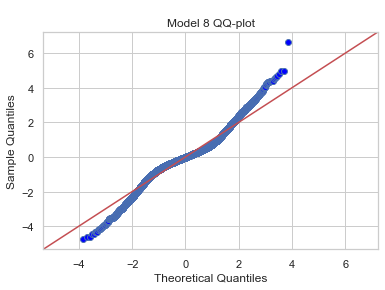

In [147]:
qqplot(model_nbr=8, model=model_8)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

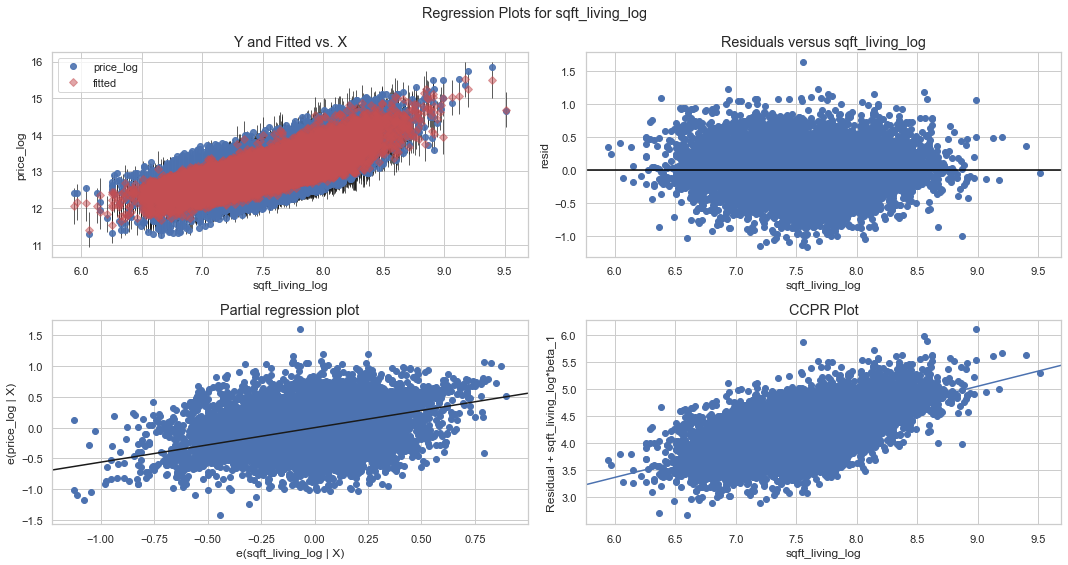

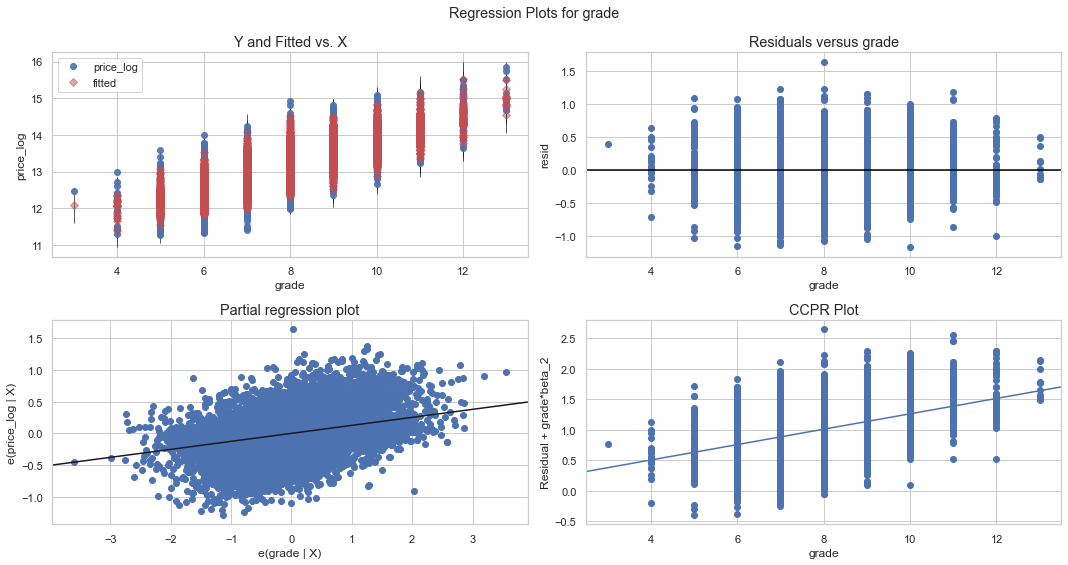

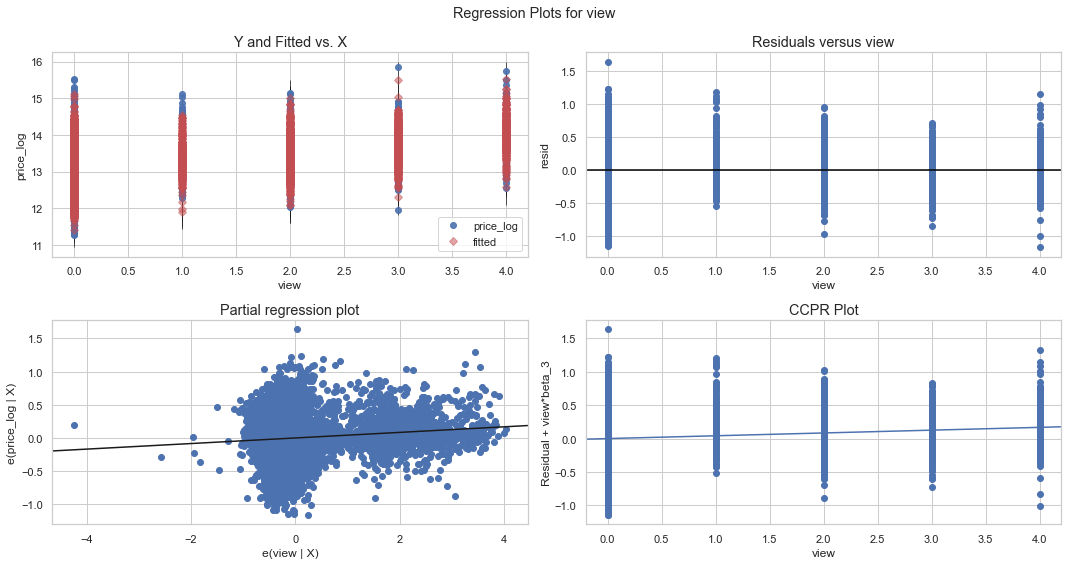

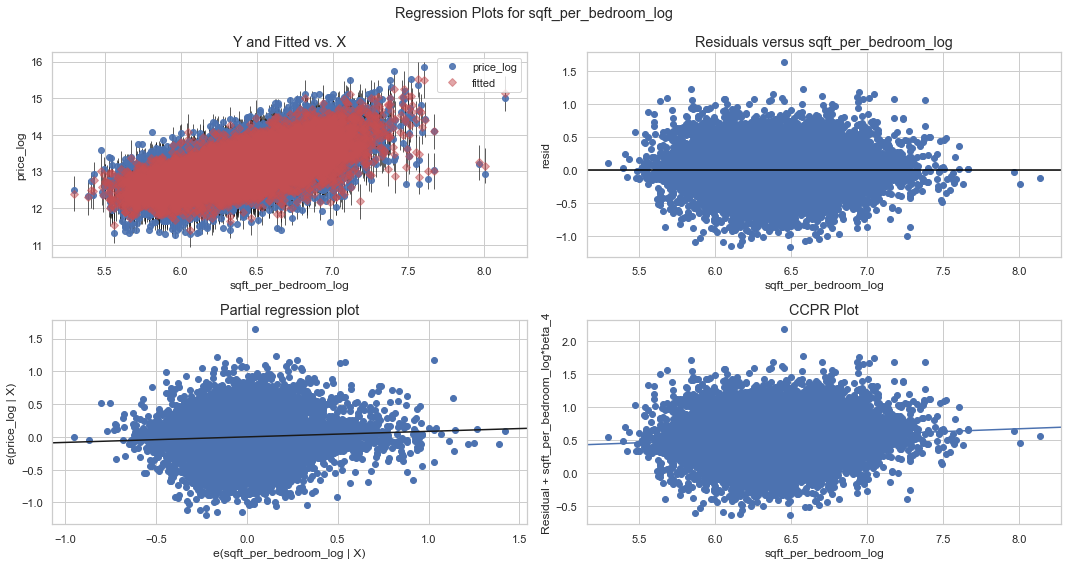

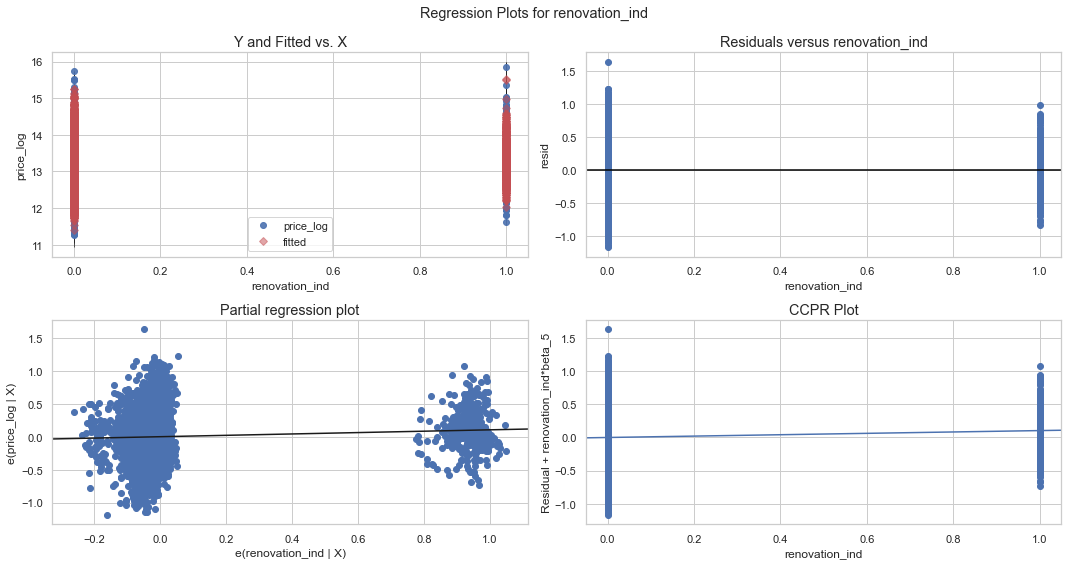

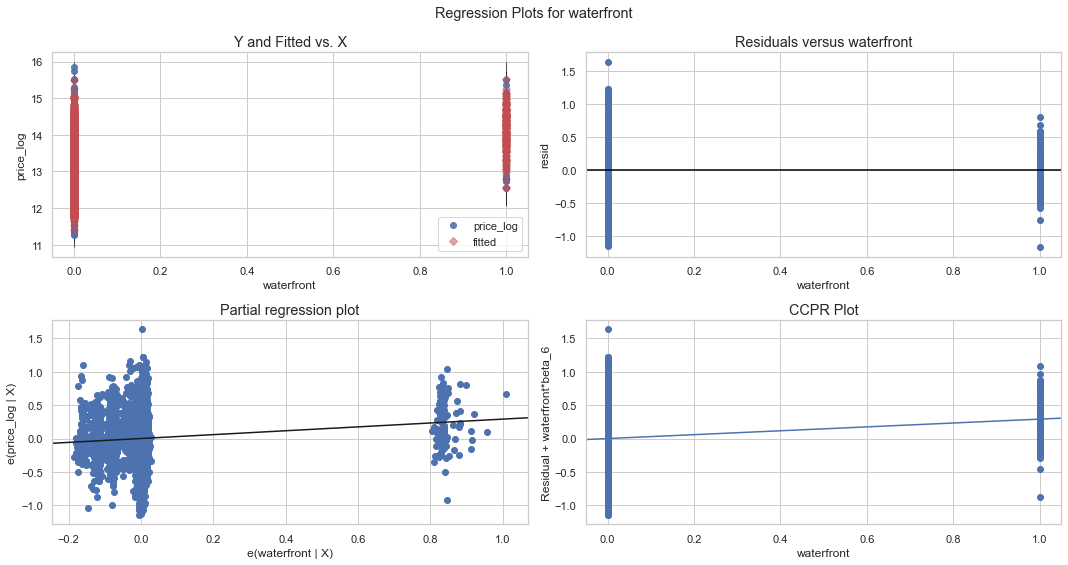

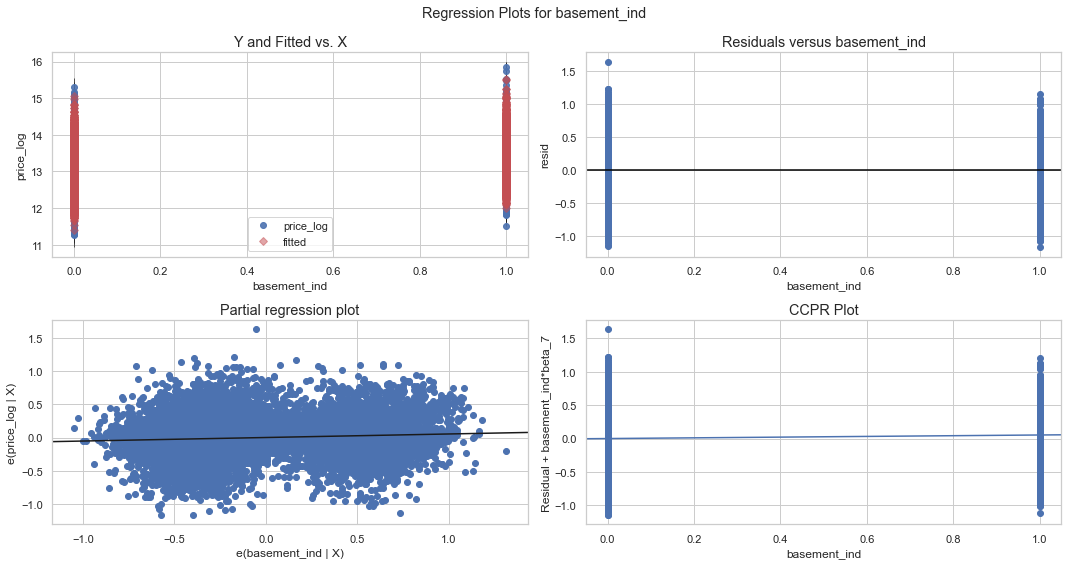

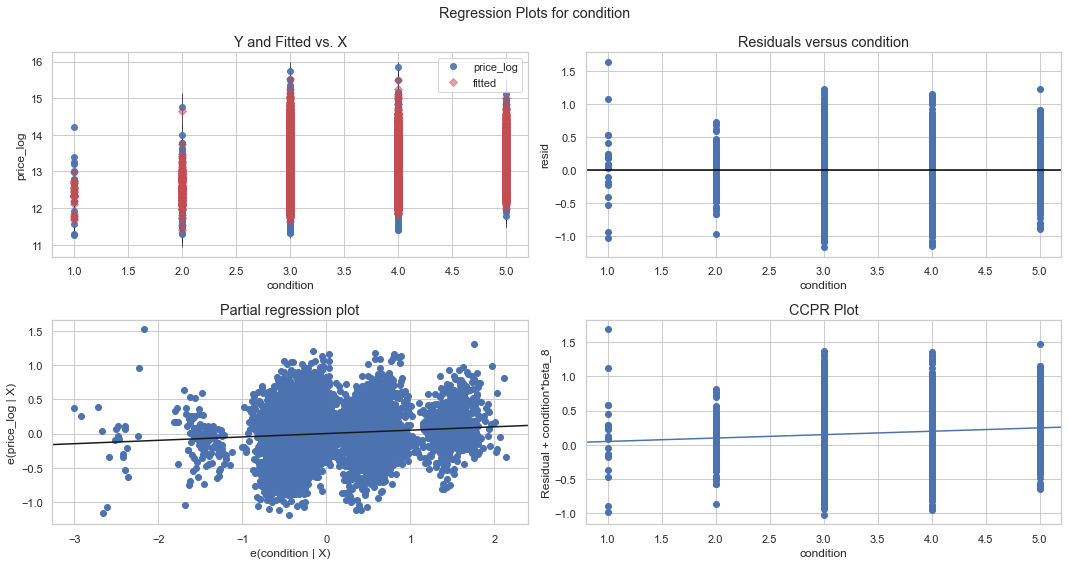

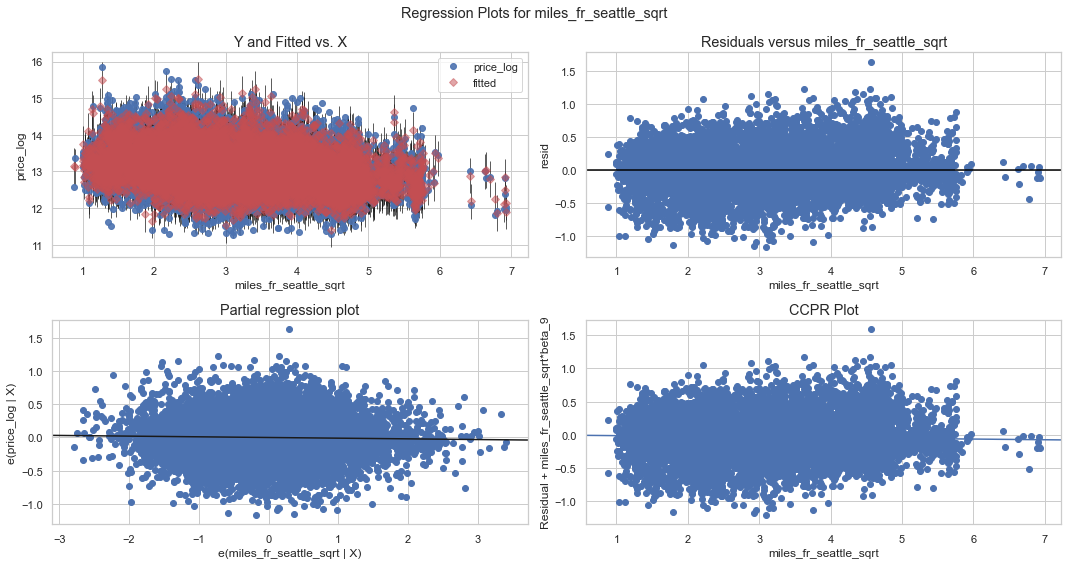

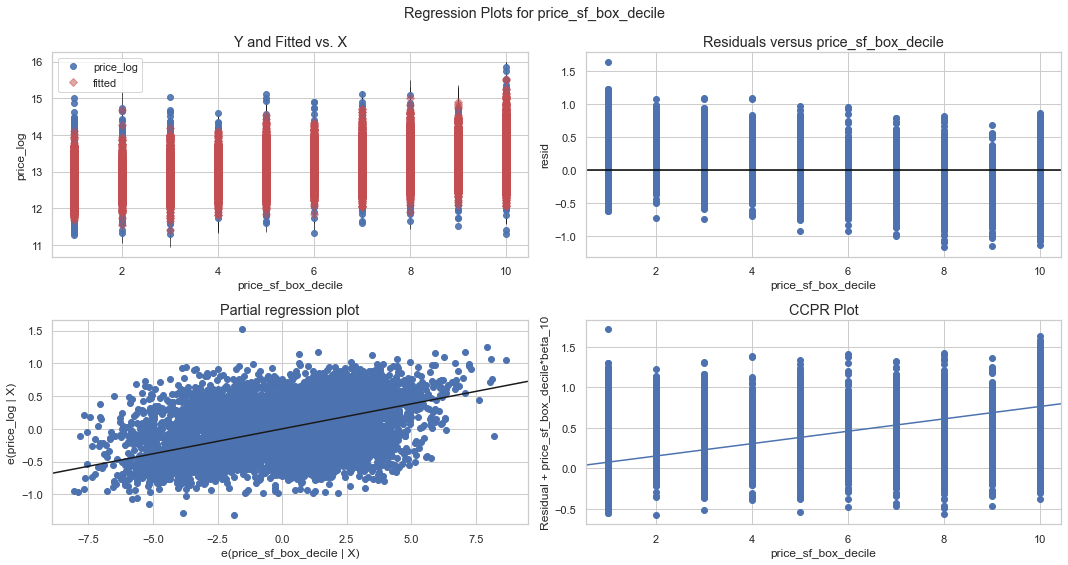

In [148]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=8, model=model_8)

### K-folds

### Model 8 Evaluation

# Business Analysis

# Deployment

# Appendix